In [10]:
# Libraries
import numpy as np
from sklearn import cluster, datasets, mixture

# Plot
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# kmeans
from sklearn.cluster import KMeans
# kmedioids
from sklearn_extra.cluster import KMedoids
# DBSCAN
from sklearn.cluster import DBSCAN
# Spectral
from sklearn.cluster import SpectralClustering

# metrics
from sklearn.metrics import silhouette_samples, silhouette_score

## Creating scattered data

In [11]:
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
def plot_data(data: tuple, title: str) -> None:
    X = data[0]
    y = data[1]
    plt.scatter(X[:,0] , X[:,1], marker='o', c=y, s=25, edgecolor='k')
    plt.title(title)
plt.show()

### a. Plot the different datasets in separate figures. What can you say about them?

#### Noisy circles

In [12]:

noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
print(f"Noisy circles: {noisy_circles[0].shape}")

Noisy circles: (500, 2)


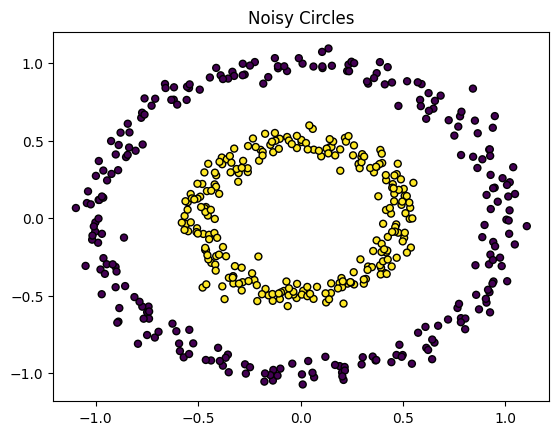

In [13]:
plot_data(noisy_circles, "Noisy Circles")

Noisy circles is a dataset with data distributed in two concentric circles. These maibe can be two clusters

#### Noisy moons

In [14]:
### Noisy moons
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
print(f"Noisy moons: {noisy_moons[0].shape}")

Noisy moons: (500, 2)


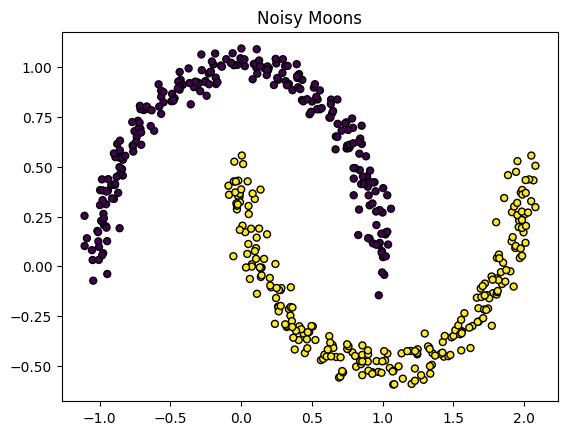

In [15]:
plot_data(noisy_moons, "Noisy Moons")

Noisy moons are data distributed as two semicircles. Maybe these can be two clusters 

#### Blobs

In [16]:
### Blobs
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
print(f"Blobs: {blobs[0].shape}")

Blobs: (500, 2)


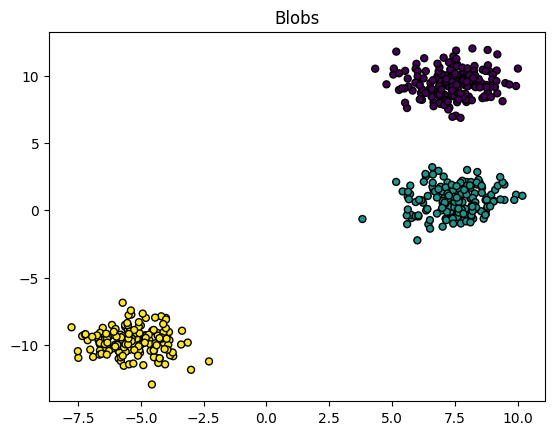

In [17]:
plot_data(blobs, "Blobs")

In blobs there are three groups of data with good compactation and separability between them. Maybe there are 3 clusters

#### No Structure

In [18]:
### NO Structure
no_structure = np.random.rand(n_samples, 2), None
print(f"NO Structure: {no_structure[0].shape}")

NO Structure: (500, 2)


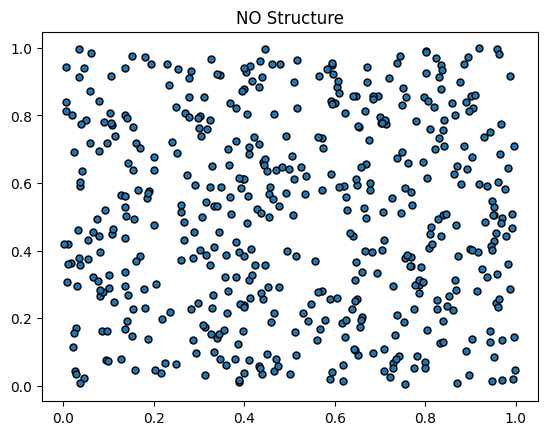

In [19]:
plot_data(no_structure, "NO Structure")

In no structure dataset we have data scattered throughout space. There are no a clare number of clusters

#### Anisotropically distributed data

In [20]:
# Anisotropically distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
print(f"Ansio: {aniso[0].shape}")

Ansio: (500, 2)


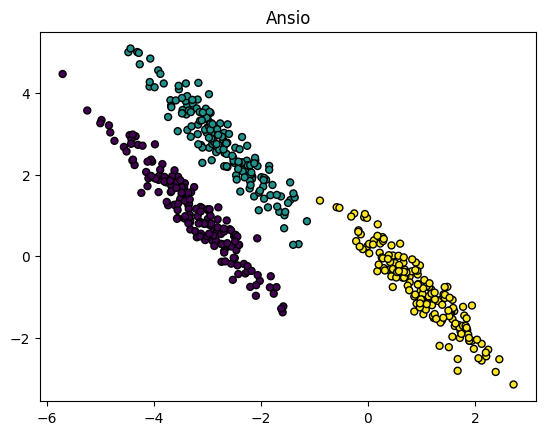

In [21]:
plot_data(aniso, "Ansio")

In ansio dataset we can see 3 possible clusters in three groups of data with a notable compactation and separability

#### Blobs with varied variances

In [22]:
# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)
print(f"blobs vv: {varied[0].shape}")

blobs vv: (500, 2)


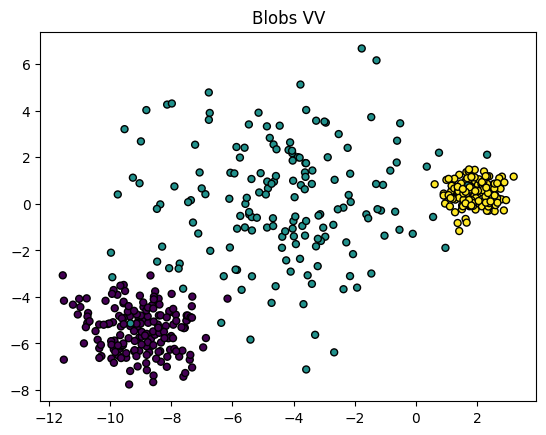

In [23]:
plot_data(varied, "Blobs VV")

In blobs vv data we can see 3 possible clusters, but, there are some overlapping and high dispersion in one of them

Conclusion: From the datasets above i can see:
- Noisy Circles: Has two nonlinearly separable clusters in forming two convex figures, but each cluster has good separation and compactation.
- Noisy Moons: Similar to the previous dataset, this has two nonlinearly separable clusters forming two semicircles, but but each cluster has good separation and compactation.
- Blobs: here we have three classic clusters with good separation and compactation, here maybe we could have linearly separation.
- No Strcture: here we have sata scattered all over the space, we cannot see any cluster as in the previous datasets
- Ansio: Here we have three compressed clusters, maybe these can be liearly separables
- Blobs VV: Here we have three notable clusters but one of them have a very sparse data, even this one has some overlapping data with the other clusters

### b. Apply k-means, k-medoids, DBSCAN and Spectral Clustering from Scikit-Learn over each dataset and compare the results of each algorithm with respect to each dataset.

Here I gonna to apply each algorithm to 2, 3 and 4 cluster number. For that i gonna to implemet a iterative process to train the models and a function to plot the silhouette metric

In [24]:
# Range of the cluster number to implement the iterations
range_n_clusters = [2,3,4]

In [50]:
def plot_clusters(k_models:dict, range_n_clusters: list)->None:
    """
    Function to plot the silhouette metric

    PARAMS:
        k_models: dict
            Dictionary with models trained, eah key has the models for k clusters
        range_n_clusters: list of numbers of clusters
    """
    for n_clusters in range_n_clusters:
        for model in k_models[n_clusters]:
            # Create a subplot with 1 row and 2 columns
            fig, (ax1, ax2) = plt.subplots(1, 2)
            fig.set_size_inches(18, 7)

            # The 1st subplot is the silhouette plot
            # The silhouette coefficient can range from -1, 1 but in this example all
            # lie within [-0.1, 1]
            ax1.set_xlim([-0.1, 1])
            # The (n_clusters+1)*10 is for inserting blank space between silhouette
            # plots of individual clusters, to demarcate them clearly.
            ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])


            # Initialize the clusterer with n_clusters value and a random generator
            # seed of 10 for reproducibility.
            clusterer = model[0]
            cluster_labels = model[1]

            # The silhouette_score gives the average value for all the samples.
            # This gives a perspective into the density and separation of the formed
            # clusters
            try:
                silhouette_avg = silhouette_score(X, cluster_labels)
            except Exception as e:
                print("Error in silhouette for model ", model[2])
                continue
            print(model[2])
            print(
                "For n_clusters =",
                n_clusters,
                "The average silhouette_score is :",
                silhouette_avg,
            )

            # Compute the silhouette scores for each sample
            sample_silhouette_values = silhouette_samples(X, cluster_labels)
            

            y_lower = 10
            for i in range(n_clusters):
                # Aggregate the silhouette scores for samples belonging to
                # cluster i, and sort them
                ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

                ith_cluster_silhouette_values.sort()

                size_cluster_i = ith_cluster_silhouette_values.shape[0]
                y_upper = y_lower + size_cluster_i

                color = cm.nipy_spectral(float(i) / n_clusters)
                ax1.fill_betweenx(
                    np.arange(y_lower, y_upper),
                    0,
                    ith_cluster_silhouette_values,
                    facecolor=color,
                    edgecolor=color,
                    alpha=0.7,
                )

                # Label the silhouette plots with their cluster numbers at the middle
                ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

                # Compute the new y_lower for next plot
                y_lower = y_upper + 10  # 10 for the 0 samples

            ax1.set_title("The silhouette plot for the various clusters.")
            ax1.set_xlabel("The silhouette coefficient values")
            ax1.set_ylabel("Cluster label")

            # The vertical line for average silhouette score of all the values
            ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

            ax1.set_yticks([])  # Clear the yaxis labels / ticks
            ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

            # 2nd Plot showing the actual clusters formed
            colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
            ax2.scatter(
                X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
            )

            ax2.set_title("The visualization of the clustered data.")
            ax2.set_xlabel("Feature space for the 1st feature")
            ax2.set_ylabel("Feature space for the 2nd feature")

            plt.suptitle(
                "Silhouette analysis for {} clustering on sample data with n_clusters = {}".format(model[2], n_clusters),
                fontsize=14,
                fontweight="bold",
            )

        plt.show()

#### Noisy circles

Training 2 clusters ...
Training 3 clusters ...


c:\Users\user\Cursos\Machine Learning II\Laboratorio_2\pymlii_2\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\user\Cursos\Machine Learning II\Laboratorio_2\pymlii_2\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Training 4 clusters ...
Training complete!
KMEANS
For n_clusters = 2 The average silhouette_score is : 0.34814978123326956
KMEDOIDS
For n_clusters = 2 The average silhouette_score is : 0.35086220574647764


c:\Users\user\Cursos\Machine Learning II\Laboratorio_2\pymlii_2\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


DBSCAN
For n_clusters = 2 The average silhouette_score is : 0.11466640966761989
SPECTRAL
For n_clusters = 2 The average silhouette_score is : 0.11466640966761989


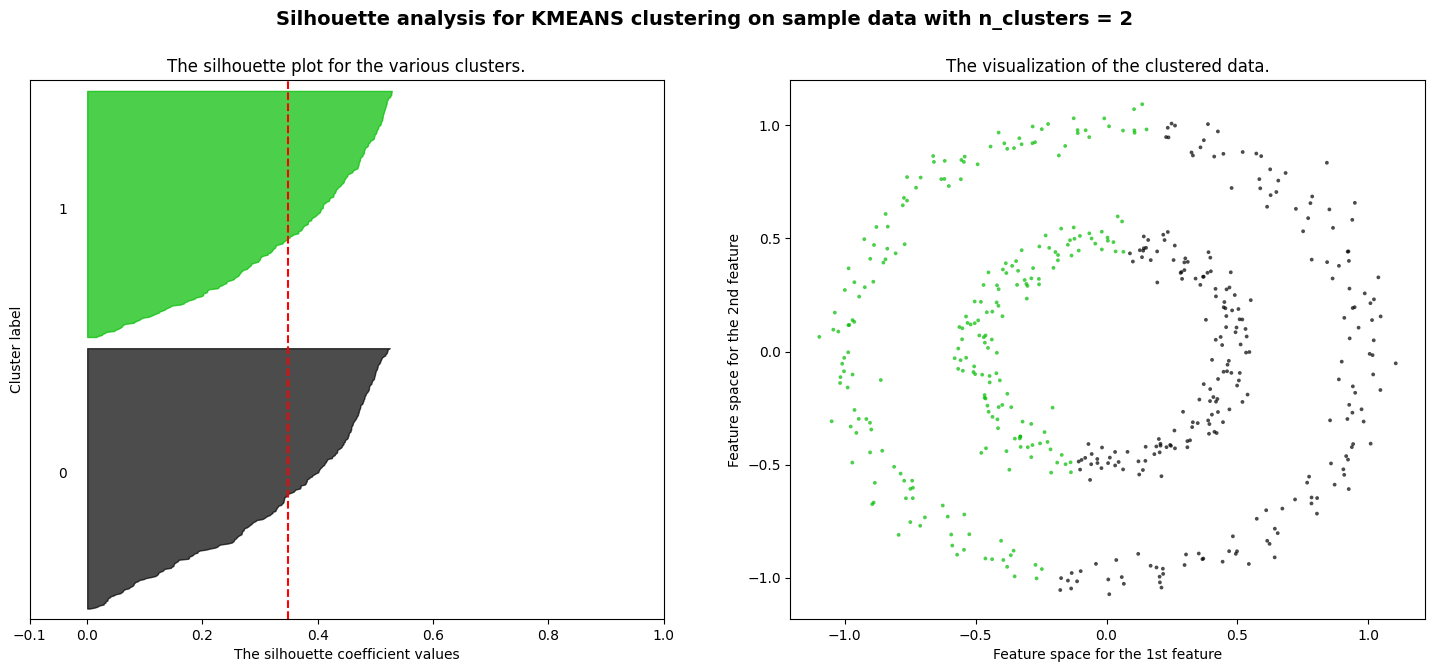

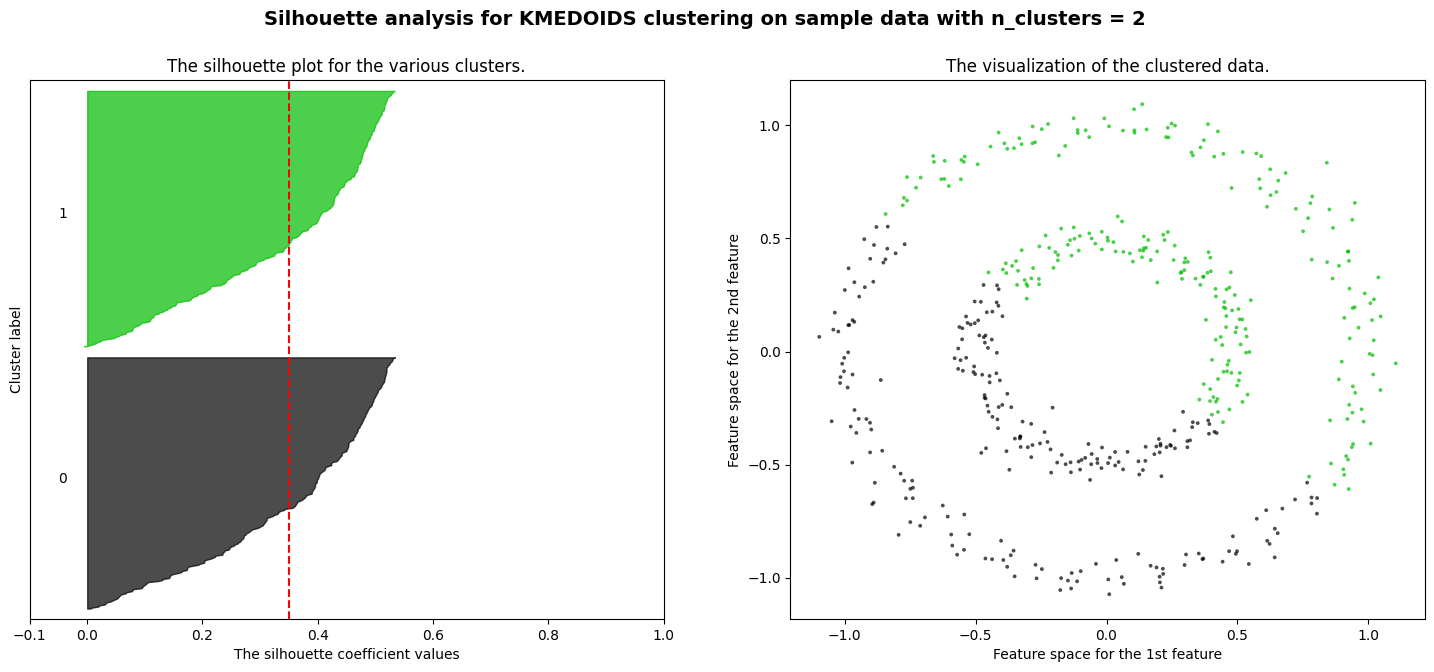

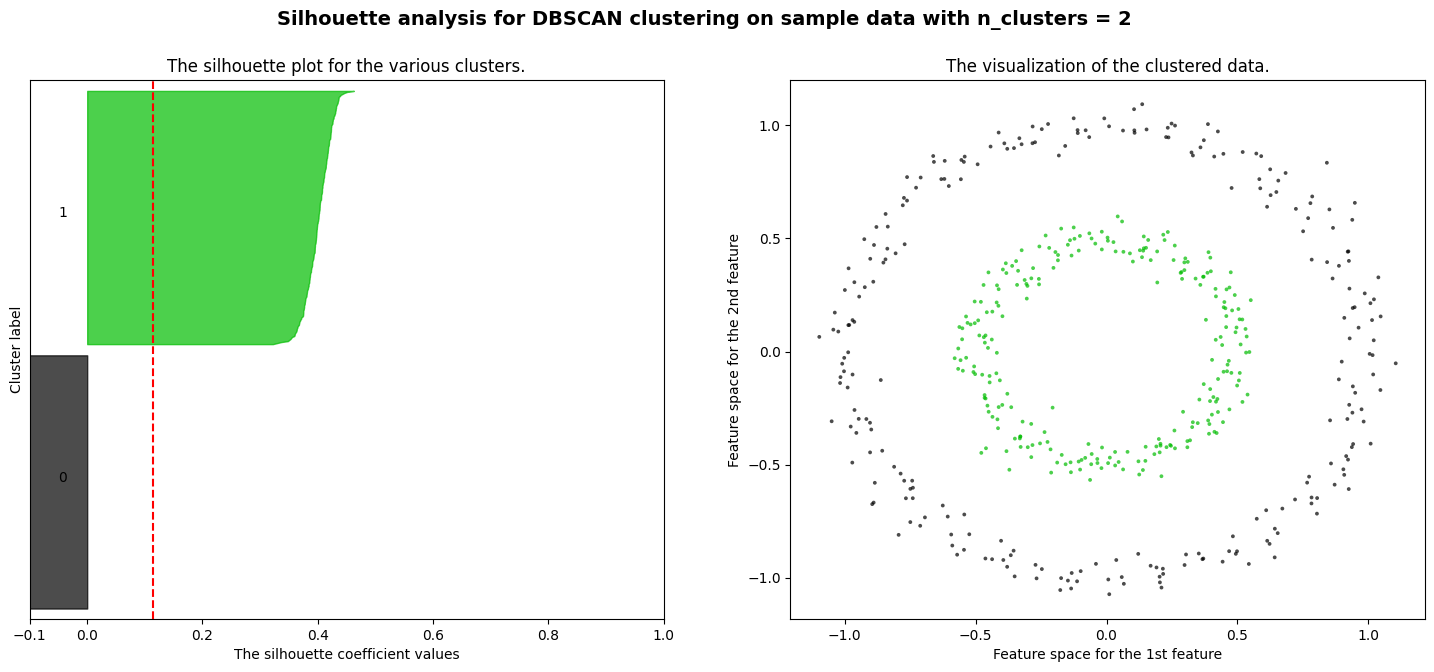

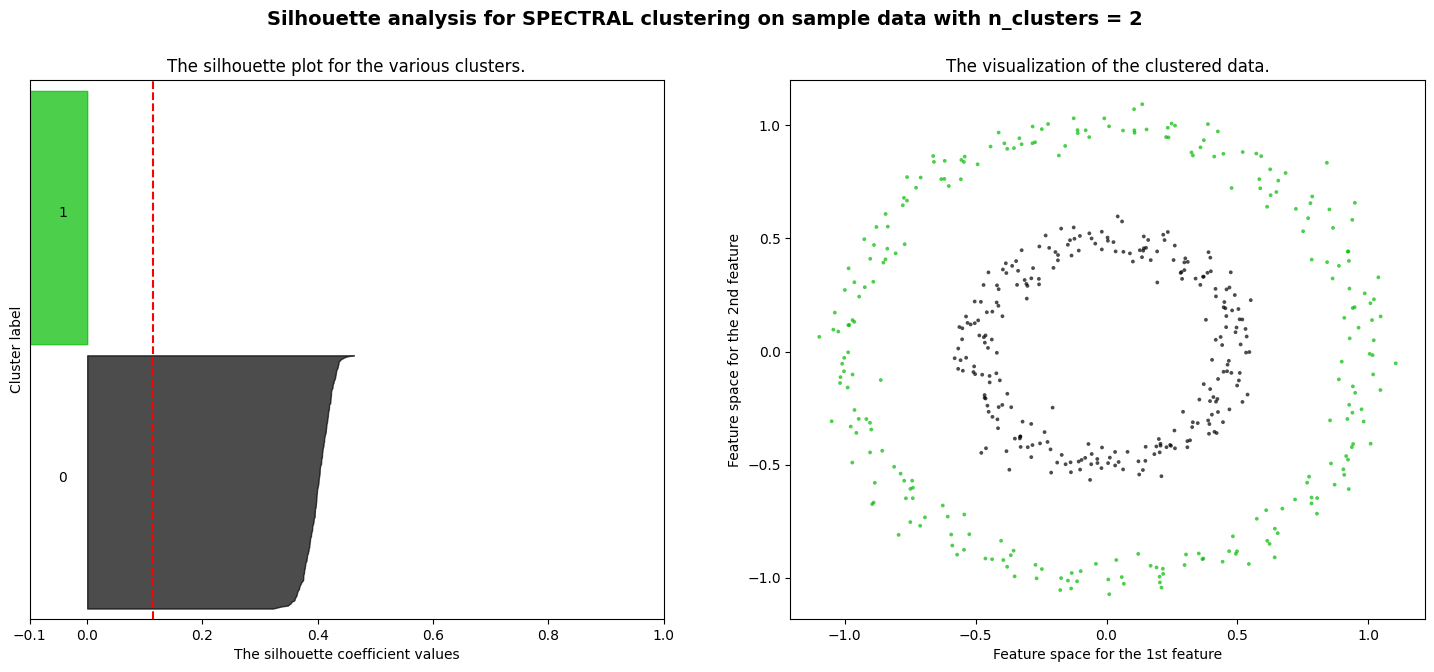

KMEANS
For n_clusters = 3 The average silhouette_score is : 0.38544472075475894
KMEDOIDS
For n_clusters = 3 The average silhouette_score is : 0.38568496545786013
DBSCAN
For n_clusters = 3 The average silhouette_score is : 0.11466640966761989
SPECTRAL
For n_clusters = 3 The average silhouette_score is : 0.1866259613305202


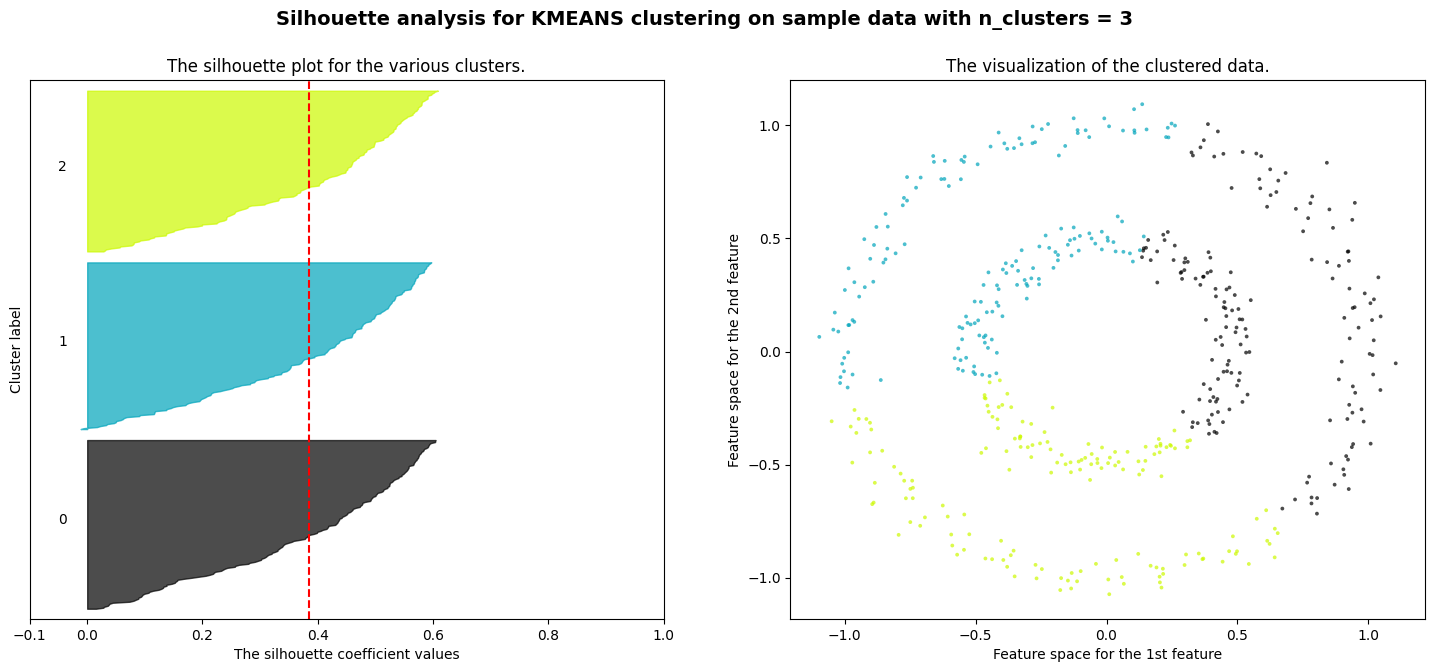

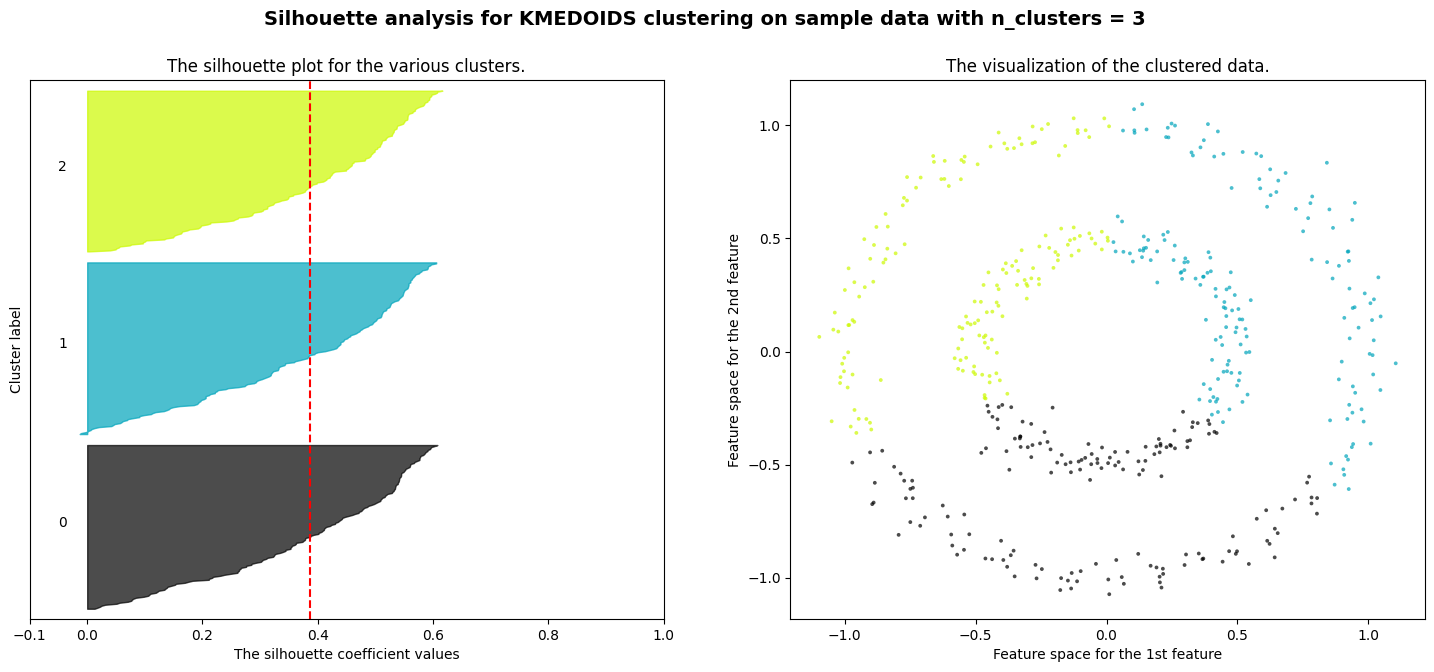

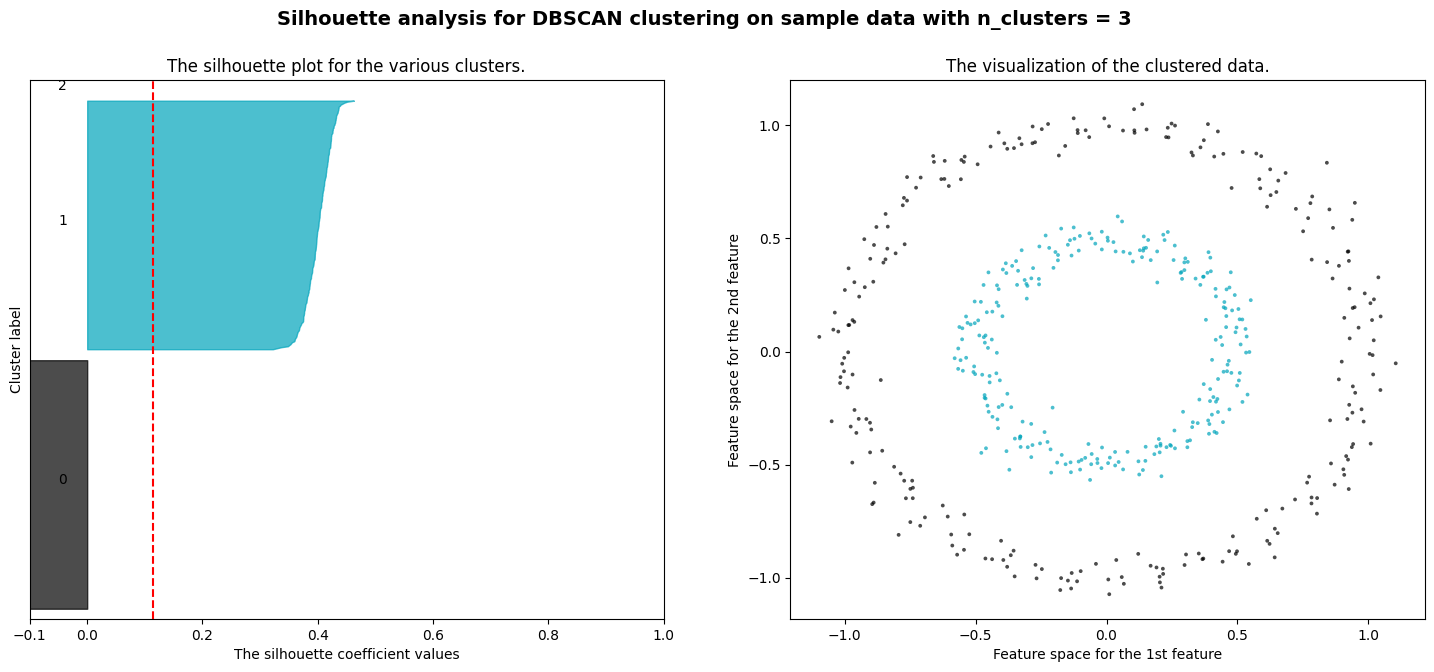

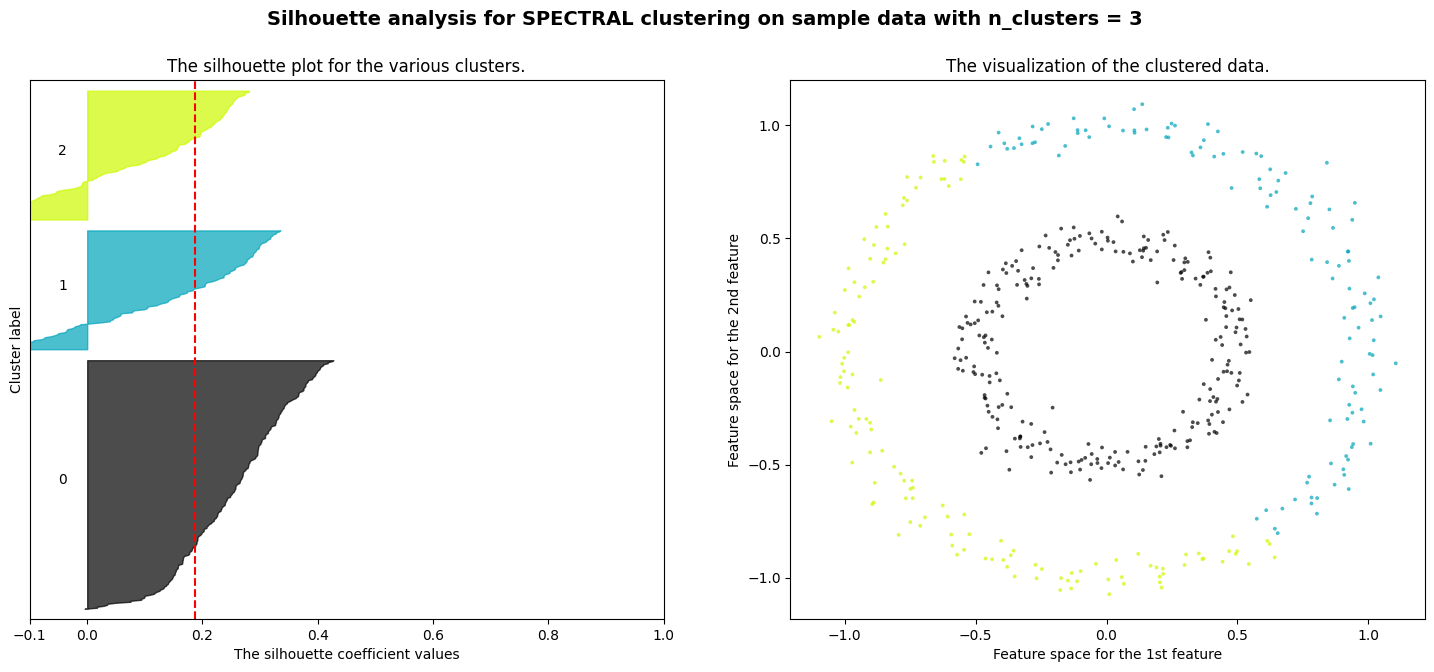

KMEANS
For n_clusters = 4 The average silhouette_score is : 0.3752141773422284
KMEDOIDS
For n_clusters = 4 The average silhouette_score is : 0.36854273299925694
DBSCAN
For n_clusters = 4 The average silhouette_score is : 0.11466640966761989
SPECTRAL
For n_clusters = 4 The average silhouette_score is : 0.23374814371582223


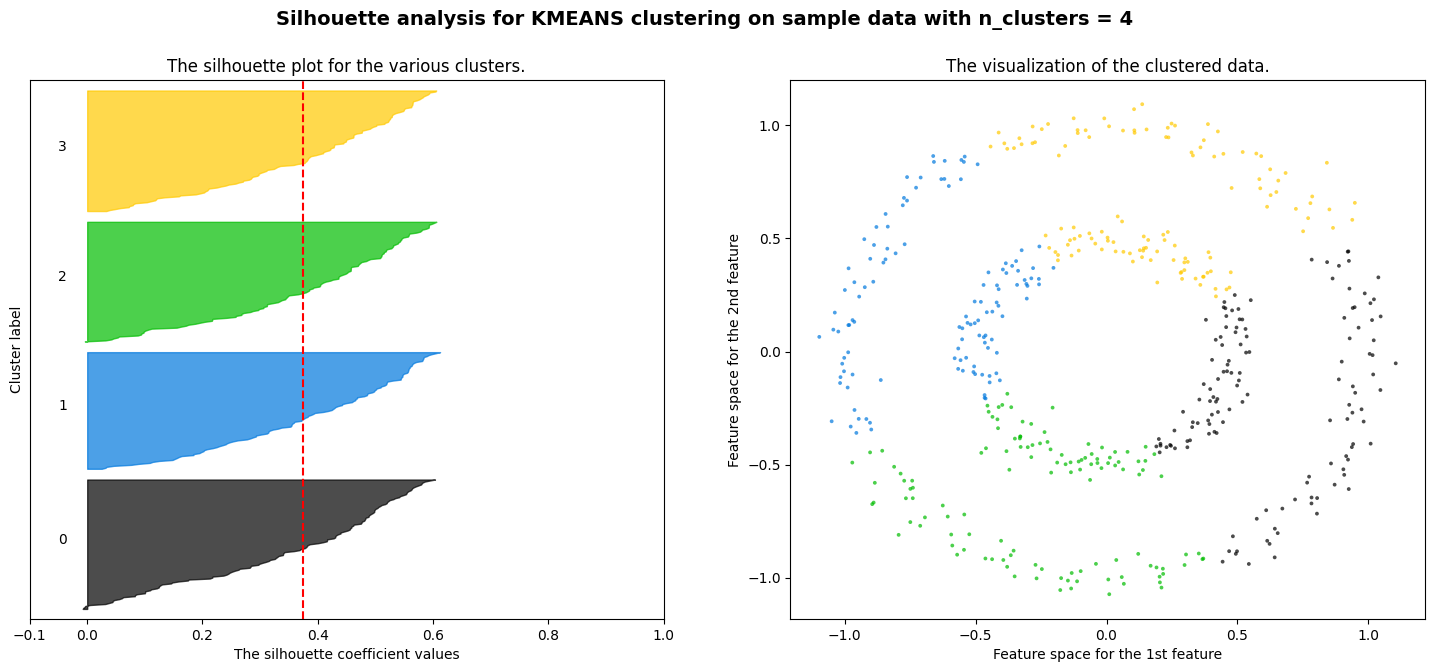

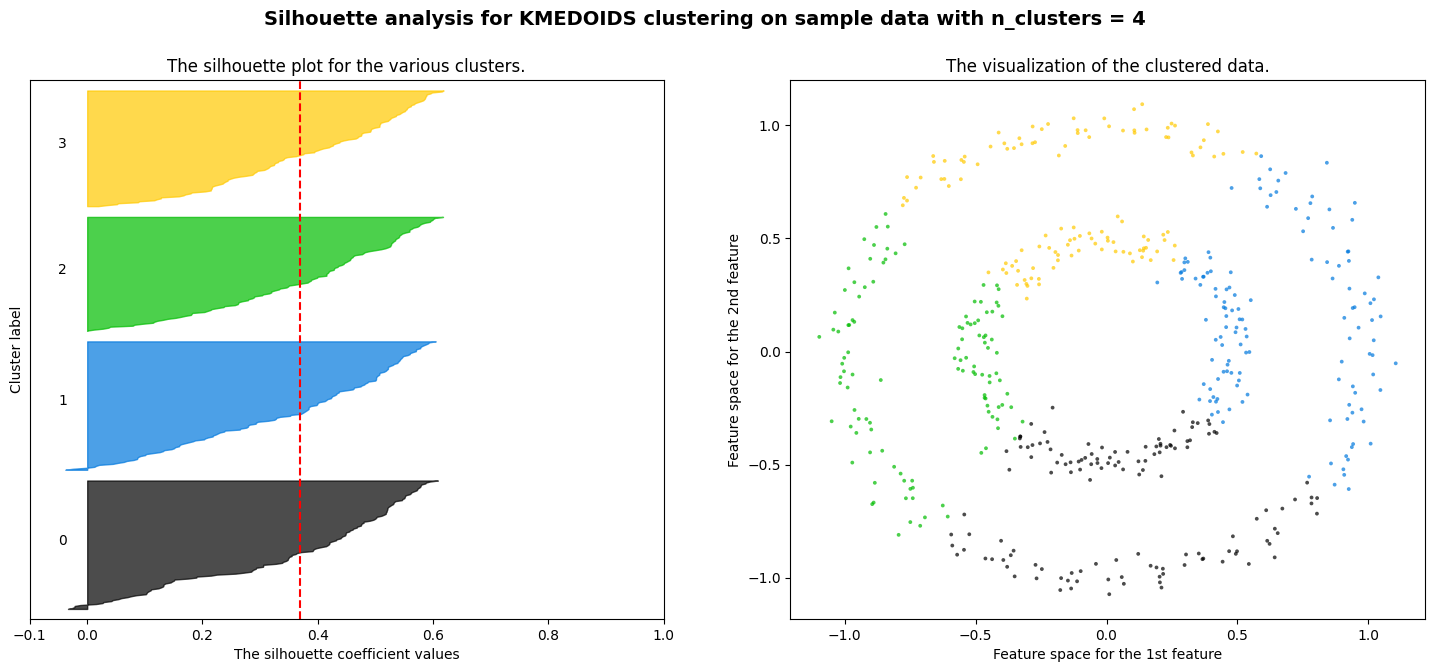

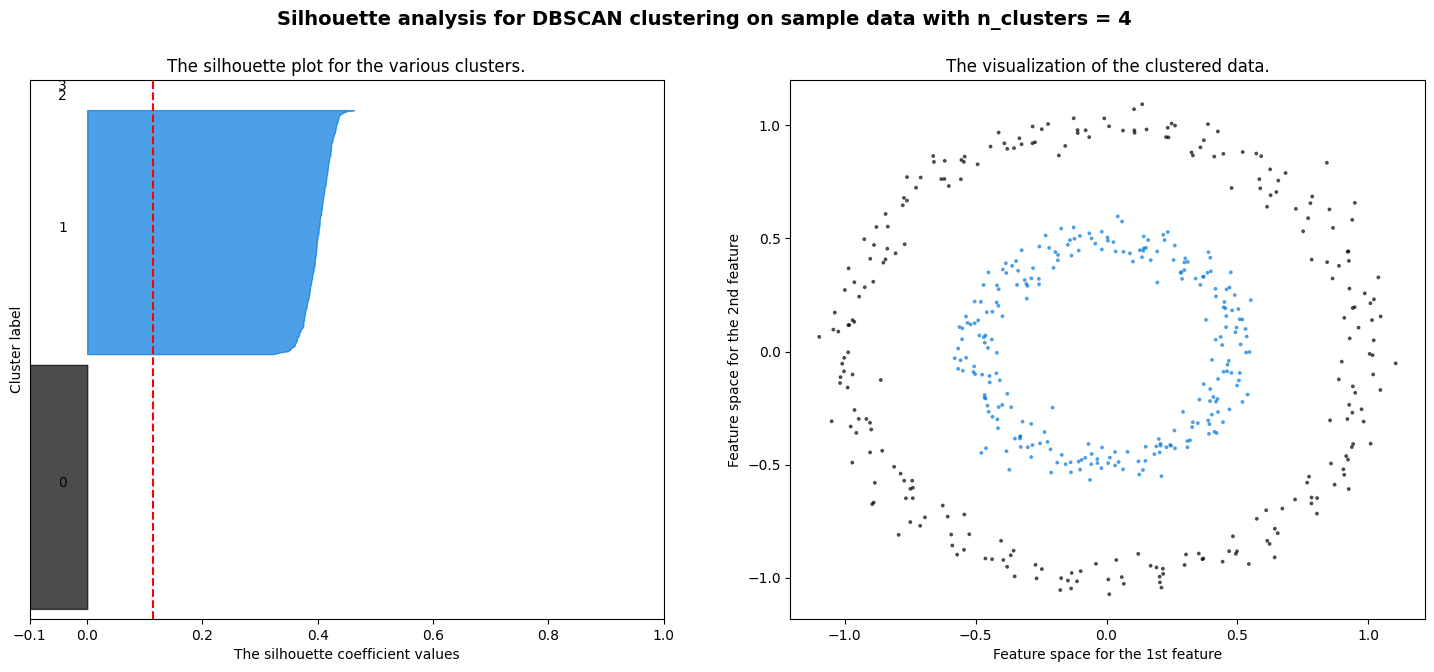

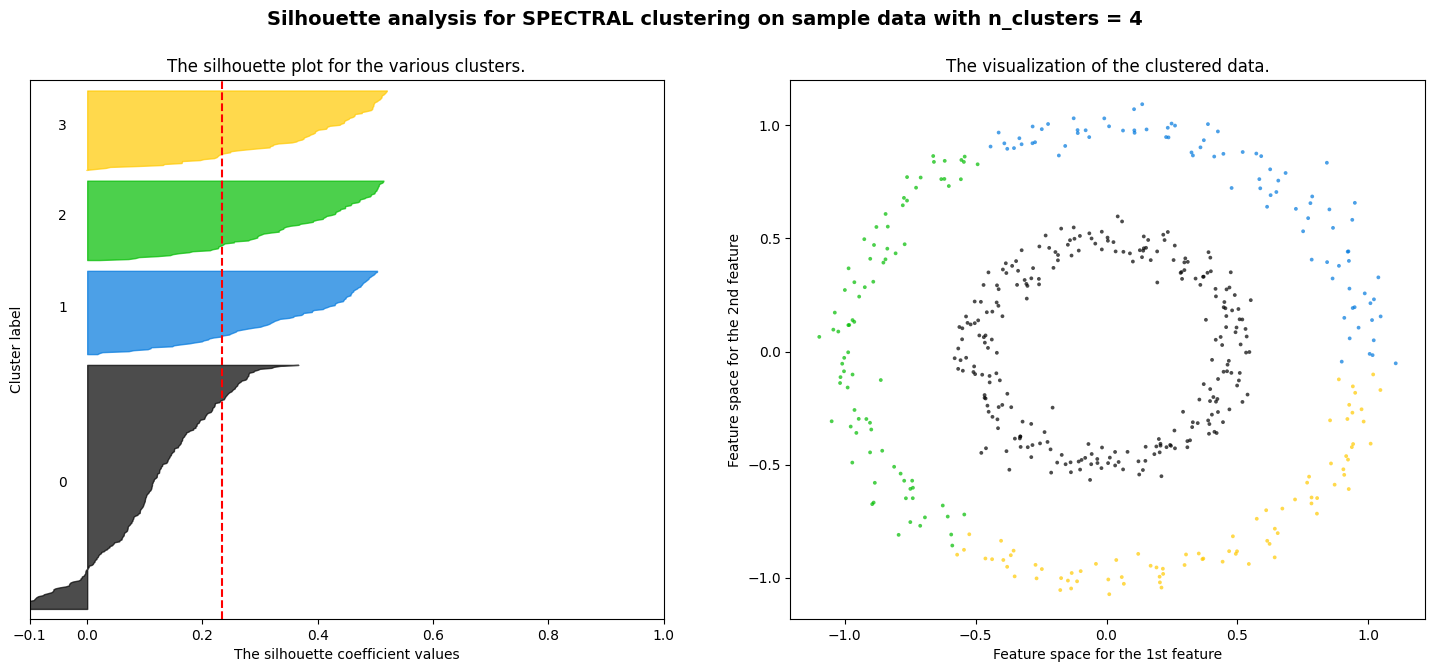

In [60]:
X = noisy_circles[0]
y = noisy_circles[1]
k_models = {}
for k in range_n_clusters:
    print(f"Training {k} clusters ...")
    models = []
    # kmeans
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
    kmeans_labels = kmeans.fit_predict(X)
    models.append((kmeans,kmeans_labels,'KMEANS'))
    # kmedoids
    kmedoids = KMedoids(n_clusters=k, random_state=0)
    kmedoids_labels = kmedoids.fit_predict(X)
    models.append((kmedoids,kmedoids_labels,'KMEDOIDS'))
    # dbscan
    dbscan = DBSCAN(eps=0.2, min_samples=8, algorithm='auto', metric='euclidean')
    dbscan_labels = dbscan.fit_predict(X)
    models.append((dbscan,dbscan_labels, 'DBSCAN'))
    # spectral
    spectral = SpectralClustering(n_clusters=k,affinity='nearest_neighbors',assign_labels='kmeans',random_state=0)
    spectral_labels = spectral.fit_predict(X)
    models.append((spectral,spectral_labels, 'SPECTRAL'))
    k_models[k] = models
print("Training complete!")
plot_clusters(k_models, range_n_clusters)

Noisy circles:
- I obtain the best silhouette coefficient in kmedoids algorithm for 3 cluter
- I expected that the clusters are separated between the inner and outer circle, but this does not happen for the KMEANS and KMEDOIDS algorithms, I only got it for DBSCAN and Spectral Clustering.
- DBSCAN and Spectral Clustering manage to separate the data as expected, but the value of the coefficient makes me doubt their use
- Here perhaps we can see the lack of ability of K MEANS and KMEDOIDS to do a non-linear separation

#### Noisy moons

Training 2 clusters ...
Training 3 clusters ...


c:\Users\user\Cursos\Machine Learning II\Laboratorio_2\pymlii_2\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\user\Cursos\Machine Learning II\Laboratorio_2\pymlii_2\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Training 4 clusters ...
Training complete!
KMEANS
For n_clusters = 2 The average silhouette_score is : 0.490213491464575
KMEDOIDS
For n_clusters = 2 The average silhouette_score is : 0.486077568834205


c:\Users\user\Cursos\Machine Learning II\Laboratorio_2\pymlii_2\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


DBSCAN
For n_clusters = 2 The average silhouette_score is : 0.33169588709155956
SPECTRAL
For n_clusters = 2 The average silhouette_score is : 0.33169588709155956


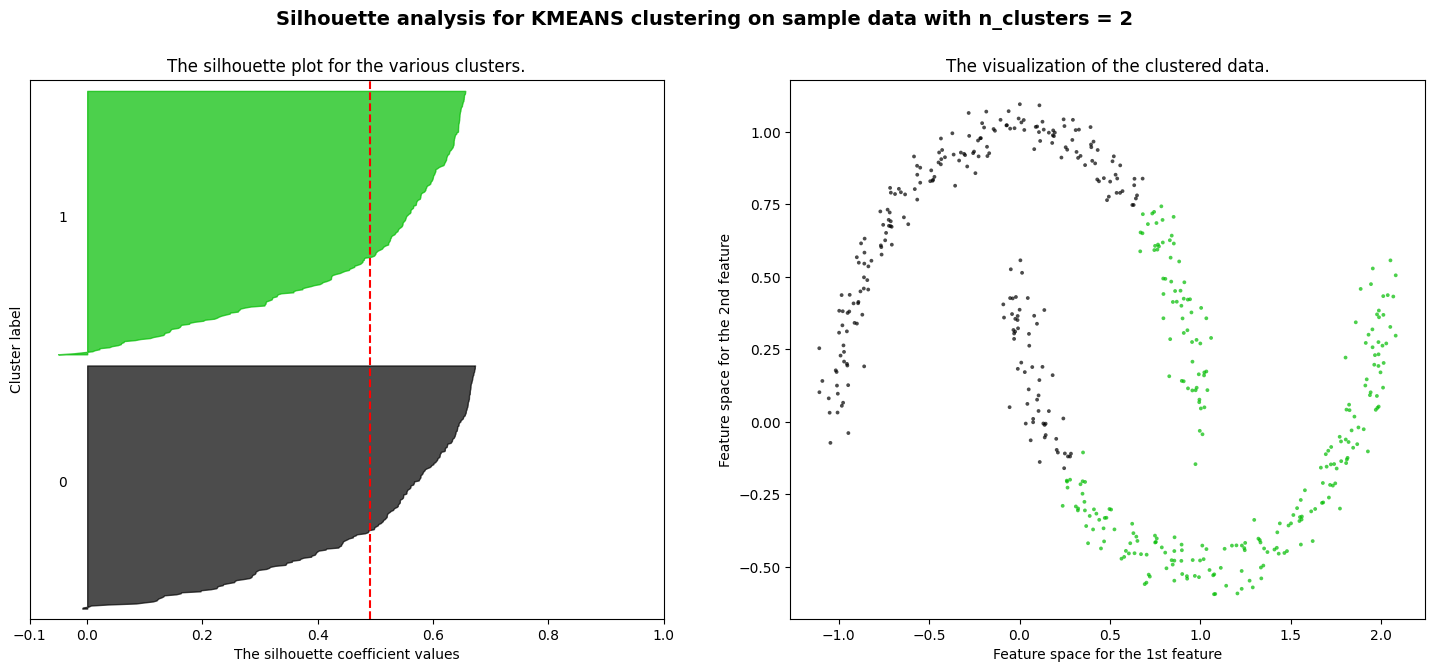

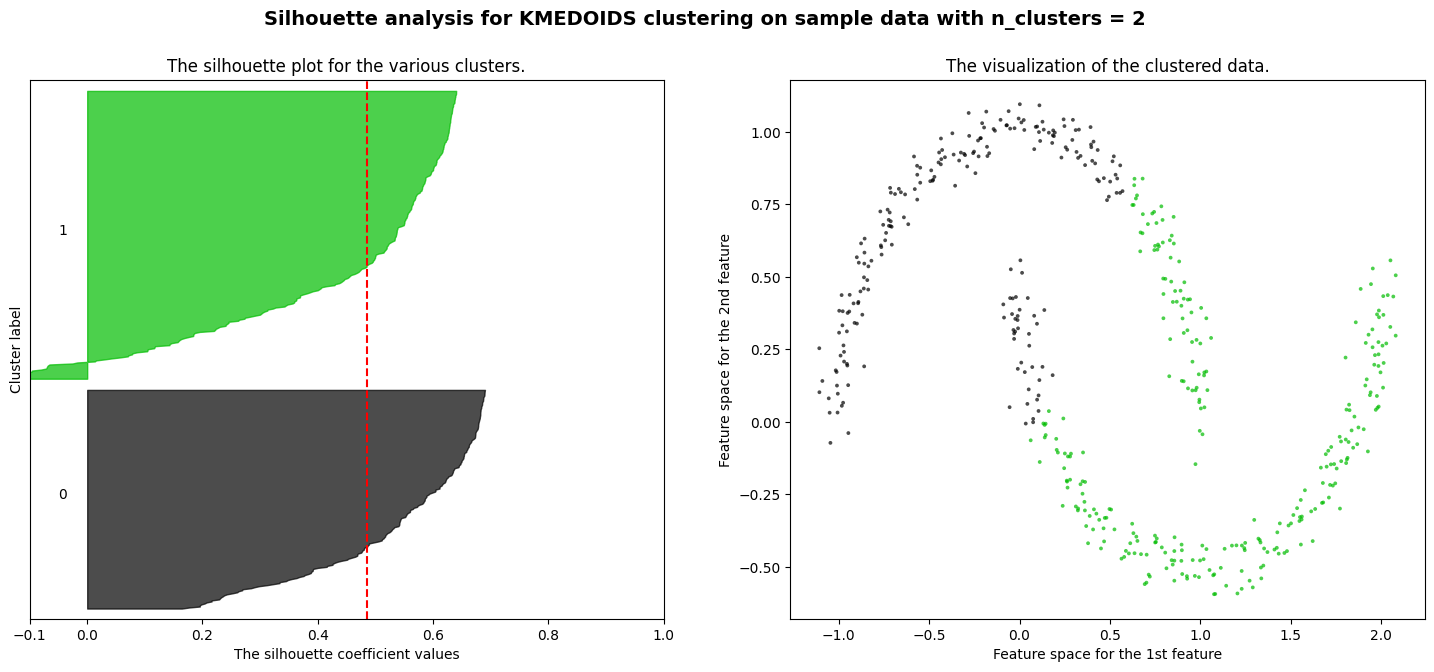

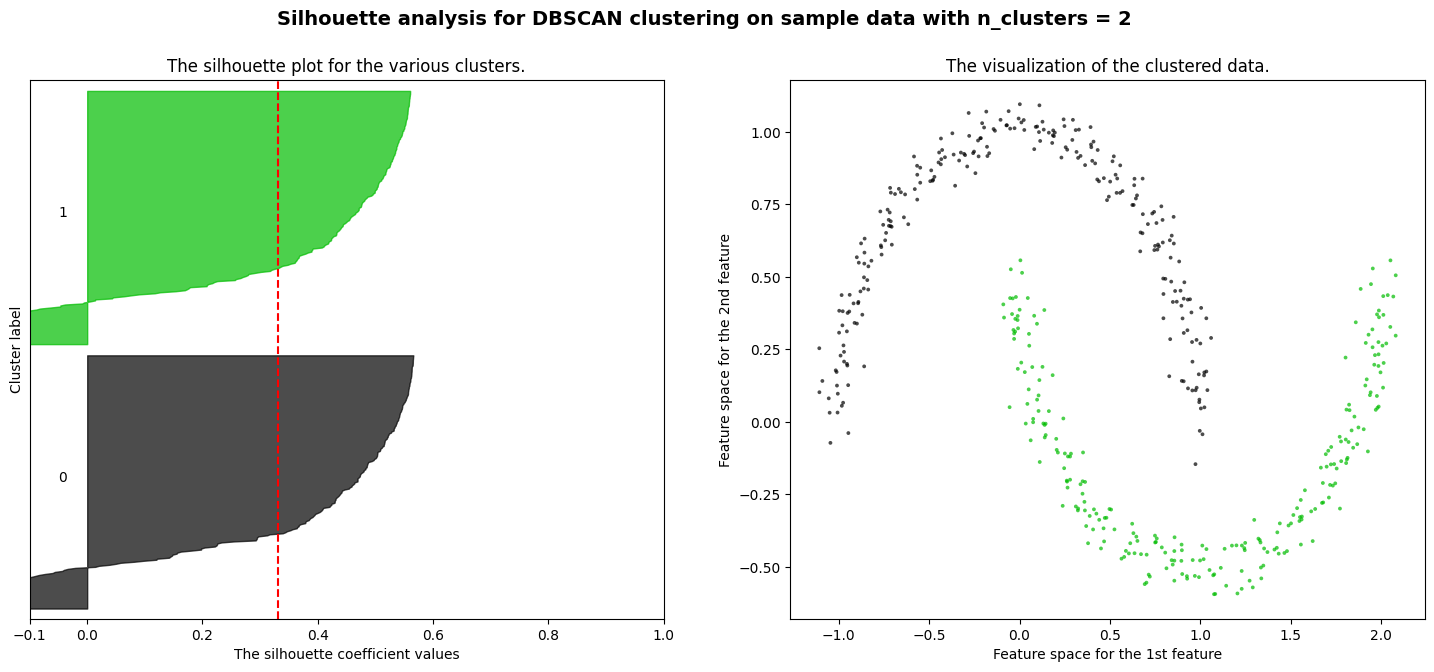

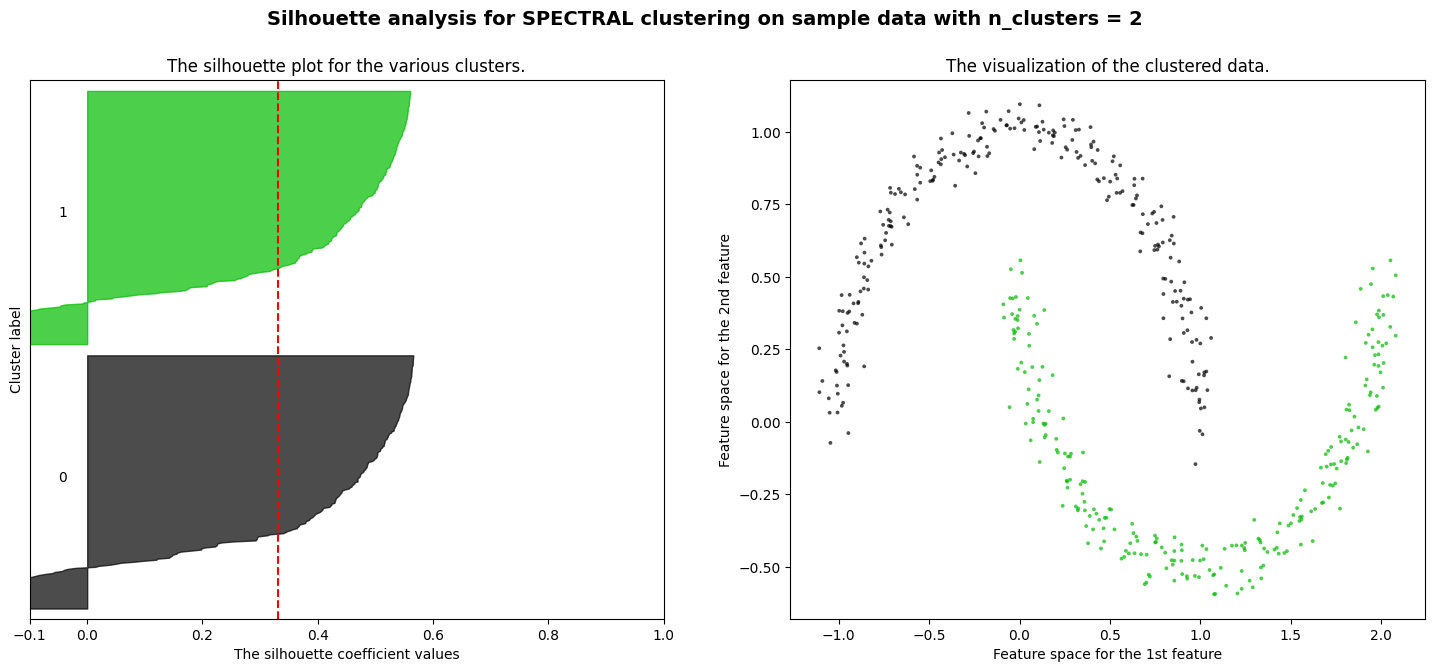

KMEANS
For n_clusters = 3 The average silhouette_score is : 0.42473354489682763
KMEDOIDS
For n_clusters = 3 The average silhouette_score is : 0.43442069524289134
DBSCAN
For n_clusters = 3 The average silhouette_score is : 0.33169588709155956
SPECTRAL
For n_clusters = 3 The average silhouette_score is : 0.28867039597420885


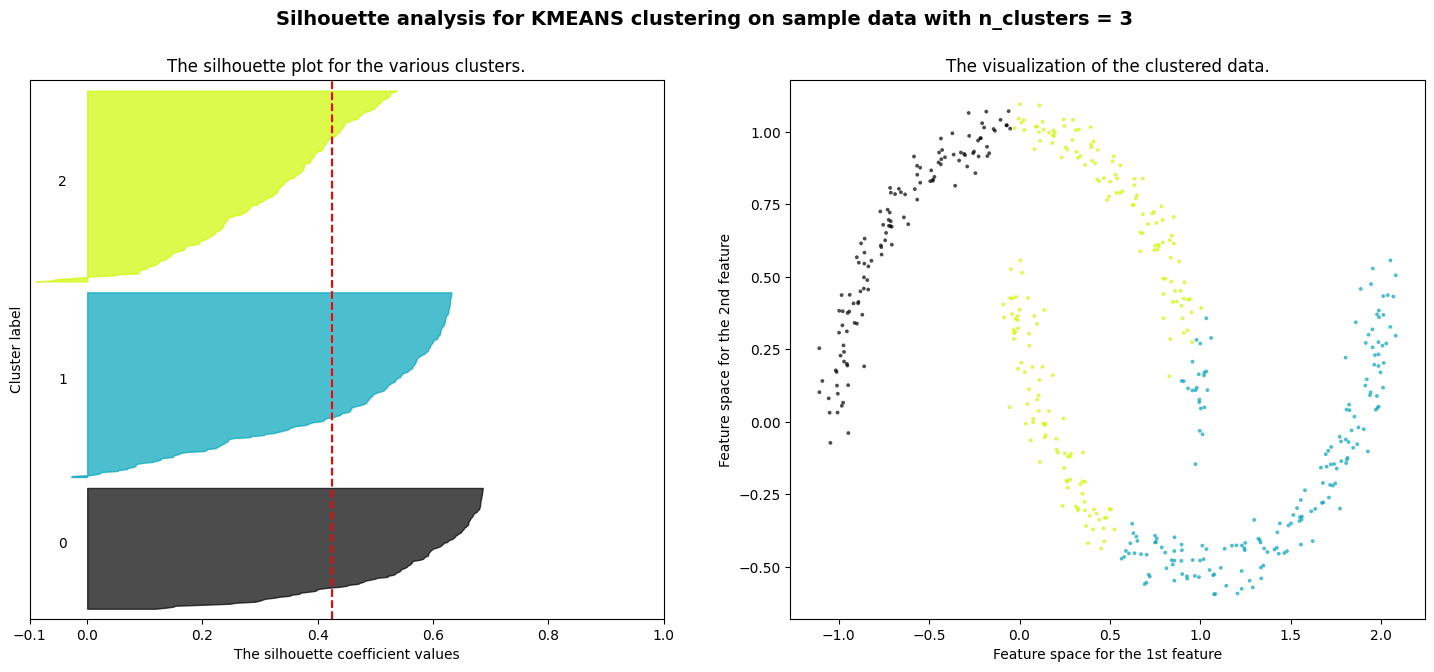

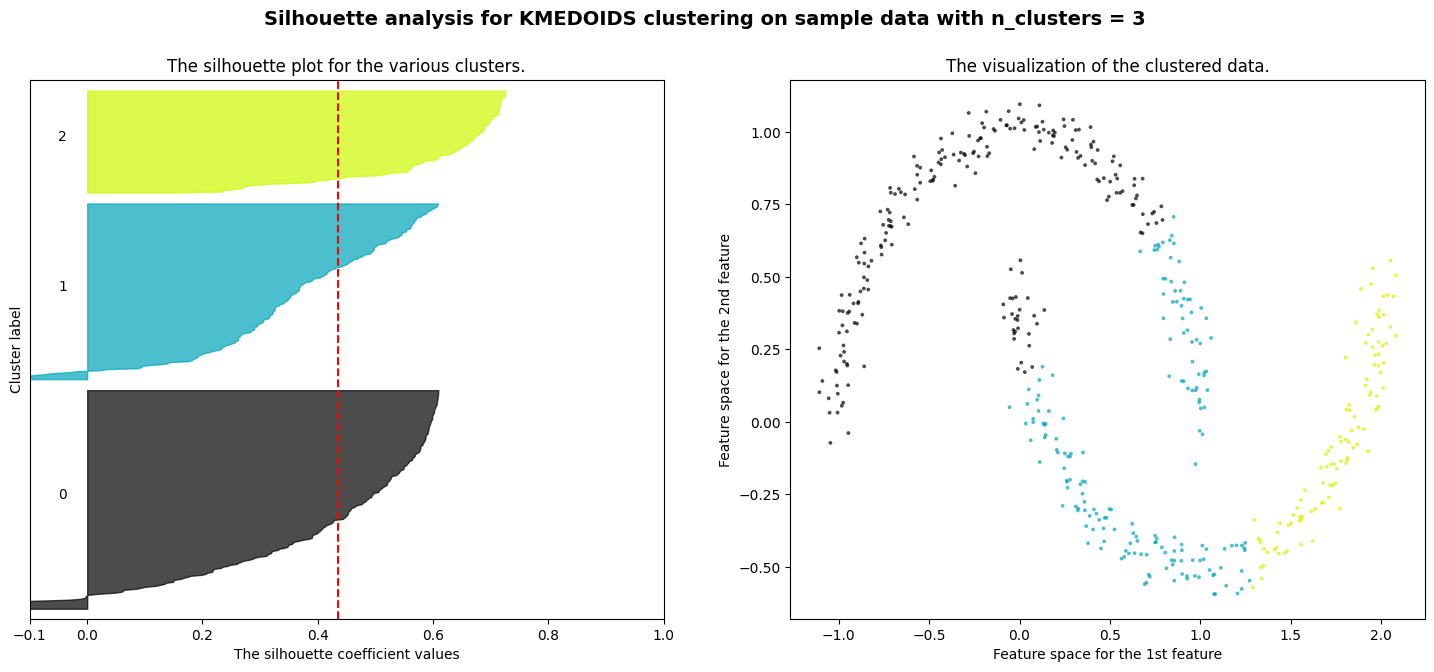

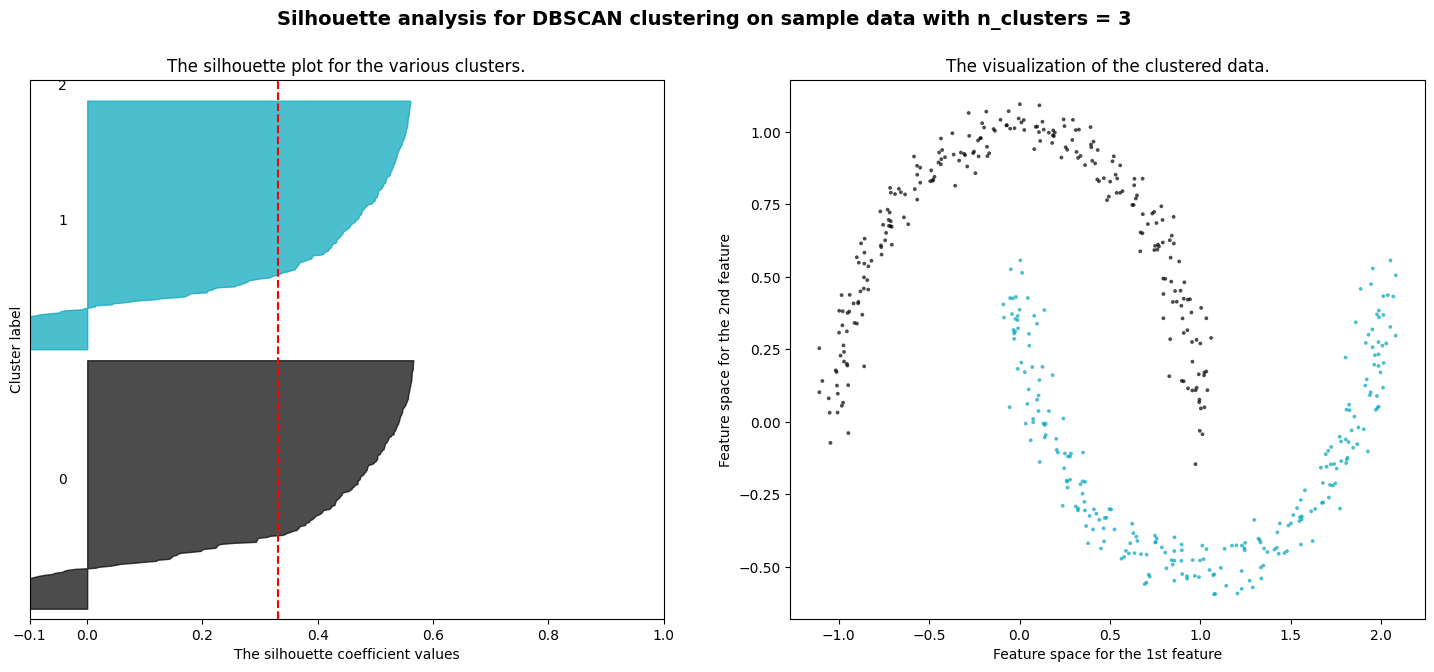

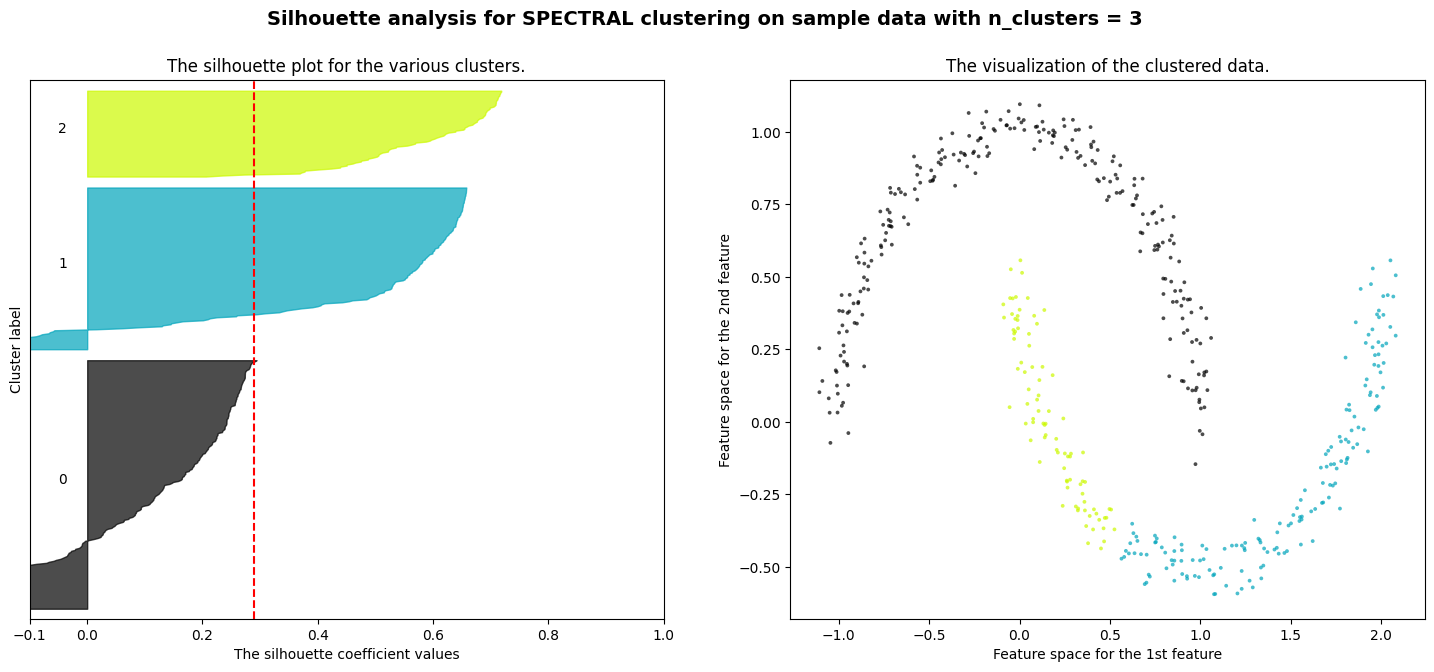

KMEANS
For n_clusters = 4 The average silhouette_score is : 0.459676400898139
KMEDOIDS
For n_clusters = 4 The average silhouette_score is : 0.4614666146131011
DBSCAN
For n_clusters = 4 The average silhouette_score is : 0.33169588709155956
SPECTRAL
For n_clusters = 4 The average silhouette_score is : 0.4547644214669692


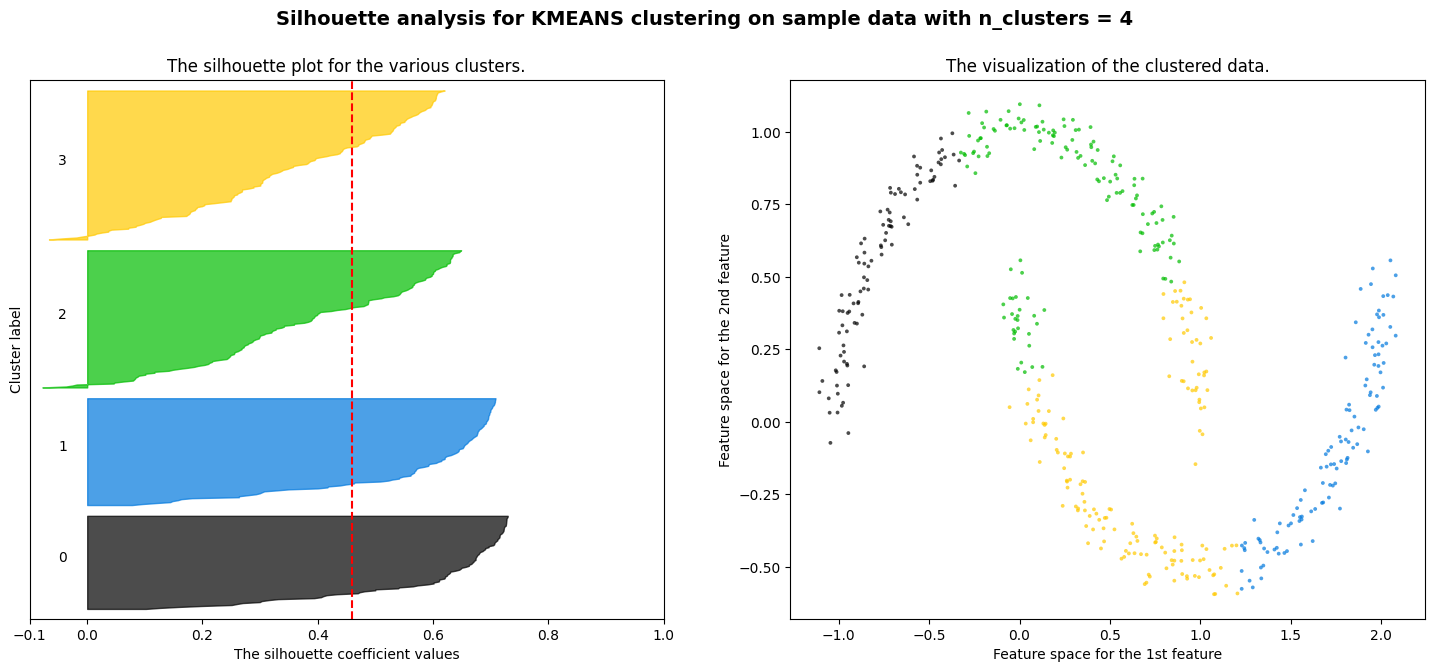

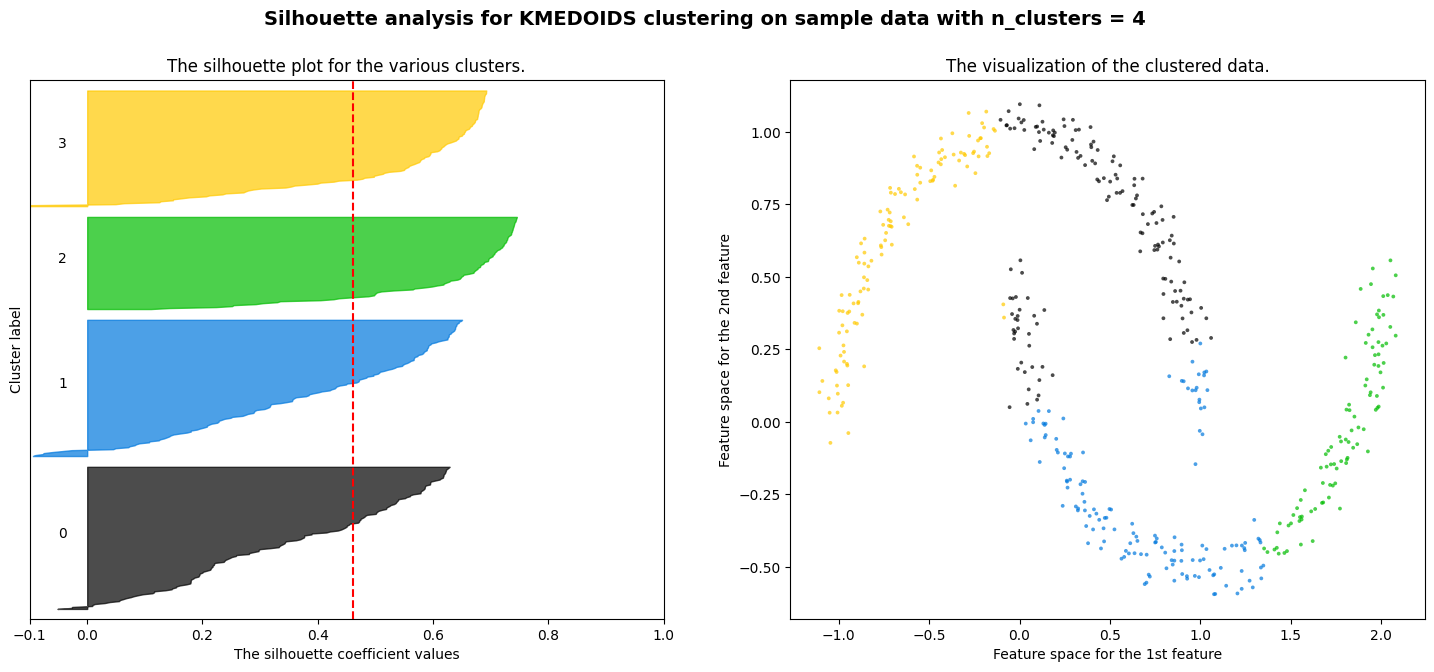

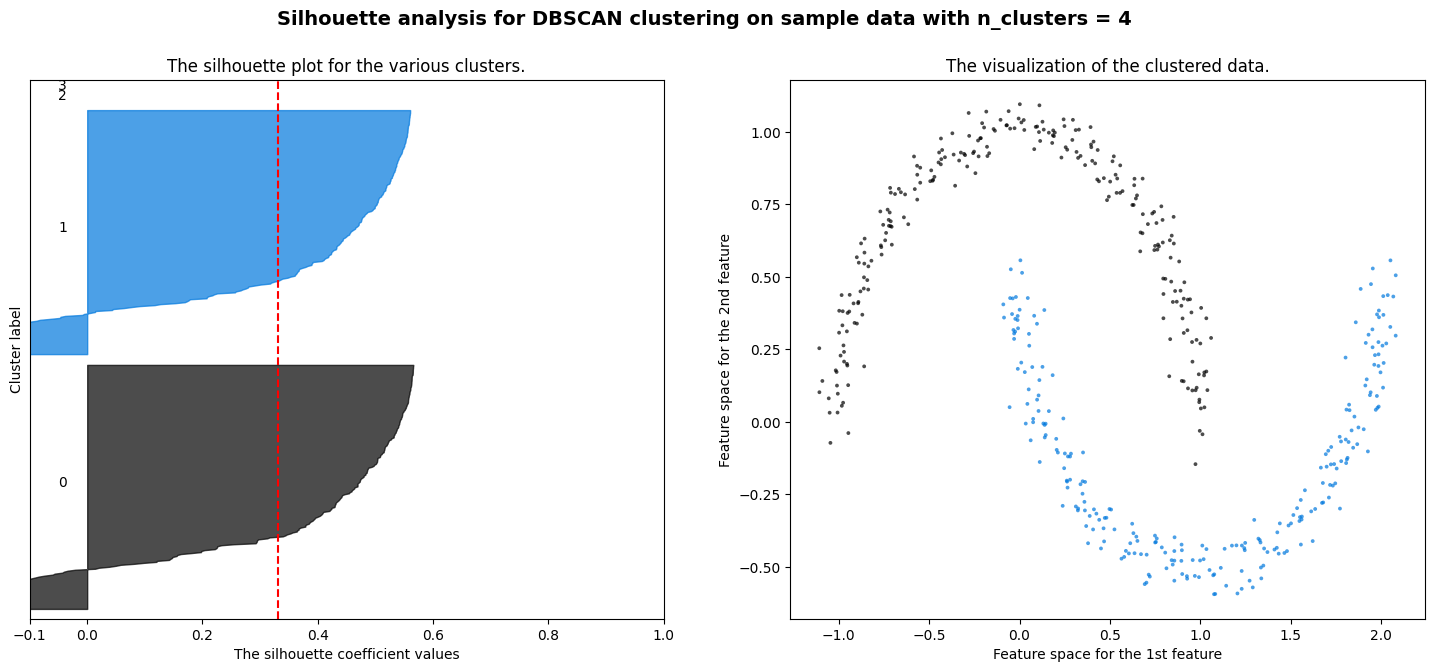

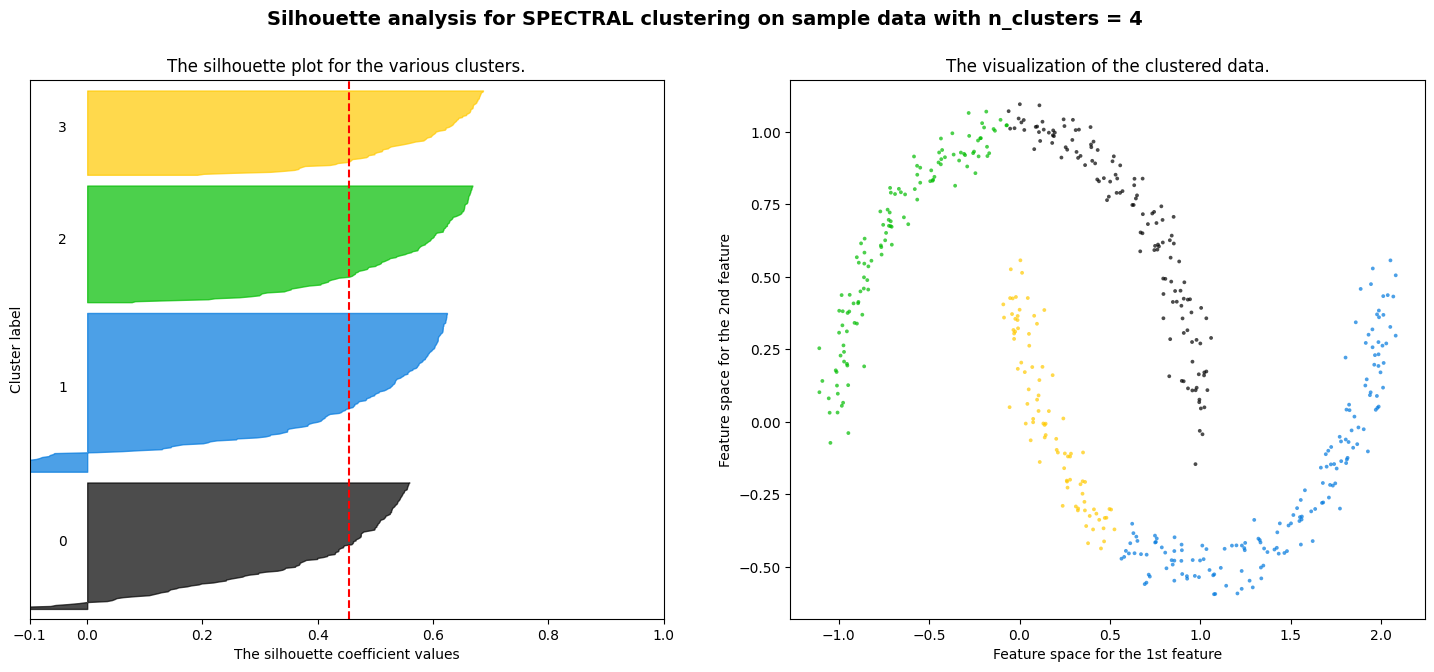

In [61]:
X = noisy_moons[0]
y = noisy_moons[1]
for k in range_n_clusters:
    print(f"Training {k} clusters ...")
    models = []
    # kmeans
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
    kmeans_labels = kmeans.fit_predict(X)
    models.append((kmeans,kmeans_labels,'KMEANS'))
    # kmedoids
    kmedoids = KMedoids(n_clusters=k, random_state=0)
    kmedoids_labels = kmedoids.fit_predict(X)
    models.append((kmedoids,kmedoids_labels,'KMEDOIDS'))
    # dbscan
    dbscan = DBSCAN(eps=0.2, min_samples=8, algorithm='auto', metric='euclidean')
    dbscan_labels = dbscan.fit_predict(X)
    models.append((dbscan,dbscan_labels, 'DBSCAN'))
    # spectral
    spectral = SpectralClustering(n_clusters=k,affinity='nearest_neighbors',assign_labels='kmeans',random_state=0)
    spectral_labels = spectral.fit_predict(X)
    models.append((spectral,spectral_labels, 'SPECTRAL'))
    k_models[k] = models
print("Training complete!")
plot_clusters(k_models, range_n_clusters)

Noisy Moons:
- I obtain the best silhouette coefficient in kmeans algorithm for 2 cluter
- I expected that the clusters are separated into two groups given the semicircles, but this does not happen for the KMEANS and KMEDOIDS algorithms, I only got it for DBSCAN and Spectral Clustering
- DBSCAN and Spectral Clustering manage to separate the data as expected, but the value of the coefficient makes me doubt their use
- Here perhaps we can see the lack of ability of K MEANS and KMEDOIDS to do a non-linear separation

#### Blobs

Training 2 clusters ...
Training 3 clusters ...
Training 4 clusters ...
Training complete!
KMEANS
For n_clusters = 2 The average silhouette_score is : 0.7851727153851467
KMEDOIDS
For n_clusters = 2 The average silhouette_score is : 0.7851727153851467
DBSCAN
For n_clusters = 2 The average silhouette_score is : 0.8229367222836427
SPECTRAL
For n_clusters = 2 The average silhouette_score is : 0.7851727153851467


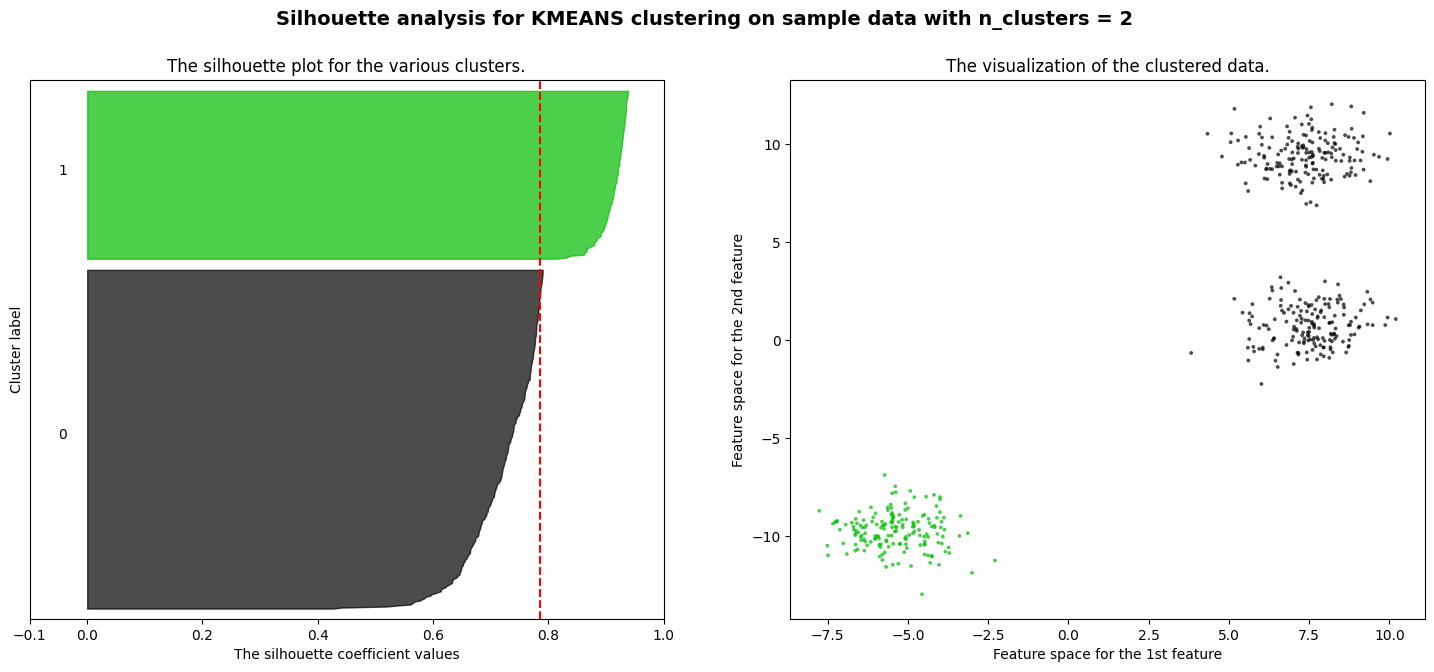

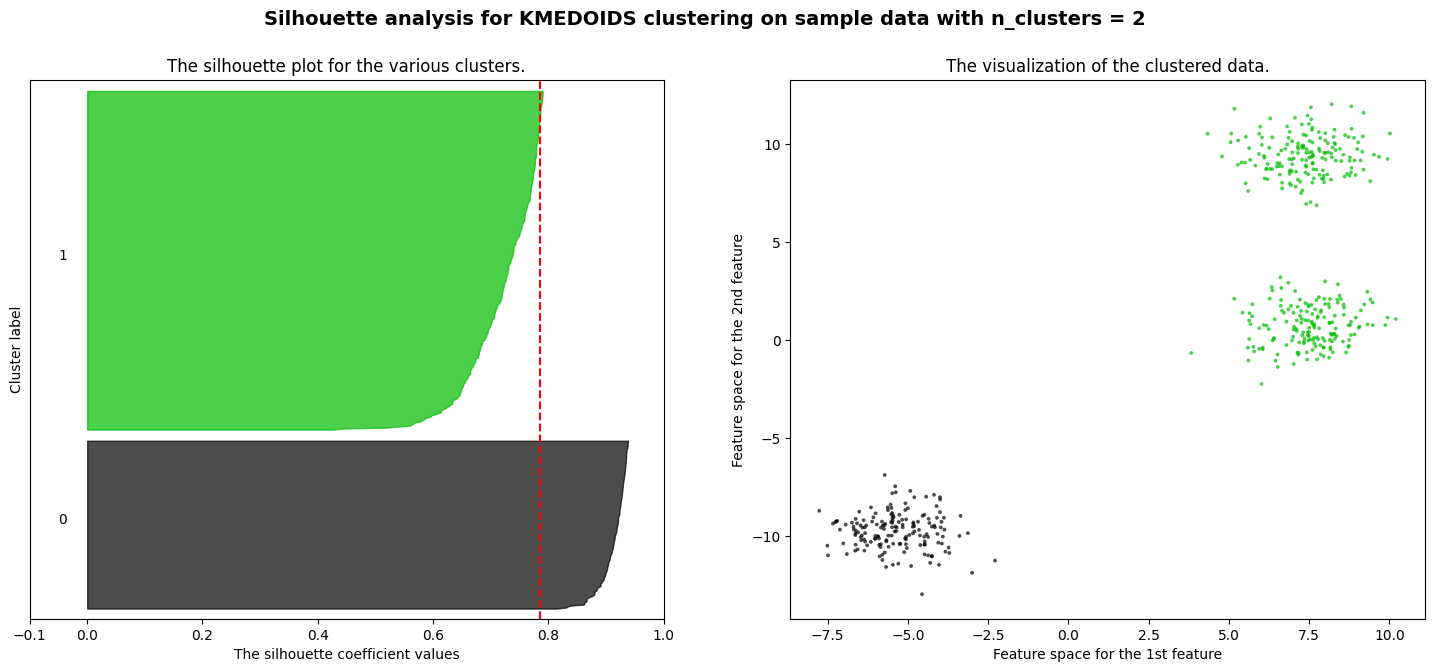

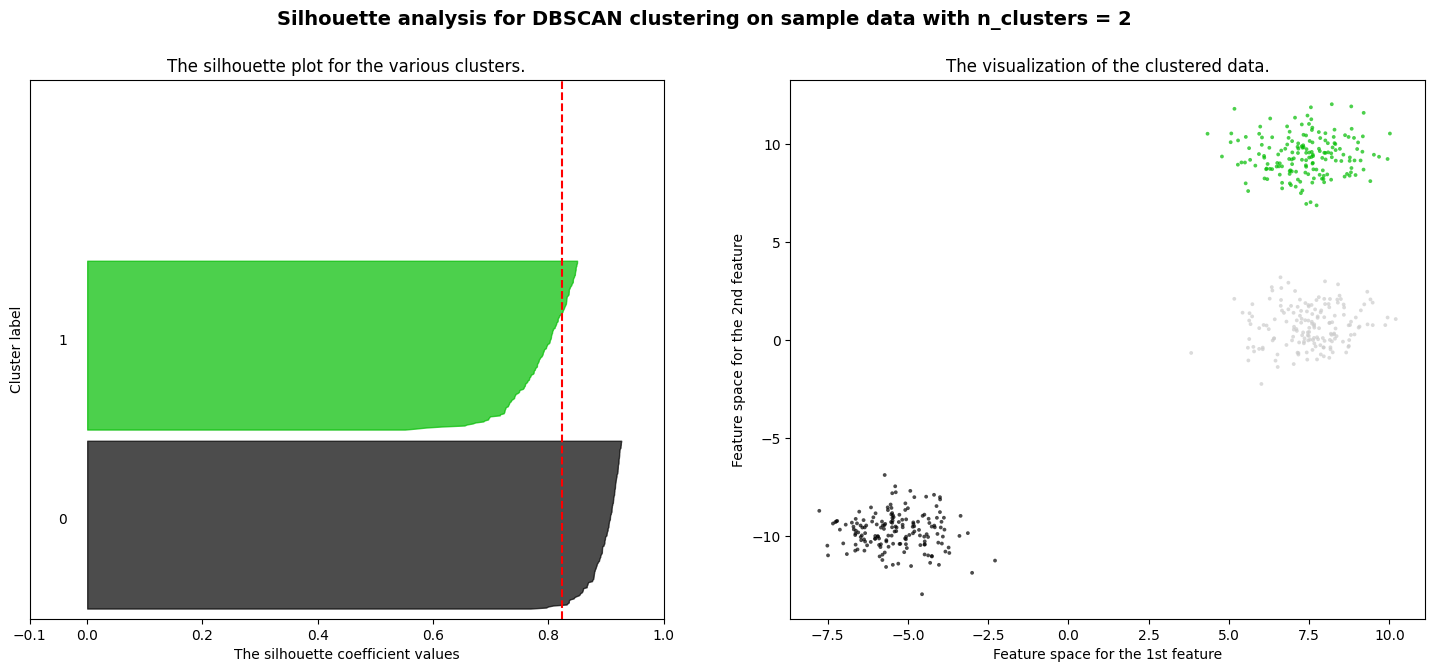

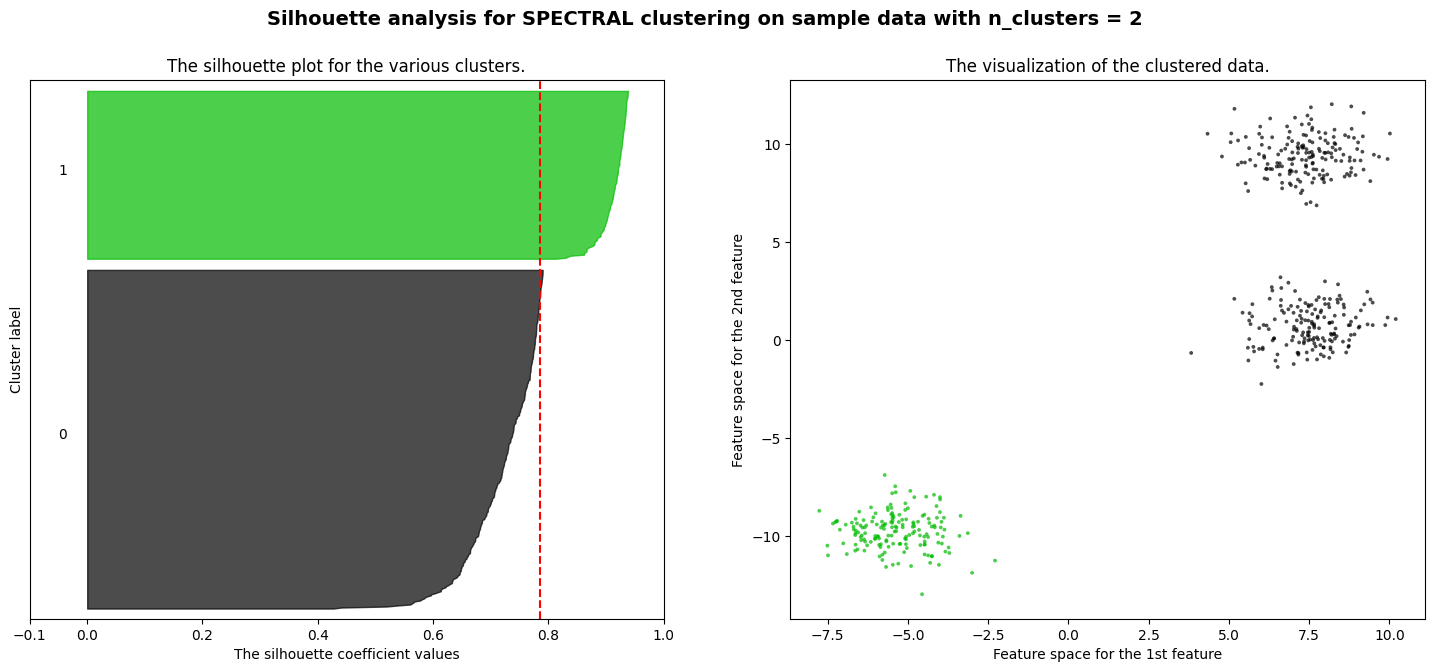

KMEANS
For n_clusters = 3 The average silhouette_score is : 0.8229367222836427
KMEDOIDS
For n_clusters = 3 The average silhouette_score is : 0.8229367222836427
DBSCAN
For n_clusters = 3 The average silhouette_score is : 0.8229367222836427
SPECTRAL
For n_clusters = 3 The average silhouette_score is : 0.8229367222836427


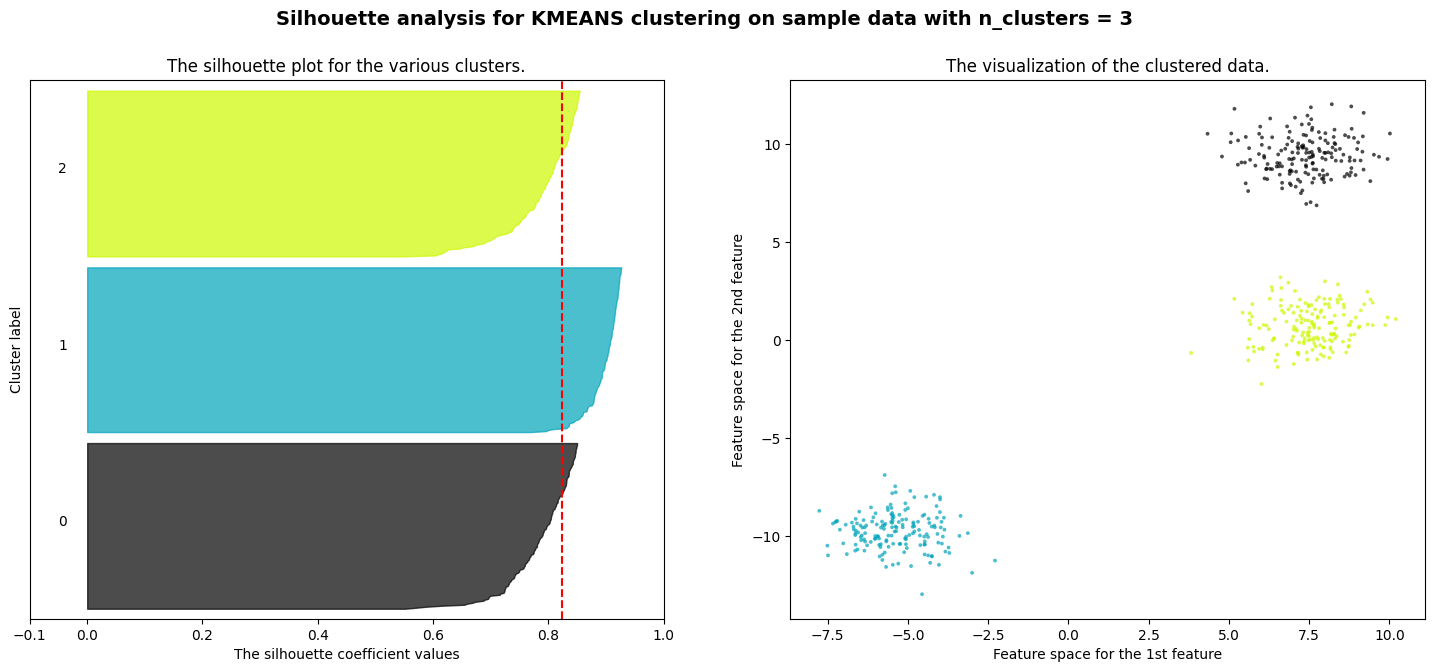

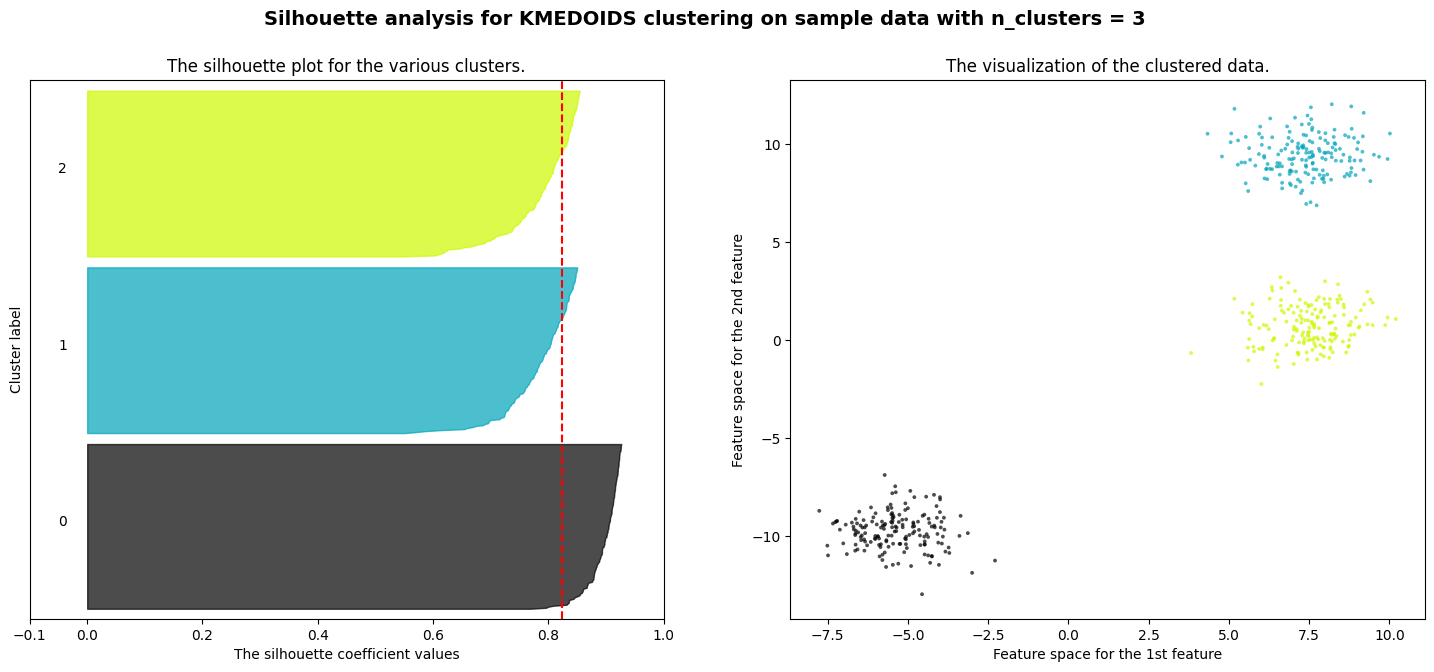

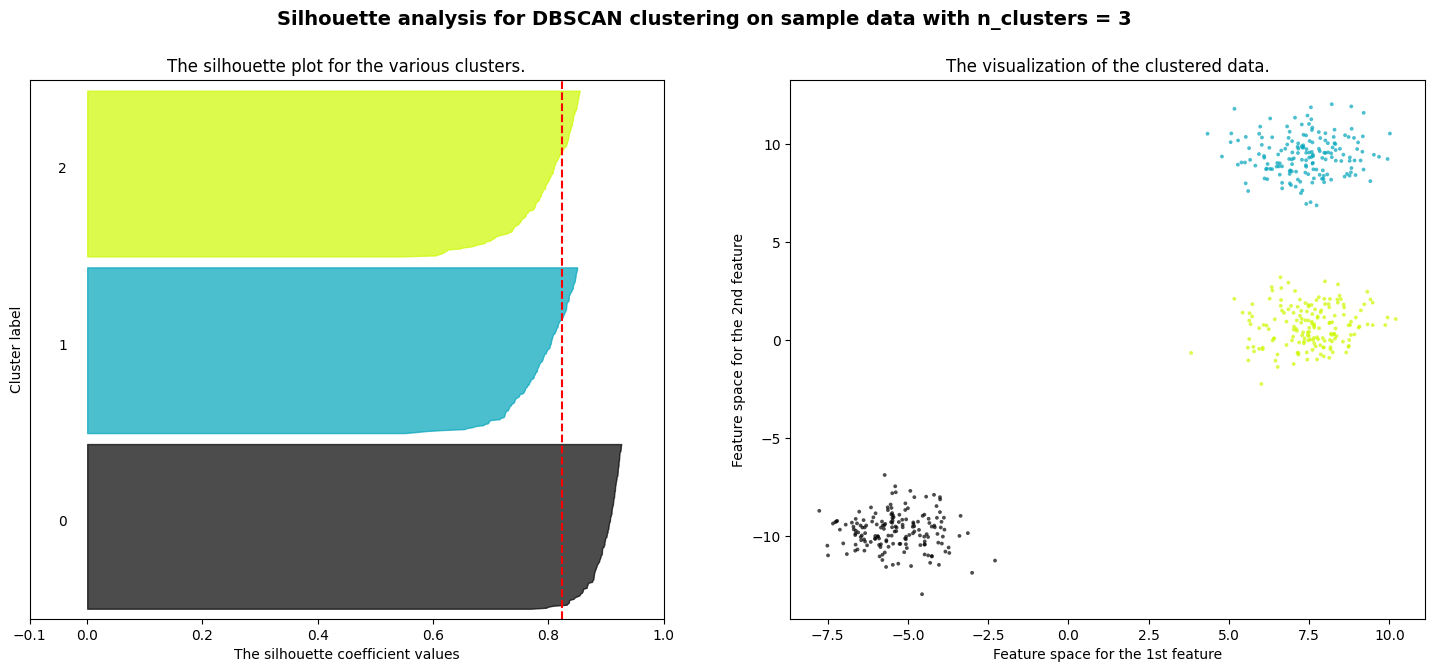

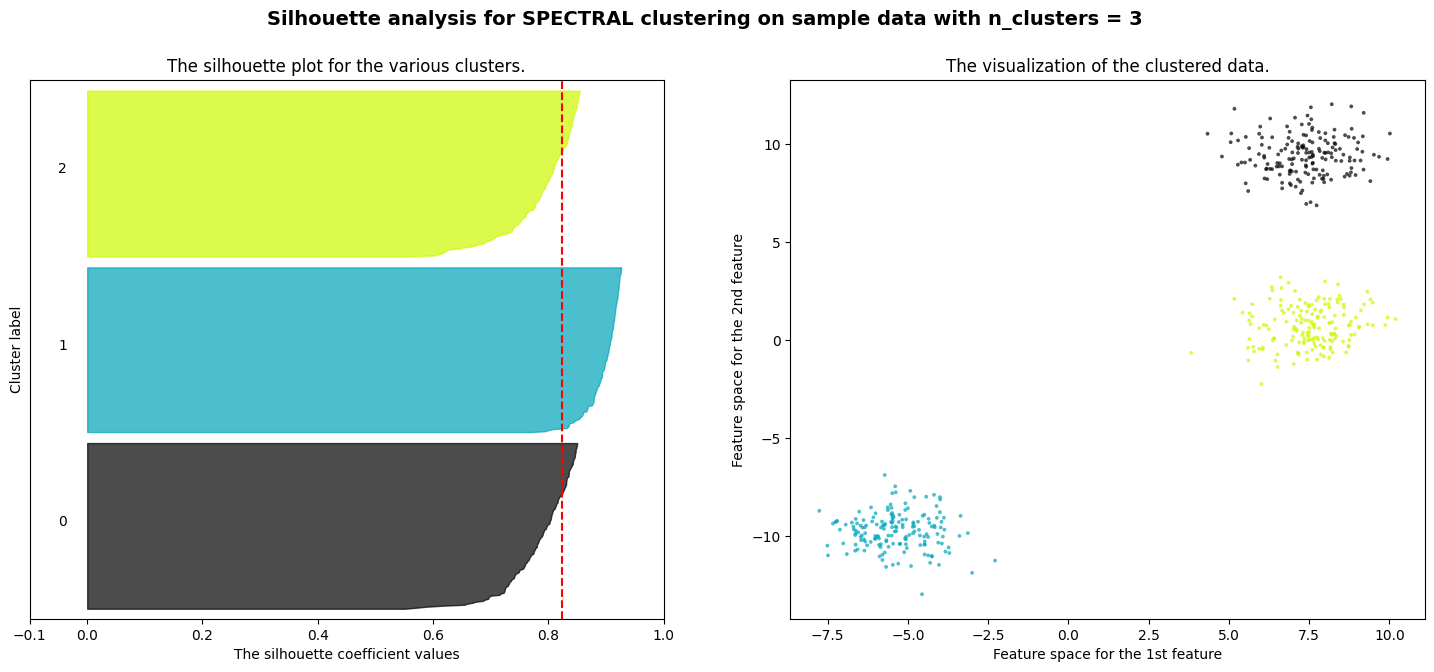

KMEANS
For n_clusters = 4 The average silhouette_score is : 0.6433907494918834
KMEDOIDS
For n_clusters = 4 The average silhouette_score is : 0.659756319390794
DBSCAN
For n_clusters = 4 The average silhouette_score is : 0.8229367222836427
SPECTRAL
For n_clusters = 4 The average silhouette_score is : 0.6628365907095686


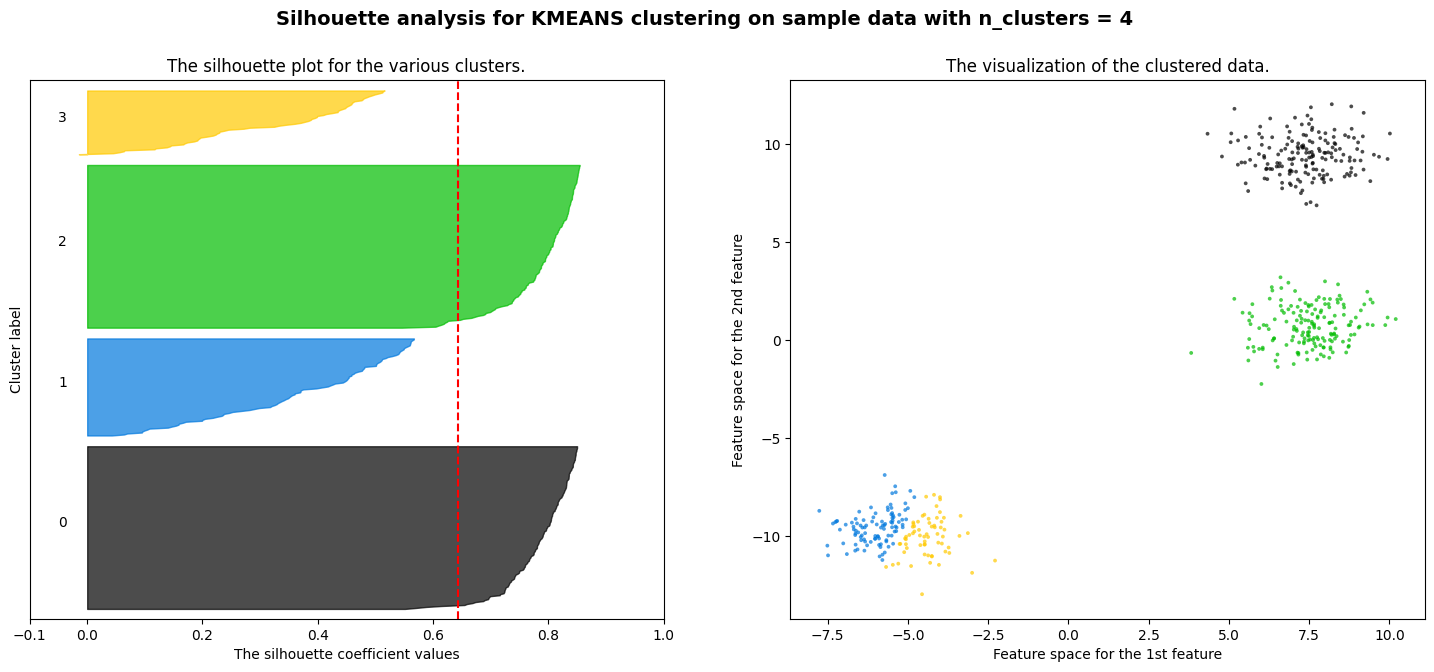

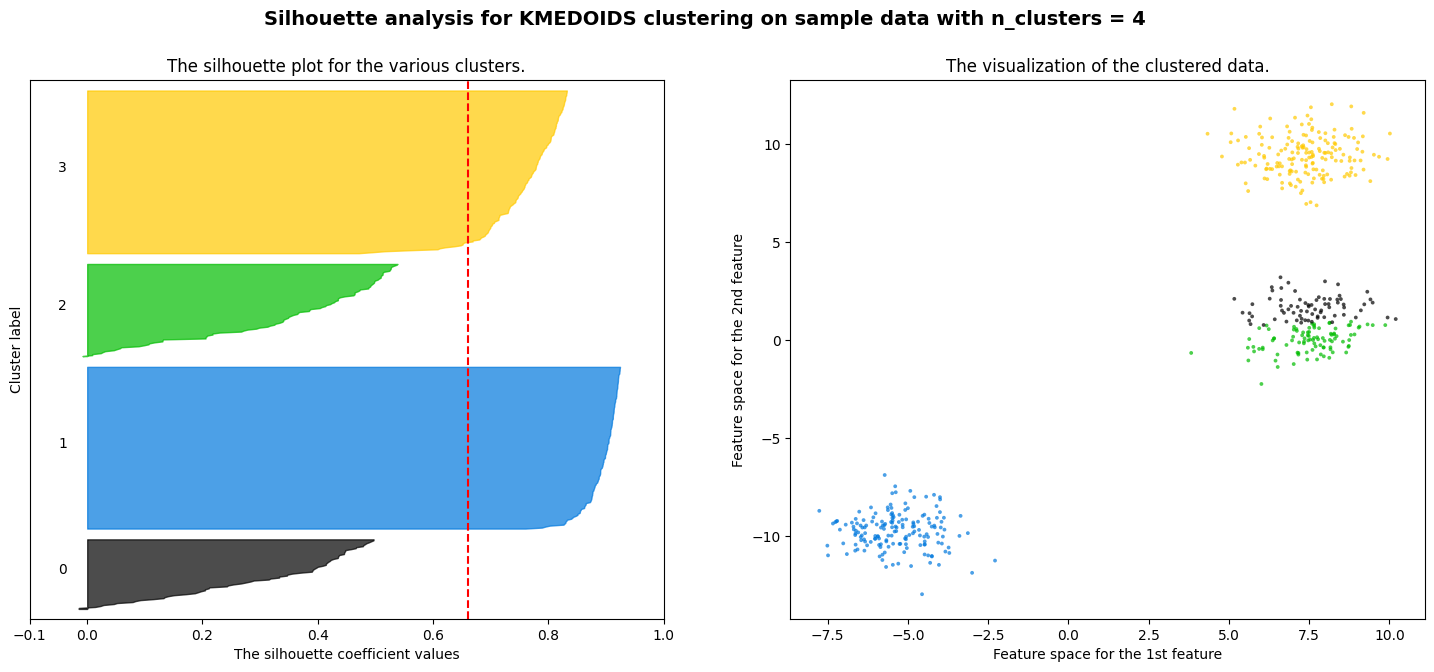

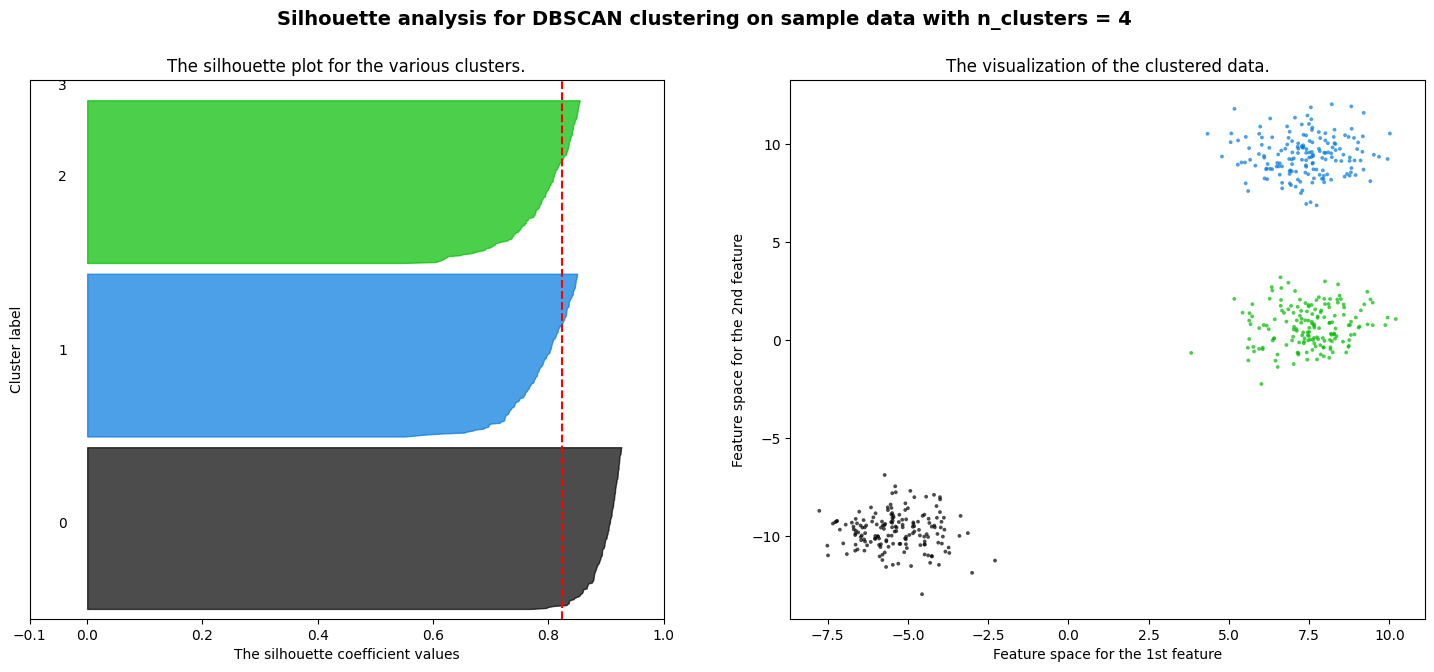

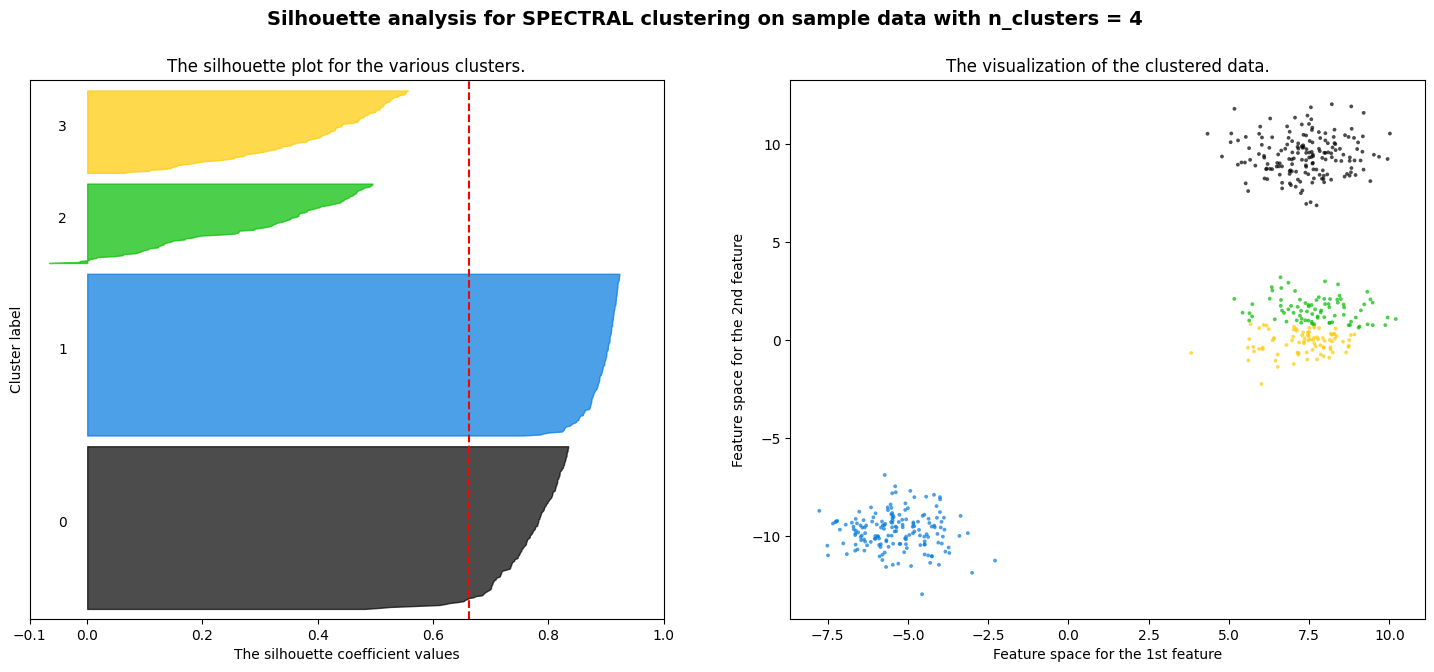

In [65]:
X = blobs[0]
y = blobs[1]
for k in range_n_clusters:
    print(f"Training {k} clusters ...")
    models = []
    # kmeans
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
    kmeans_labels = kmeans.fit_predict(X)
    models.append((kmeans,kmeans_labels,'KMEANS'))
    # kmedoids
    kmedoids = KMedoids(n_clusters=k, random_state=0)
    kmedoids_labels = kmedoids.fit_predict(X)
    models.append((kmedoids,kmedoids_labels,'KMEDOIDS'))
    # dbscan
    dbscan = DBSCAN(eps=3, min_samples=2, algorithm='auto')
    dbscan_labels = dbscan.fit_predict(X)
    models.append((dbscan,dbscan_labels, 'DBSCAN'))
    # spectral
    spectral = SpectralClustering(n_clusters=k,assign_labels='discretize',random_state=0)
    spectral_labels = spectral.fit_predict(X)
    models.append((spectral,spectral_labels, 'SPECTRAL'))
    k_models[k] = models
print("Training complete!")
plot_clusters(k_models, range_n_clusters)

Blobs:
- I obtain the best silhouette coefficient for all the algorithms in 3 clusters
- Here you can see the ability of DBSCAN to predict the clusters without the need for the user to indicate them

#### No Structure

Training 2 clusters ...
Training 3 clusters ...
Training 4 clusters ...
Training complete!
KMEANS
For n_clusters = 2 The average silhouette_score is : 0.36047865734349344
KMEDOIDS
For n_clusters = 2 The average silhouette_score is : 0.3271042740679595
Error in silhouette for model  DBSCAN
SPECTRAL
For n_clusters = 2 The average silhouette_score is : 0.3602766222024603


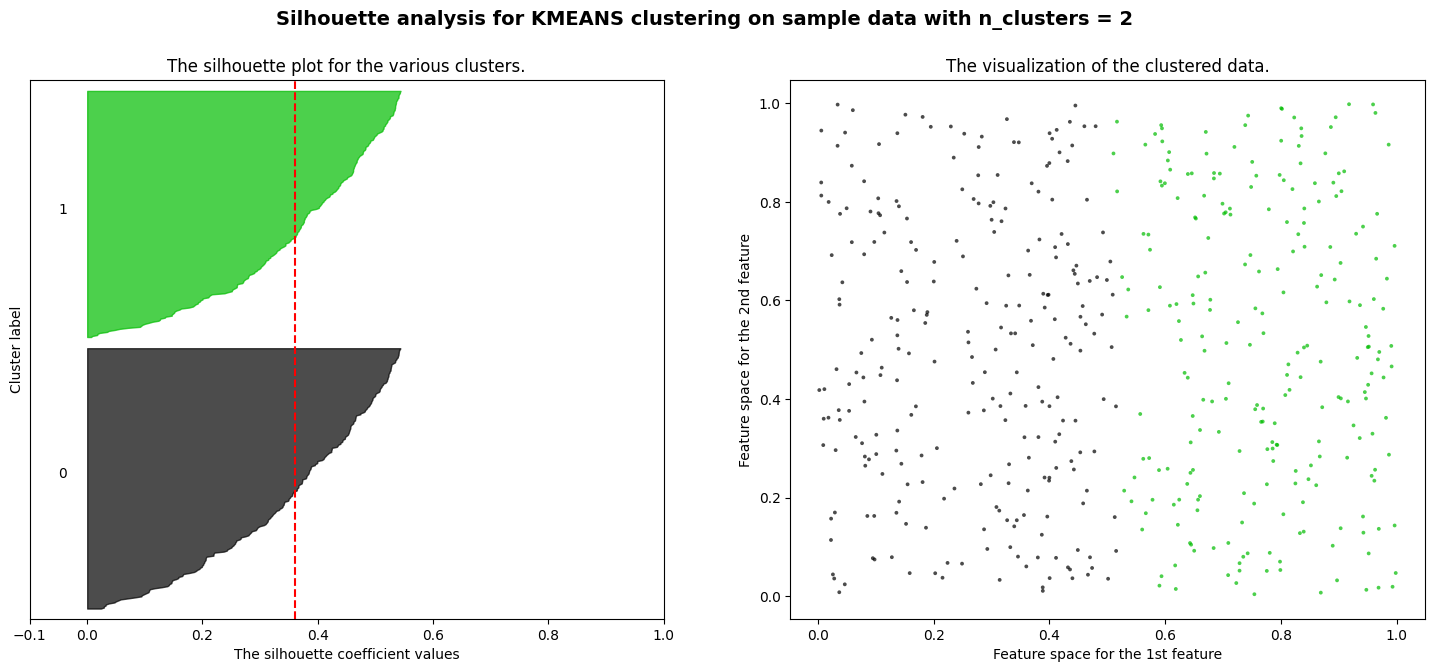

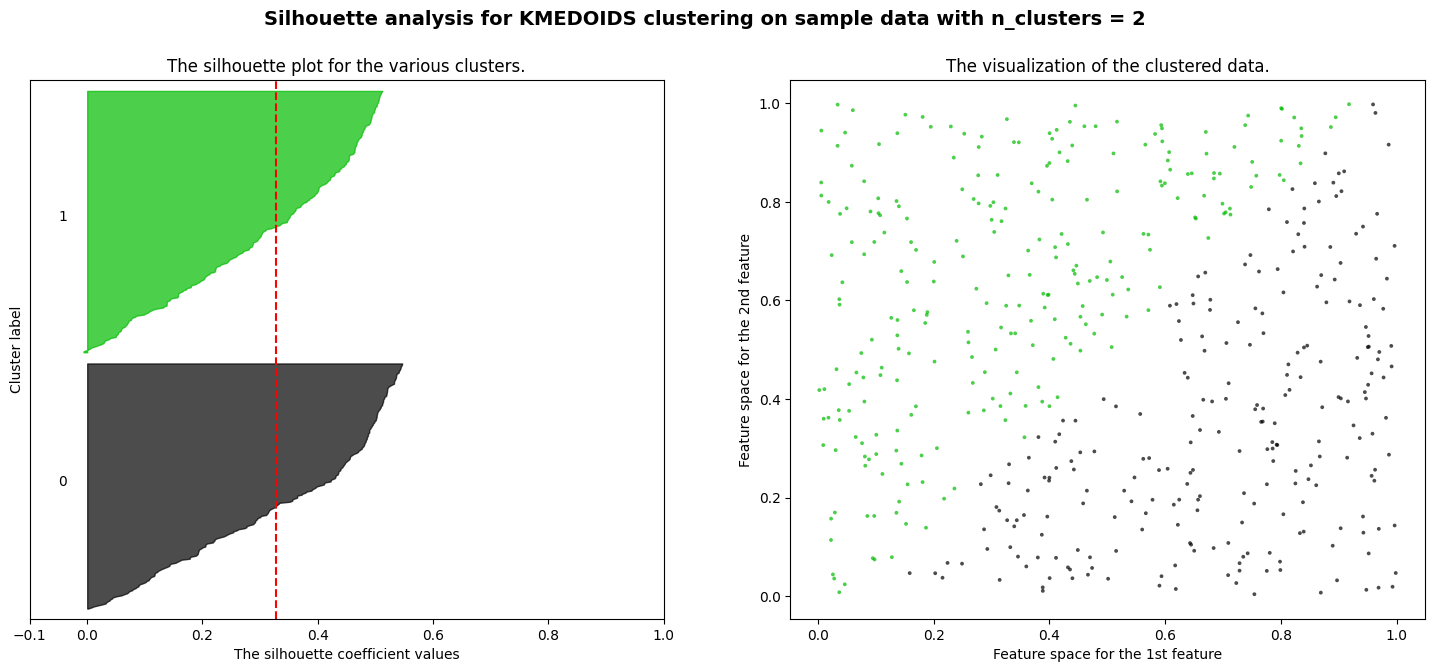

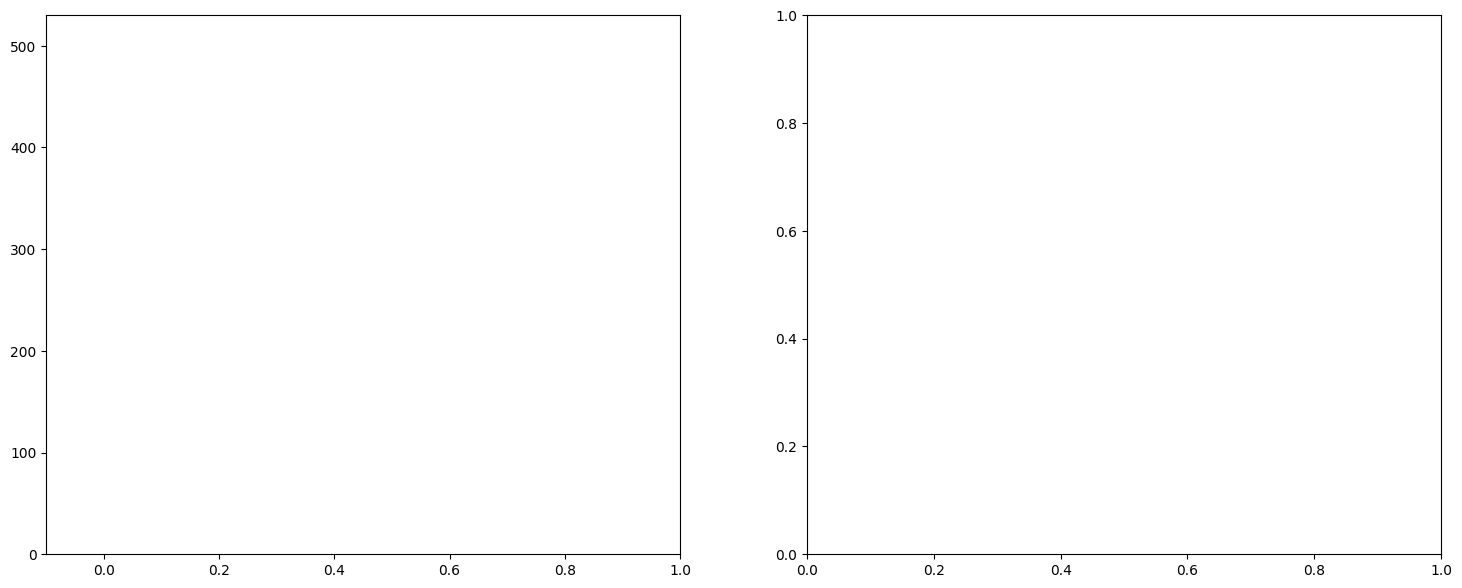

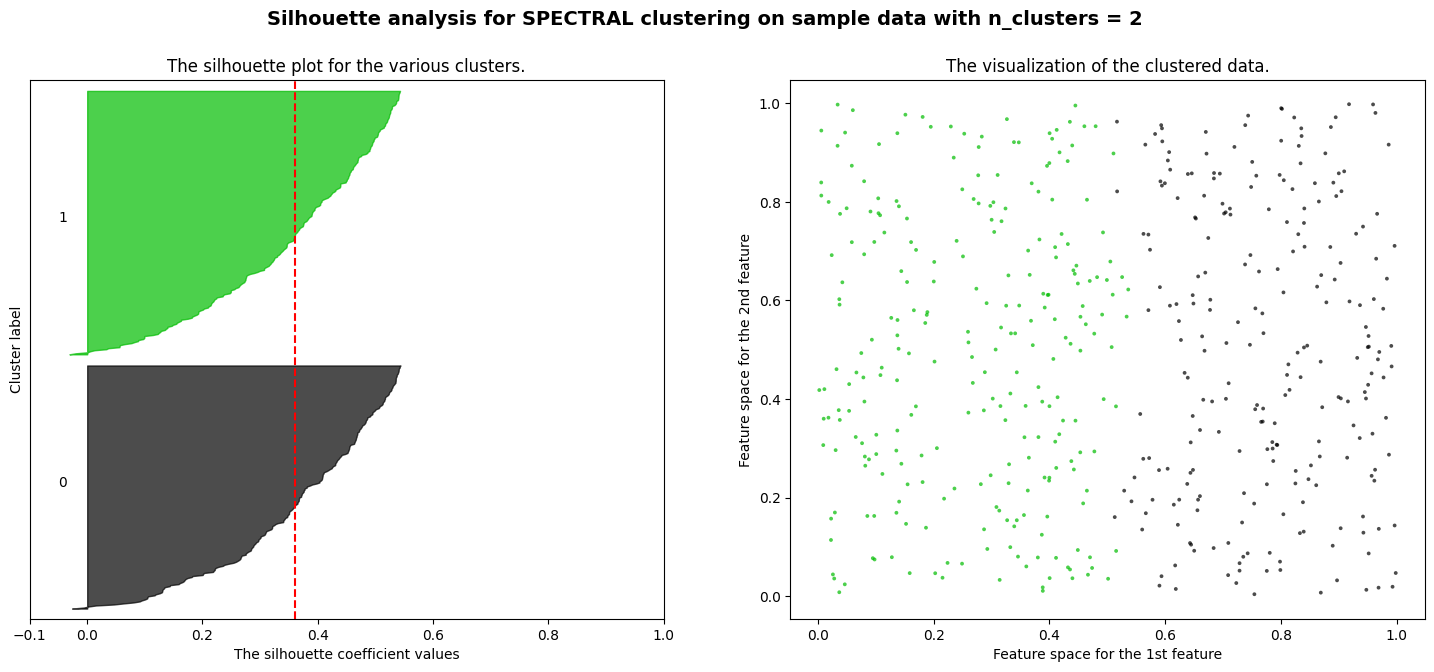

KMEANS
For n_clusters = 3 The average silhouette_score is : 0.37643538418281075
KMEDOIDS
For n_clusters = 3 The average silhouette_score is : 0.3861340555782225
Error in silhouette for model  DBSCAN
SPECTRAL
For n_clusters = 3 The average silhouette_score is : 0.386154182881948


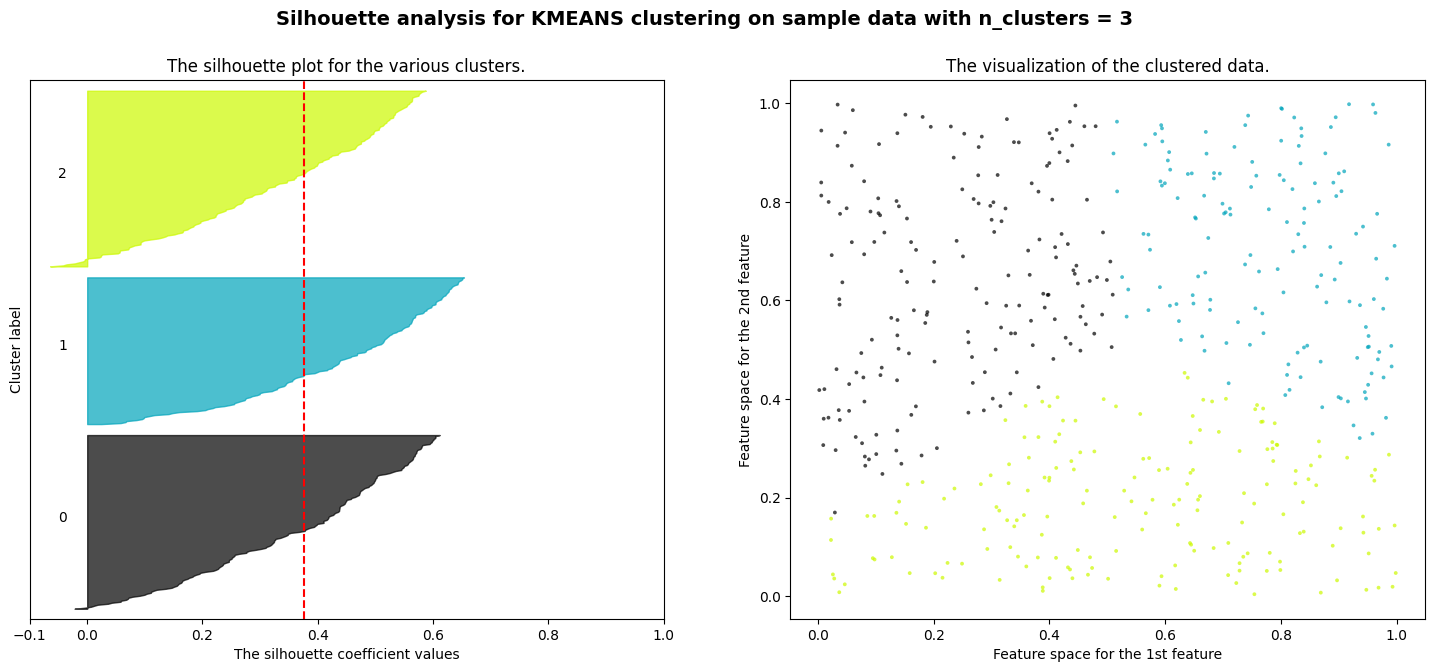

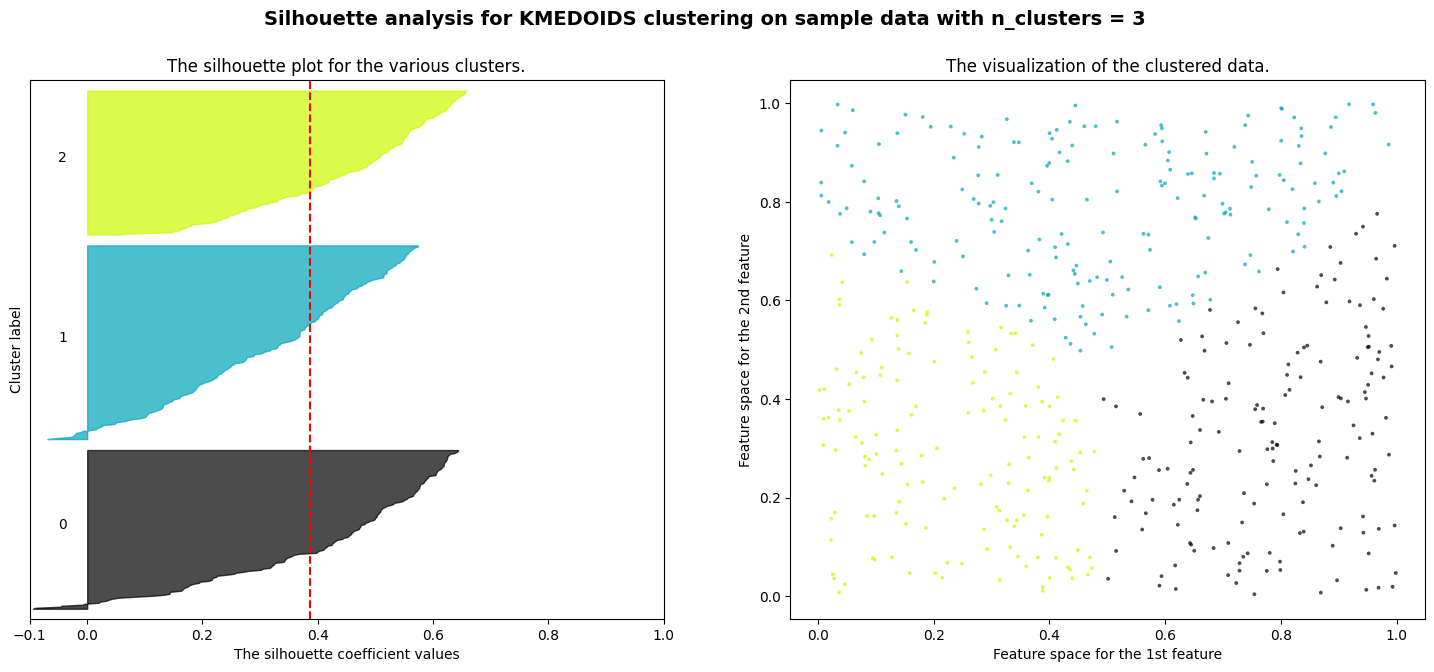

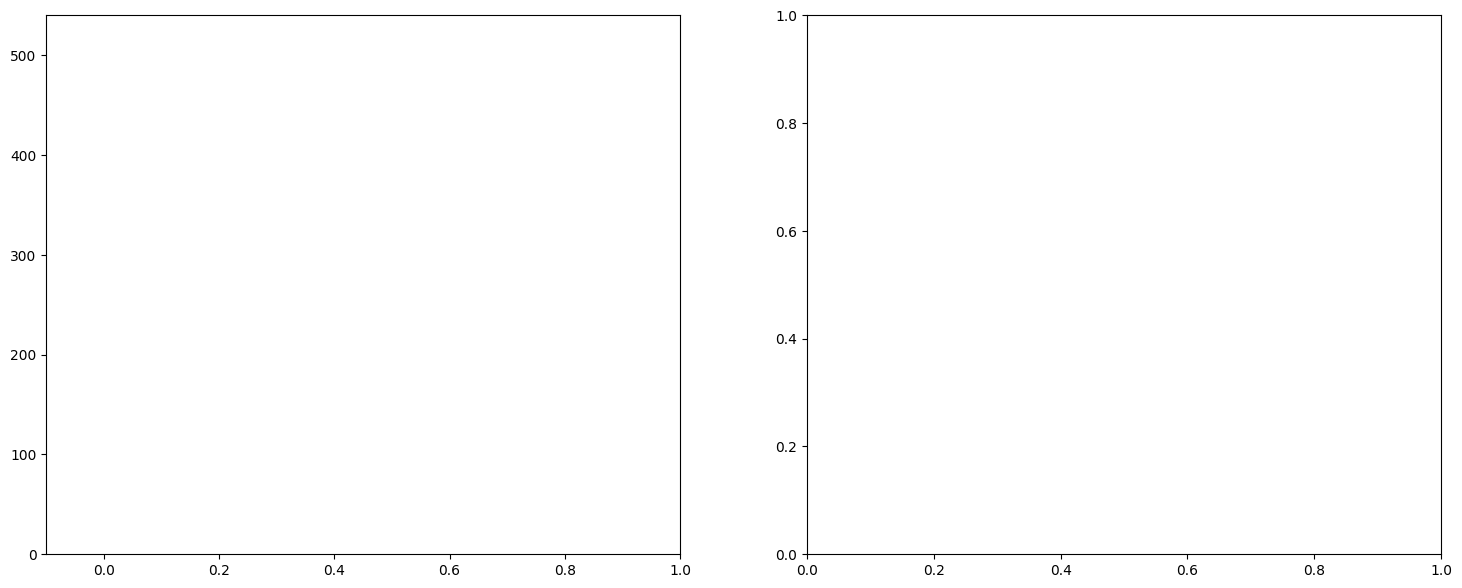

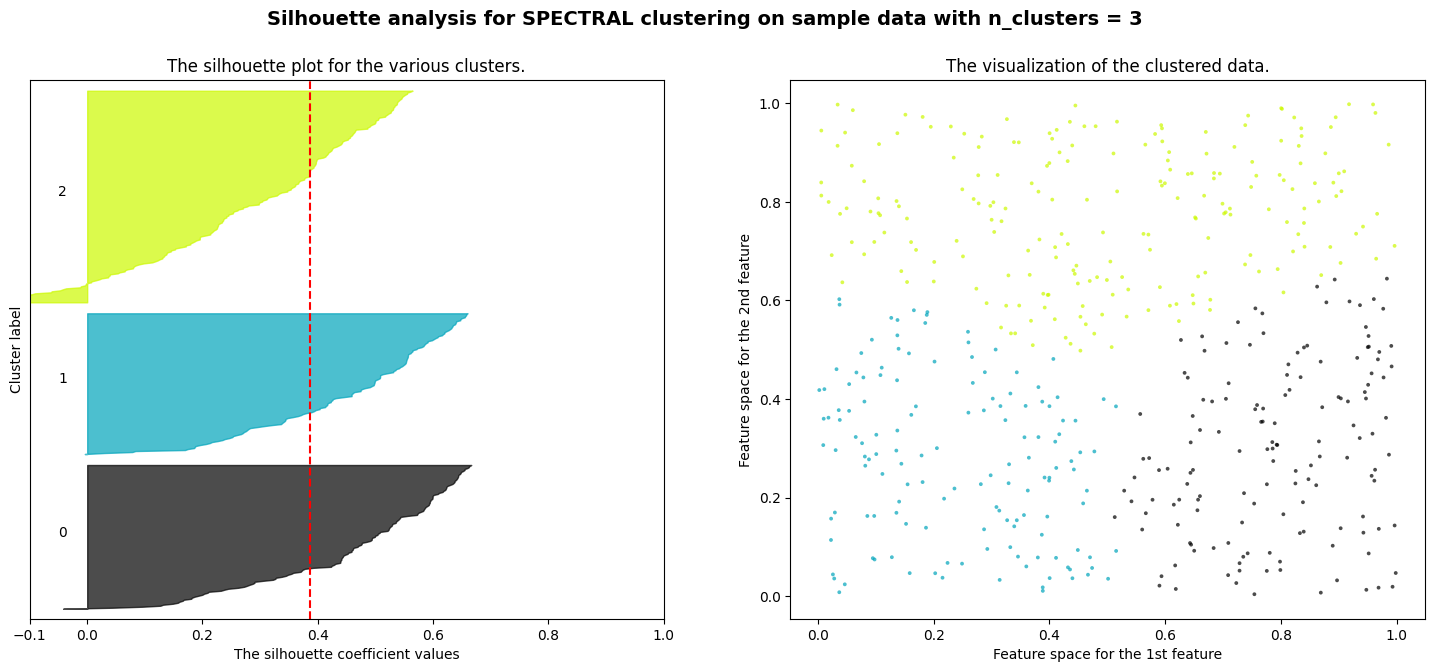

KMEANS
For n_clusters = 4 The average silhouette_score is : 0.41166387647138913
KMEDOIDS
For n_clusters = 4 The average silhouette_score is : 0.4119010703001115
Error in silhouette for model  DBSCAN
SPECTRAL
For n_clusters = 4 The average silhouette_score is : 0.4113366377508174


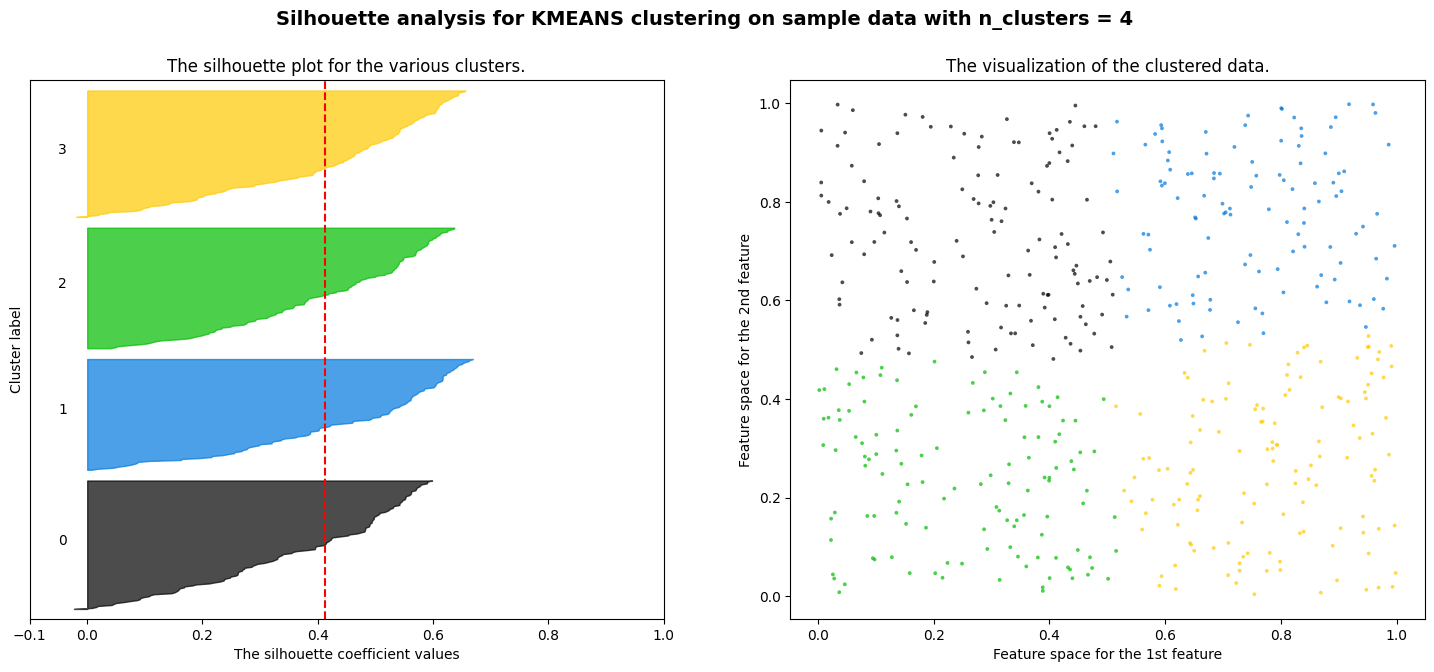

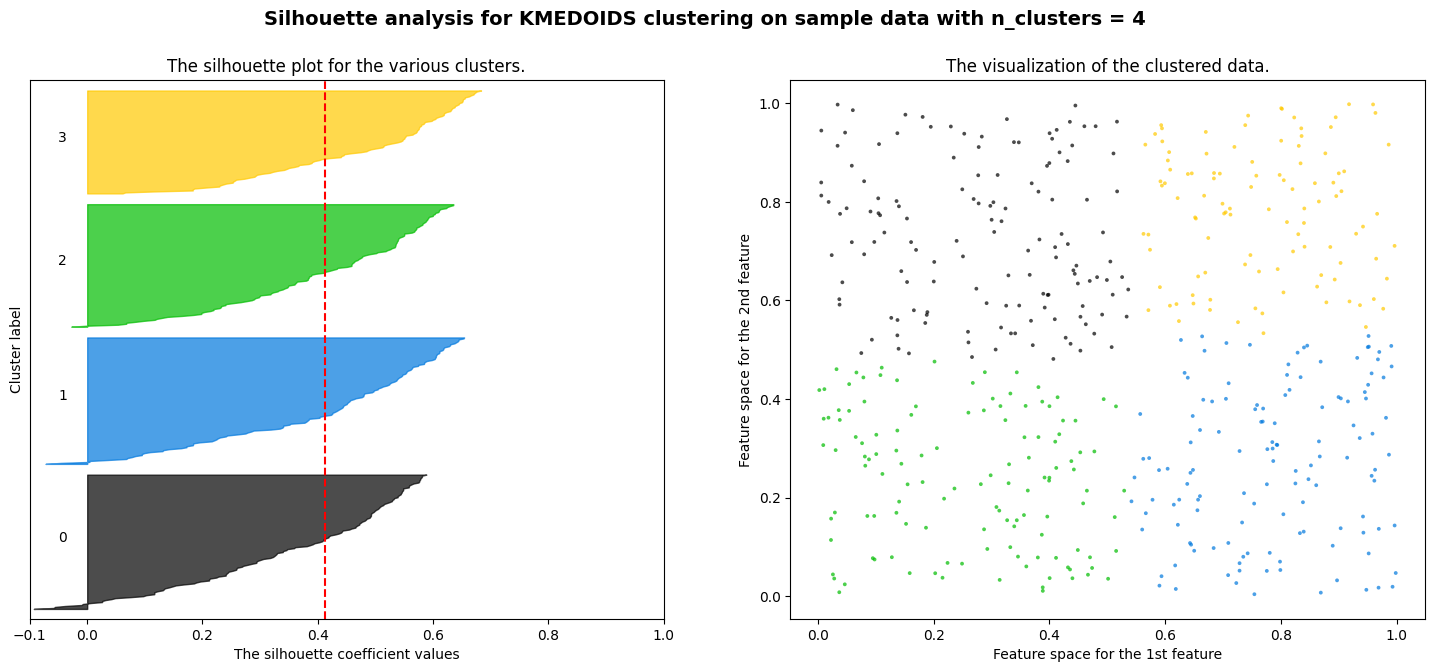

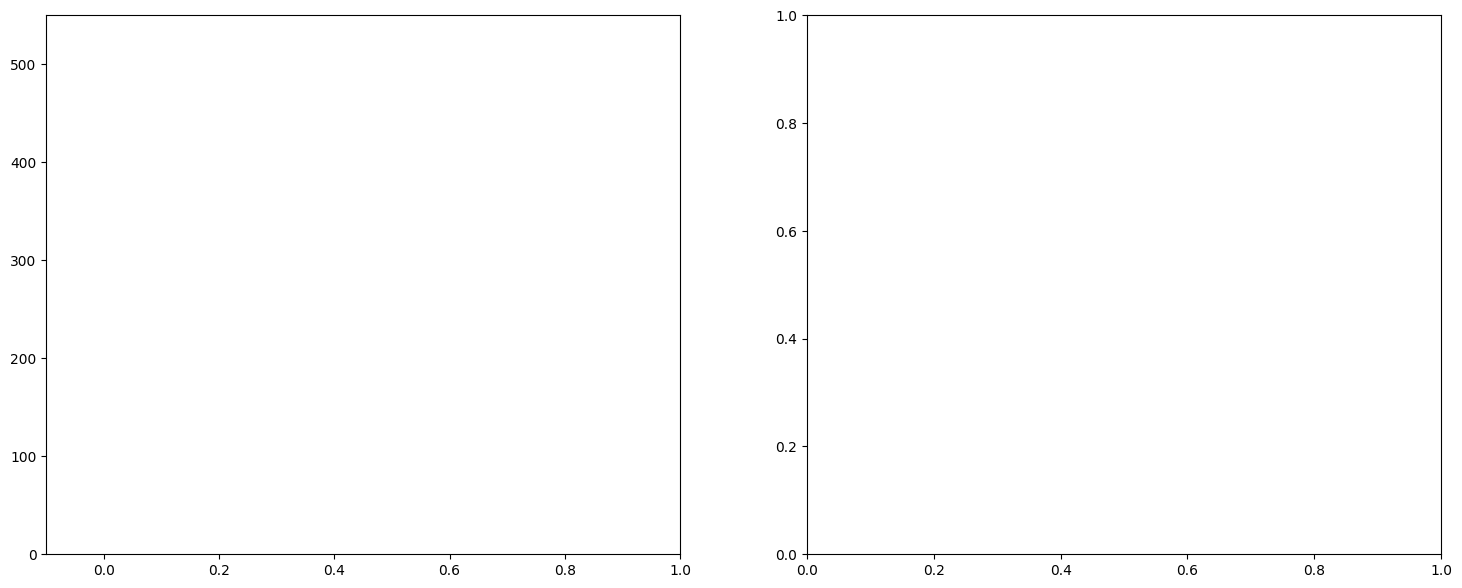

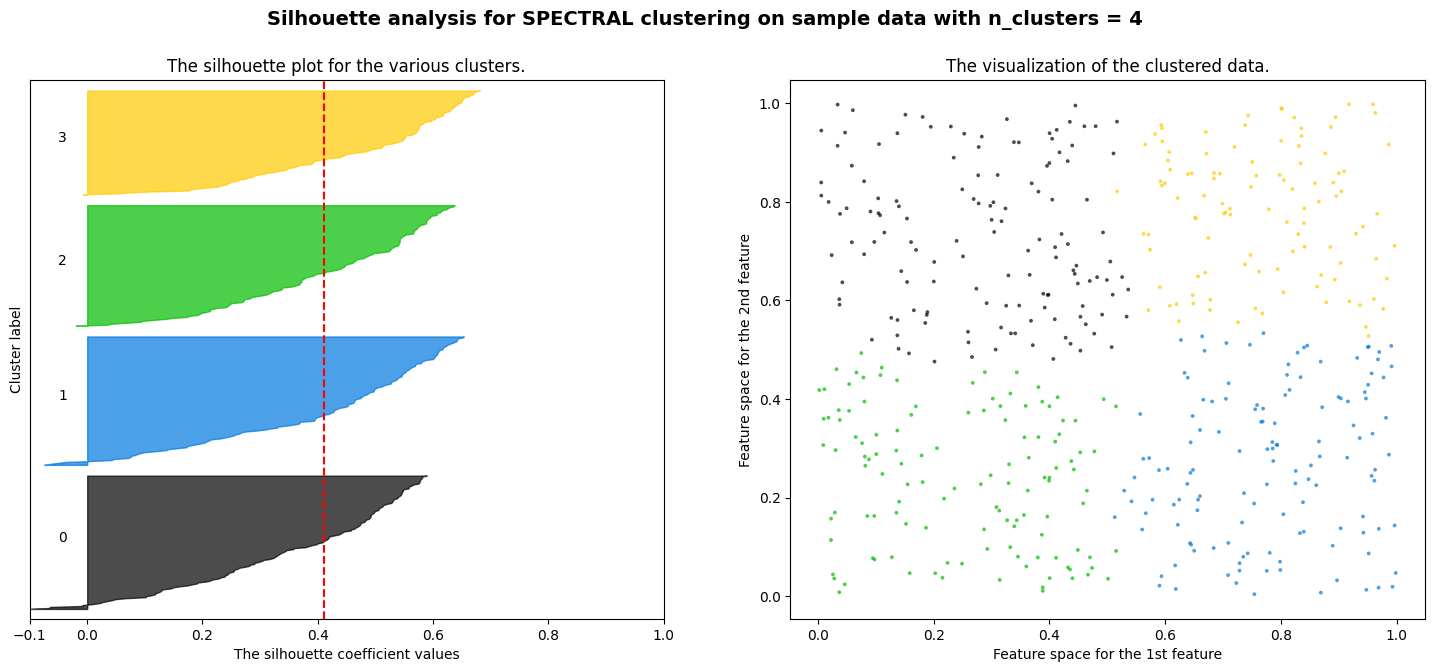

In [70]:
X = no_structure[0]
y = no_structure[1]
for k in range_n_clusters:
    print(f"Training {k} clusters ...")
    models = []
    # kmeans
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
    kmeans_labels = kmeans.fit_predict(X)
    models.append((kmeans,kmeans_labels,'KMEANS'))
    # kmedoids
    kmedoids = KMedoids(n_clusters=k, random_state=0)
    kmedoids_labels = kmedoids.fit_predict(X)
    models.append((kmedoids,kmedoids_labels,'KMEDOIDS'))
    # dbscan
    dbscan = DBSCAN(eps=0.2, min_samples=8, algorithm='auto', metric='euclidean')
    dbscan_labels = dbscan.fit_predict(X)
    models.append((dbscan,dbscan_labels, 'DBSCAN'))
    # spectral
    spectral = SpectralClustering(n_clusters=k,affinity='nearest_neighbors',assign_labels='kmeans',random_state=0)
    spectral_labels = spectral.fit_predict(X)
    models.append((spectral,spectral_labels, 'SPECTRAL'))
    k_models[k] = models
print("Training complete!")
plot_clusters(k_models, range_n_clusters)

No structure:
- I obtain the best silhouette coefficient in kmedoids algorithm for 4 cluter
- Here the DBSCAN algorithm finds it difficult to estimate clusters due to the distribution of the data.
- For 2 and 4 clusters, it was where a better distribution of the clutters was noted to pass the threshold of the silhouette.

#### Anisotropically distributed data

Training 2 clusters ...
Training 3 clusters ...
Training 4 clusters ...
Training complete!
KMEANS
For n_clusters = 2 The average silhouette_score is : 0.6346291254246498
KMEDOIDS
For n_clusters = 2 The average silhouette_score is : 0.6322189569625475
DBSCAN
For n_clusters = 2 The average silhouette_score is : 0.12644059458851659
SPECTRAL
For n_clusters = 2 The average silhouette_score is : 0.6354933647035526


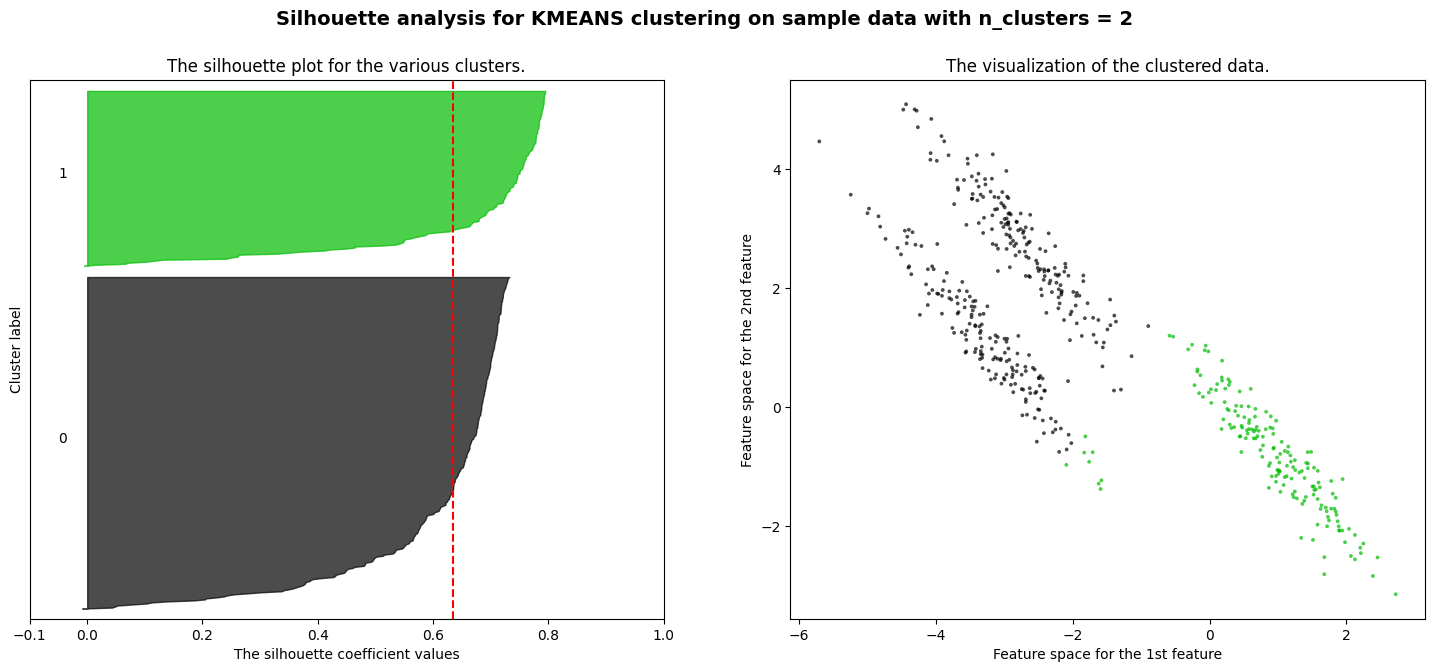

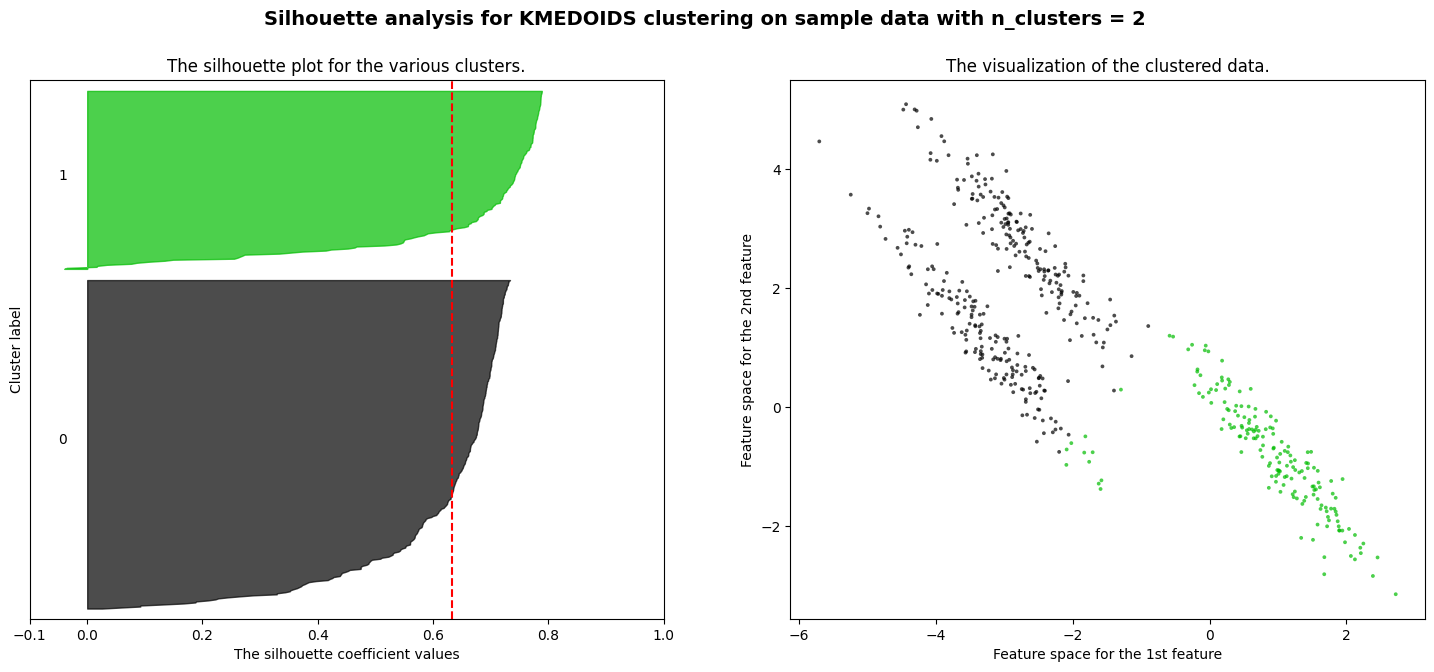

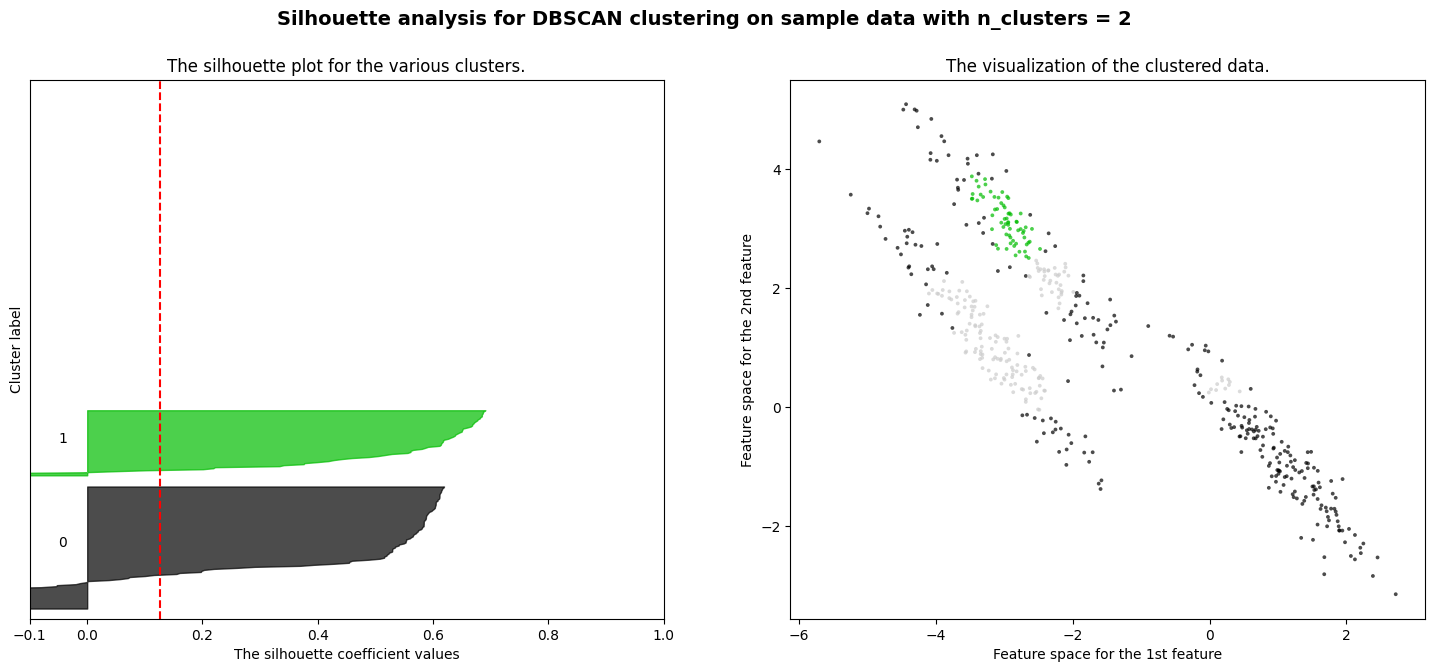

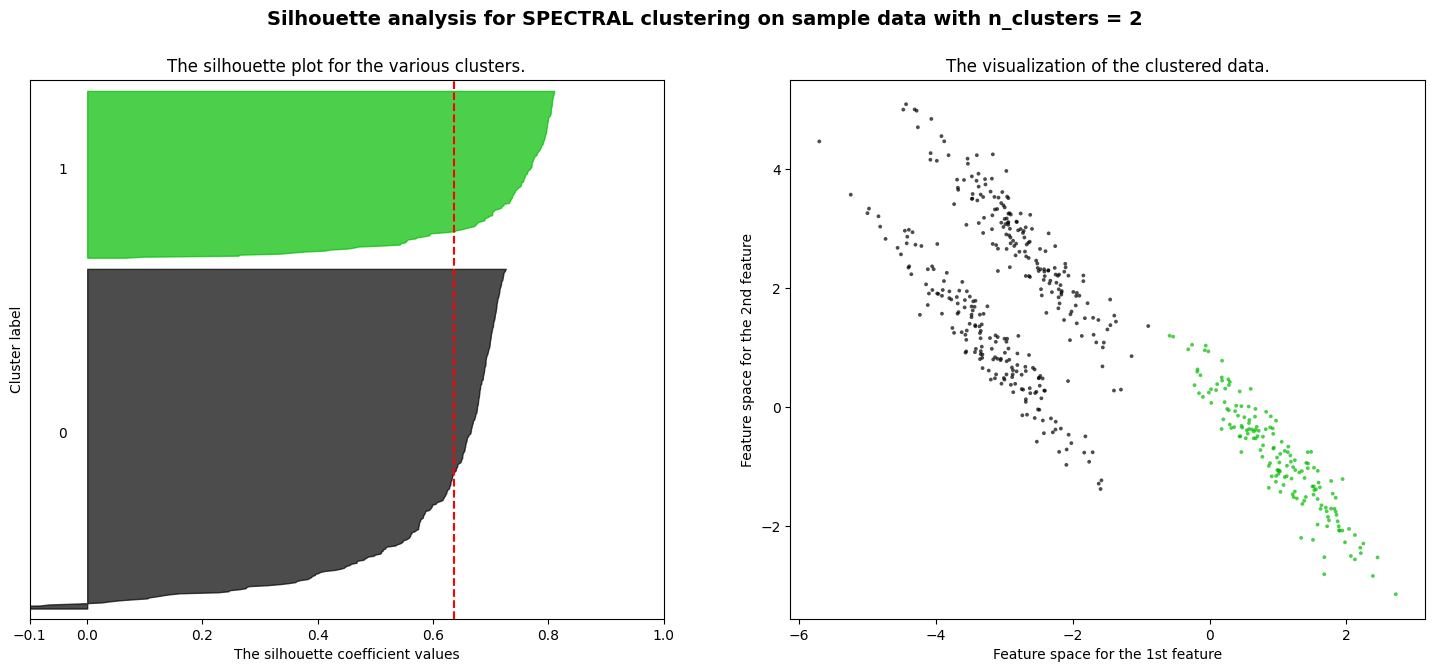

KMEANS
For n_clusters = 3 The average silhouette_score is : 0.5019981898036251
KMEDOIDS
For n_clusters = 3 The average silhouette_score is : 0.503083947451846
DBSCAN
For n_clusters = 3 The average silhouette_score is : 0.12644059458851659
SPECTRAL
For n_clusters = 3 The average silhouette_score is : 0.4687314693312756


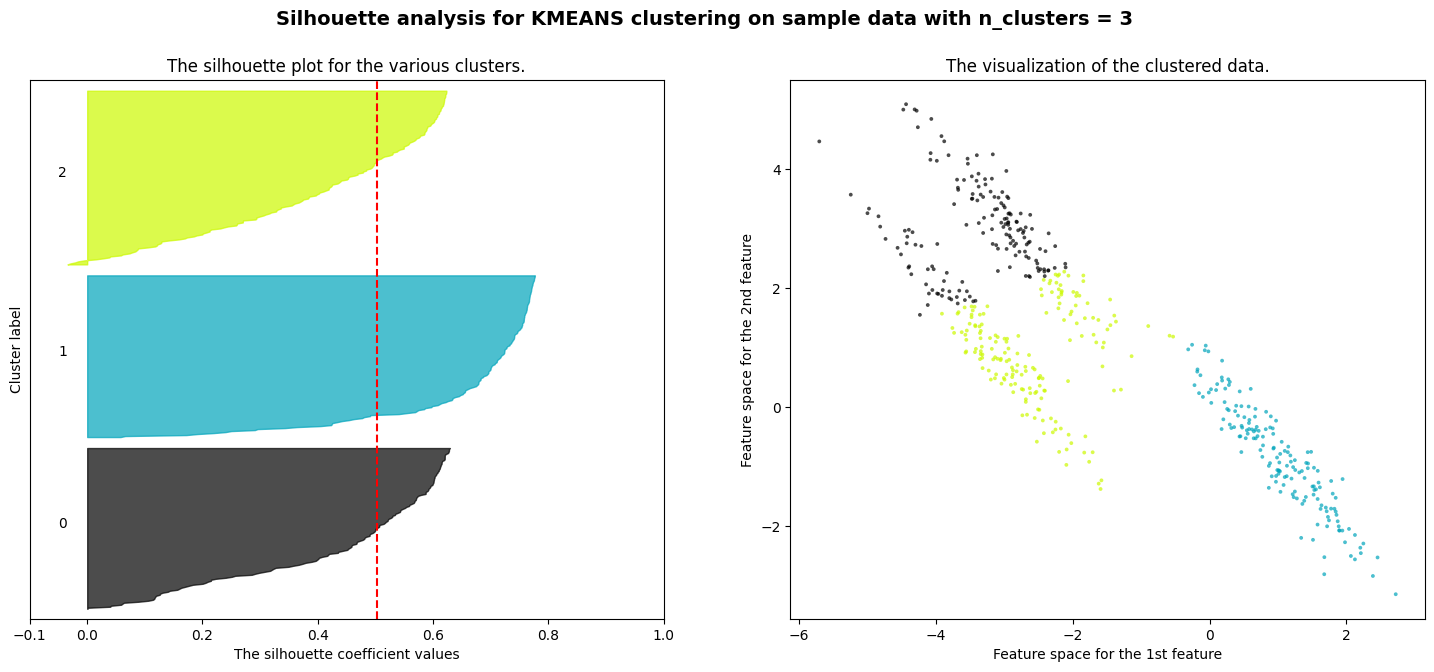

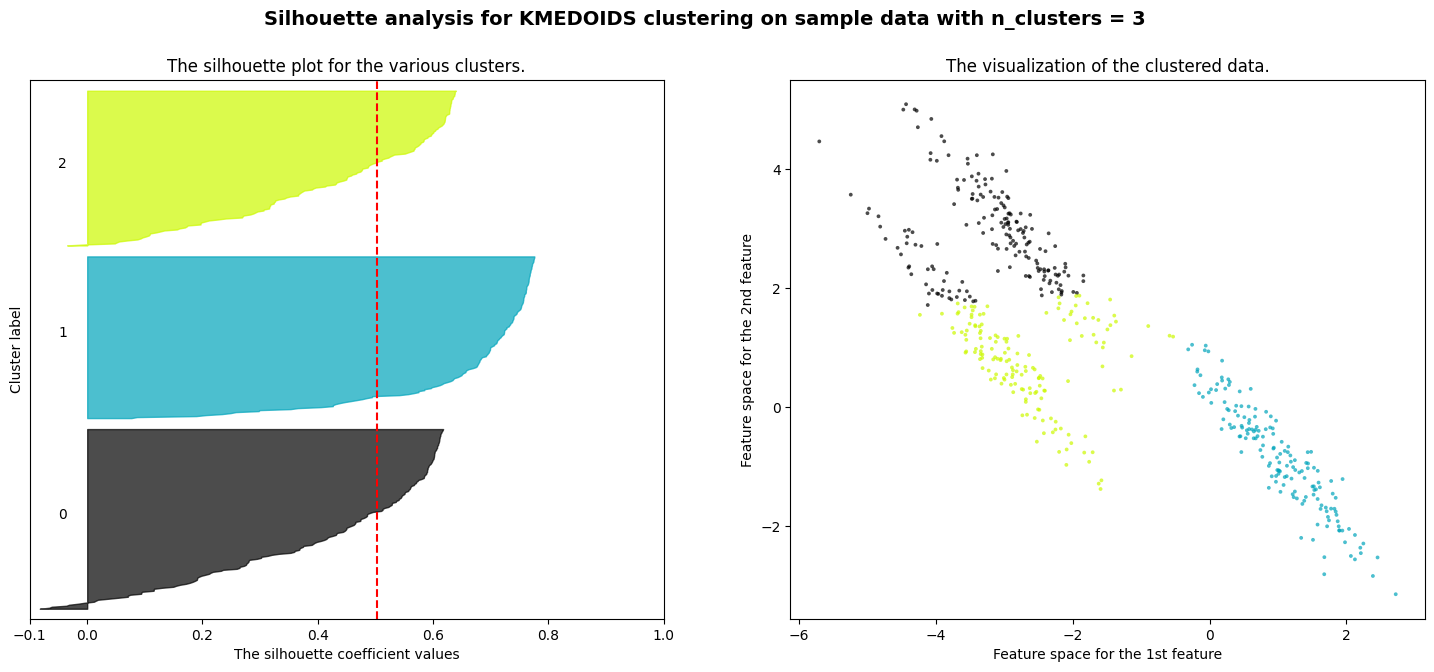

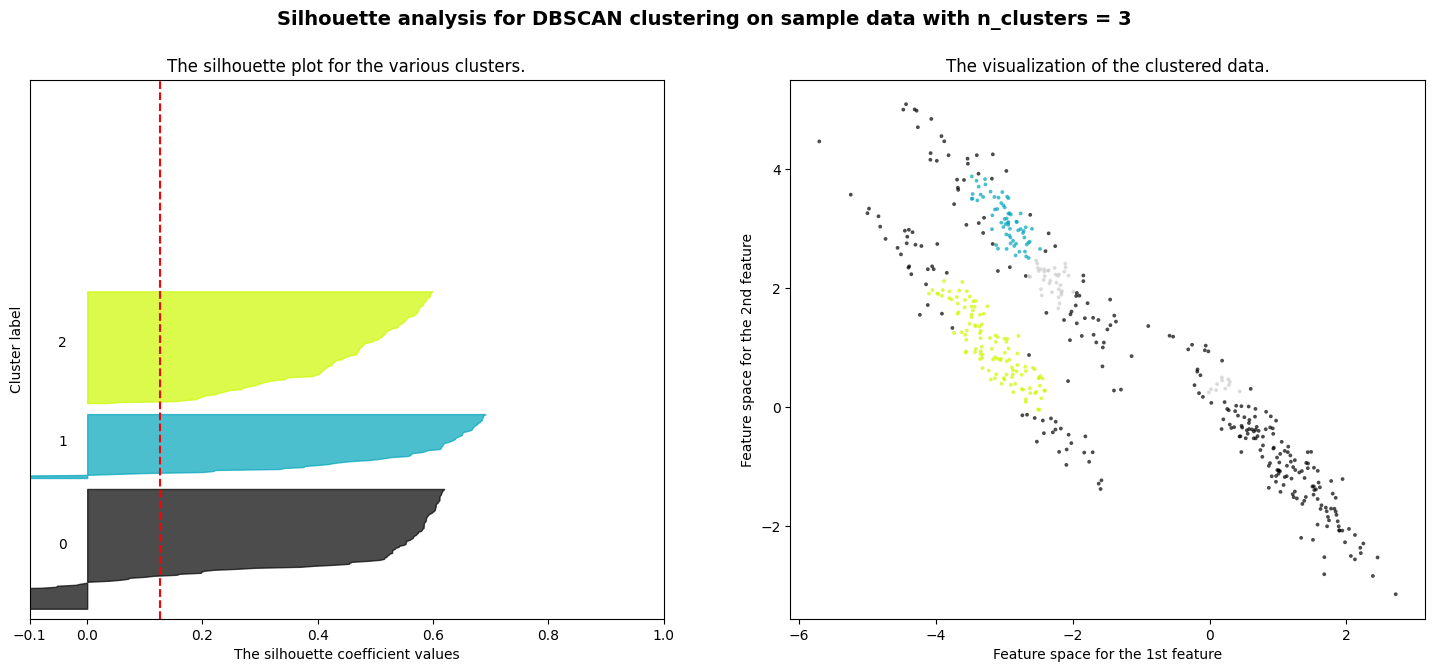

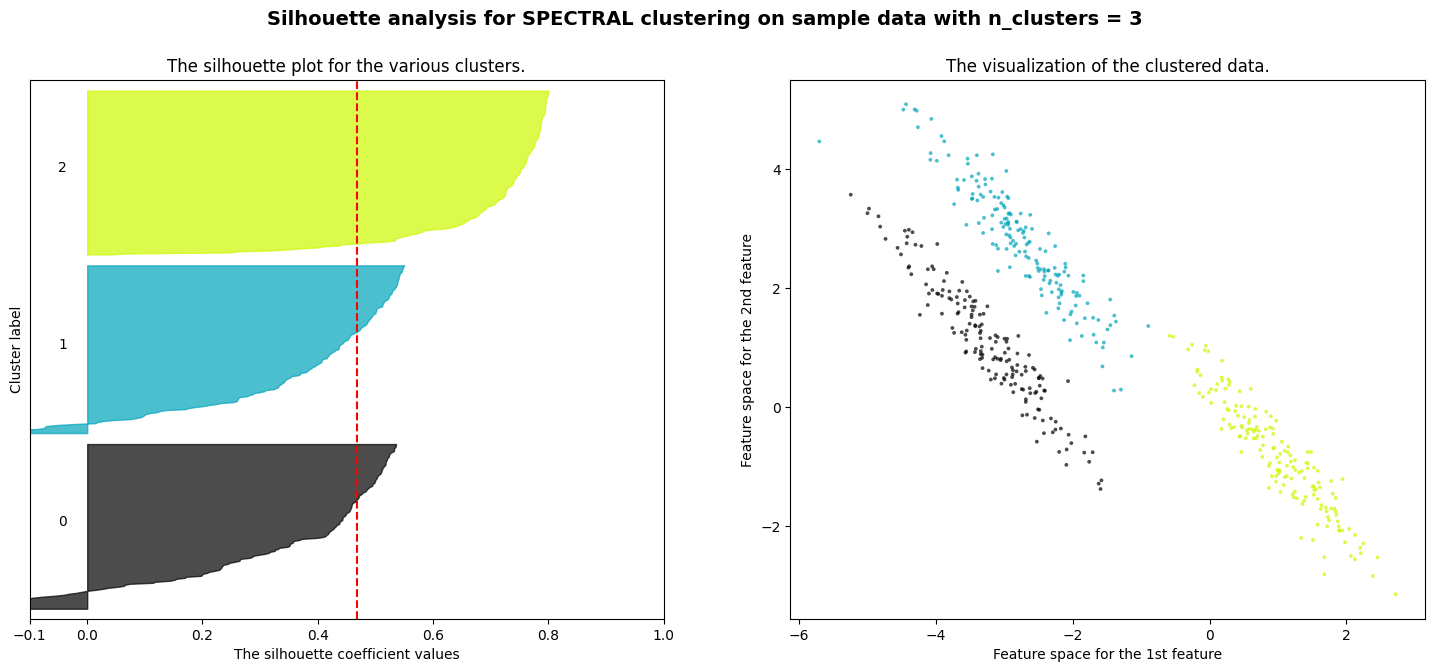

KMEANS
For n_clusters = 4 The average silhouette_score is : 0.4537479707022665
KMEDOIDS
For n_clusters = 4 The average silhouette_score is : 0.43520656365654137
DBSCAN
For n_clusters = 4 The average silhouette_score is : 0.12644059458851659
SPECTRAL
For n_clusters = 4 The average silhouette_score is : 0.35951069520912315


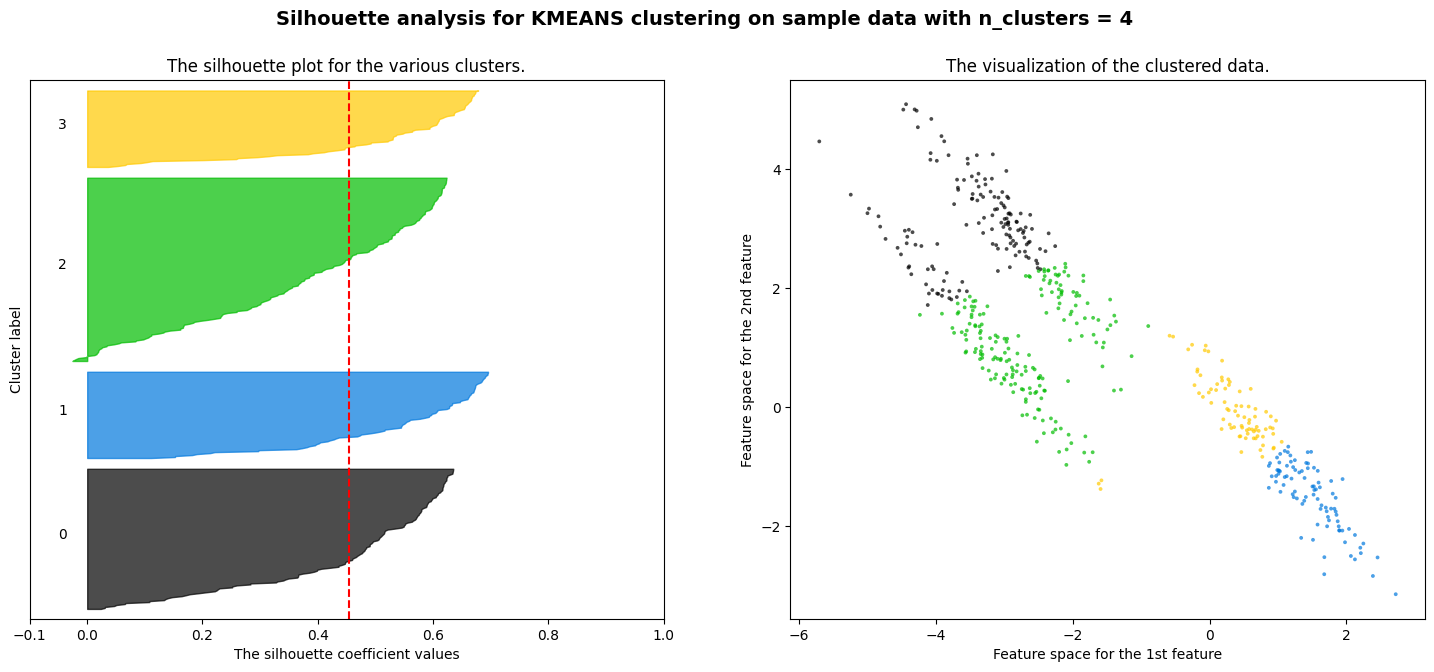

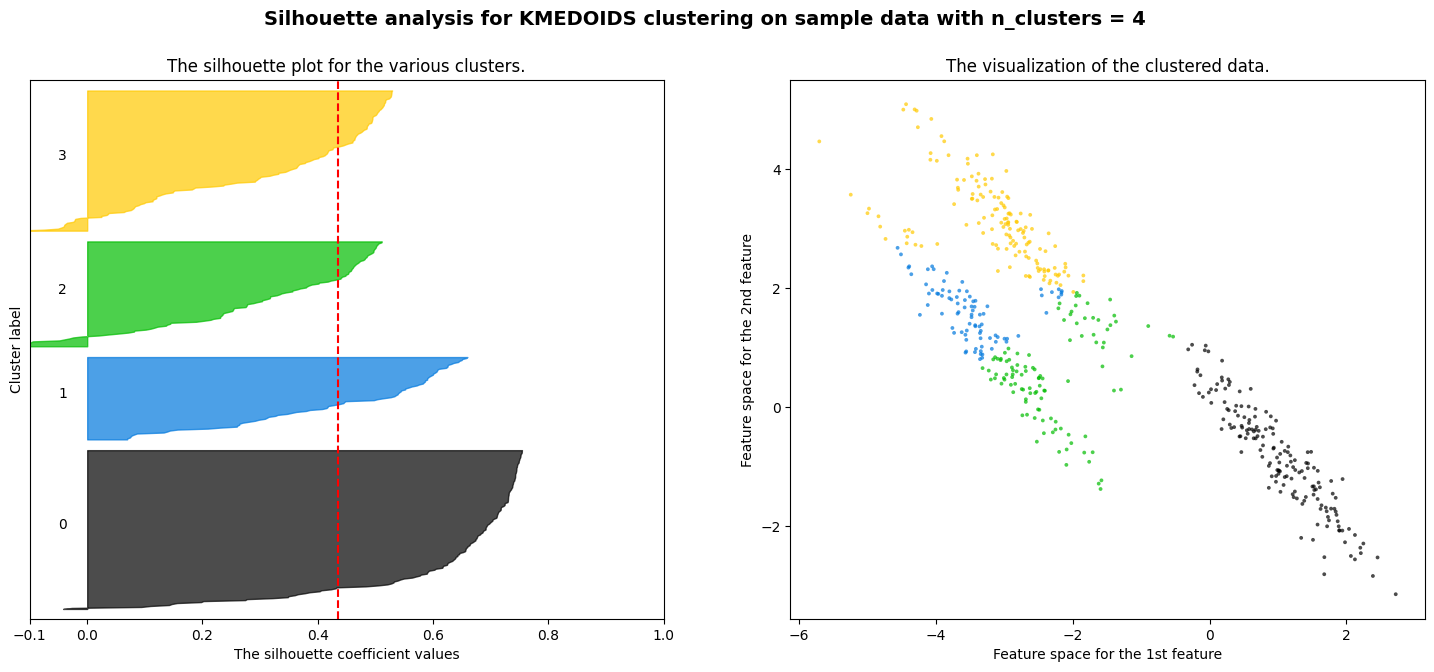

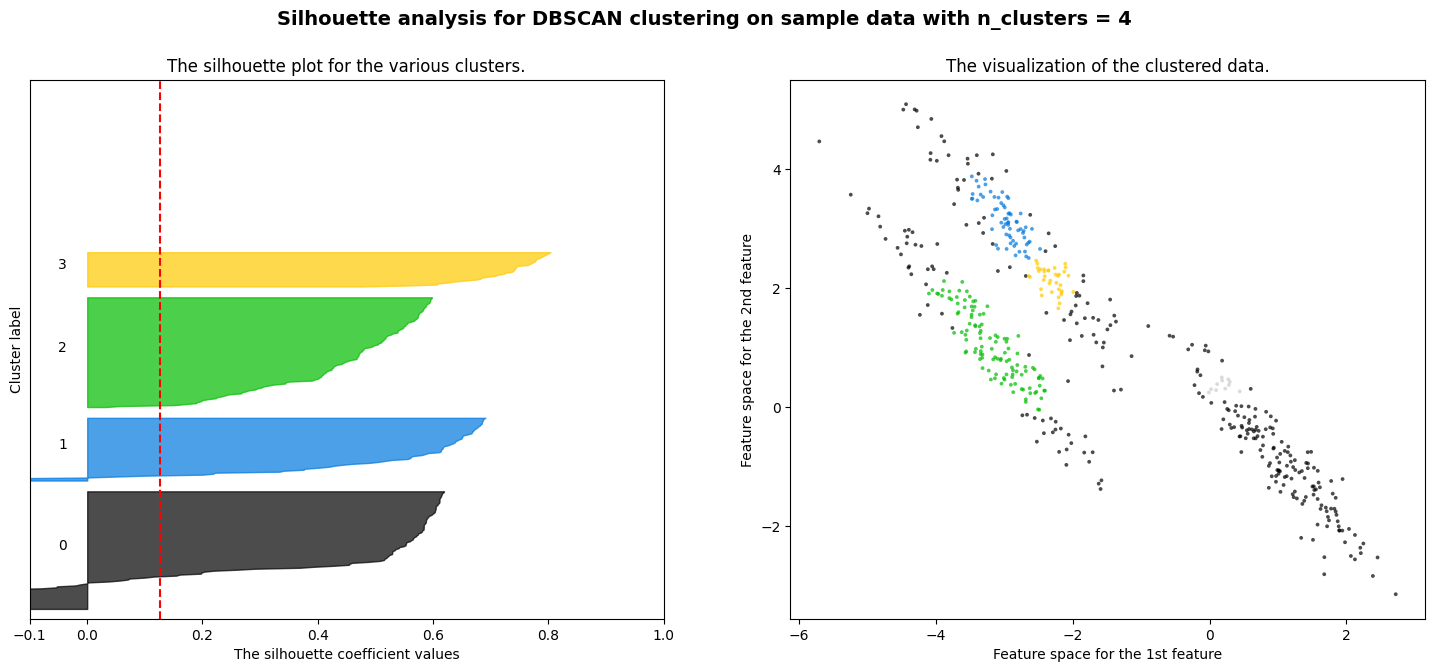

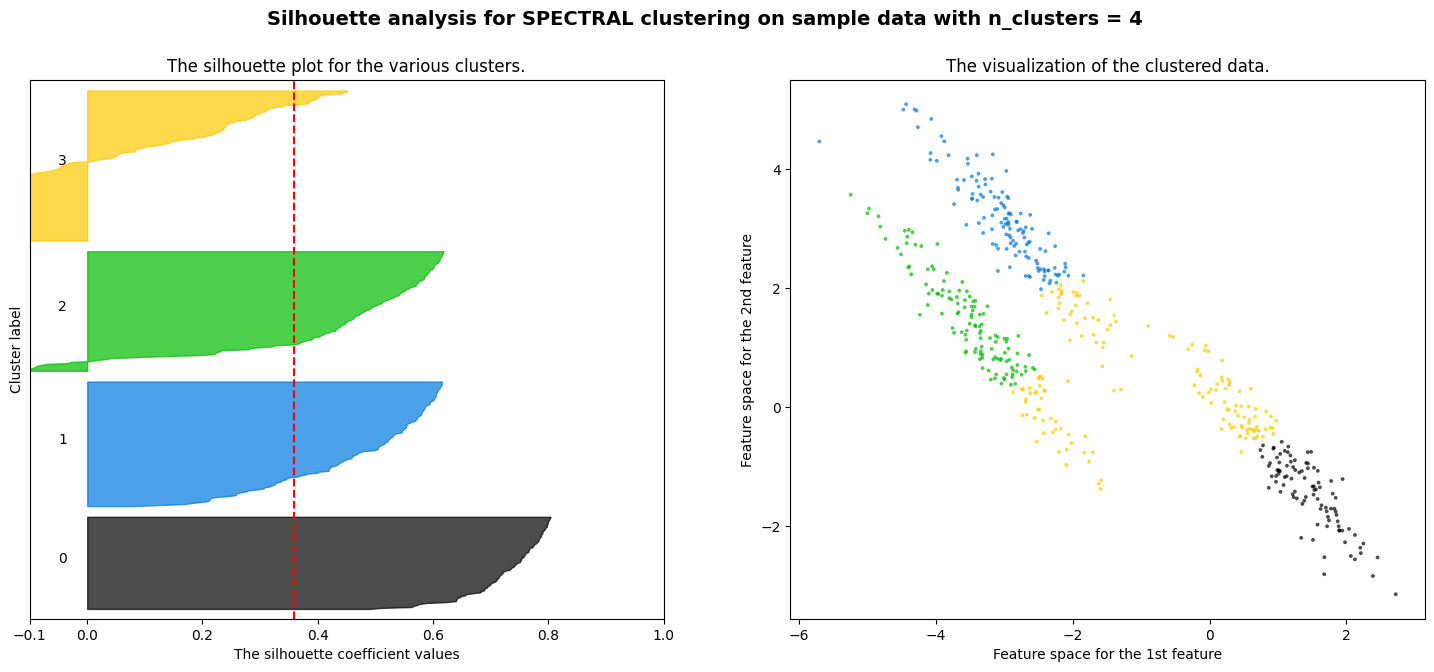

In [63]:
X = aniso[0]
y = aniso[1]
for k in range_n_clusters:
    print(f"Training {k} clusters ...")
    models = []
    # kmeans
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
    kmeans_labels = kmeans.fit_predict(X)
    models.append((kmeans,kmeans_labels,'KMEANS'))
    # kmedoids
    kmedoids = KMedoids(n_clusters=k, random_state=0)
    kmedoids_labels = kmedoids.fit_predict(X)
    models.append((kmedoids,kmedoids_labels,'KMEDOIDS'))
    # dbscan
    dbscan = DBSCAN(eps=0.2, min_samples=8, algorithm='auto', metric='euclidean')
    dbscan_labels = dbscan.fit_predict(X)
    models.append((dbscan,dbscan_labels, 'DBSCAN'))
    # spectral
    spectral = SpectralClustering(n_clusters=k,affinity='nearest_neighbors',assign_labels='kmeans',random_state=0)
    spectral_labels = spectral.fit_predict(X)
    models.append((spectral,spectral_labels, 'SPECTRAL'))
    k_models[k] = models
print("Training complete!")
plot_clusters(k_models, range_n_clusters)

Ansio:
- I obtain the best silhouette coefficient in kmedoids algorithm for 4 cluter
- Here the DBSCAN algorithm finds it difficult to estimate clusters due to the distribution of the data.
- For 2 and 4 clusters, it was where a better distribution of the clutters was noted to pass the threshold of the silhouette.

#### Blobs with varied variances

Training 2 clusters ...
Training 3 clusters ...
Training 4 clusters ...
Training complete!
KMEANS
For n_clusters = 2 The average silhouette_score is : 0.6226805979731971
KMEDOIDS
For n_clusters = 2 The average silhouette_score is : 0.6166504208971609
DBSCAN
For n_clusters = 2 The average silhouette_score is : 0.33356894387452546
SPECTRAL
For n_clusters = 2 The average silhouette_score is : 0.5792608494900457


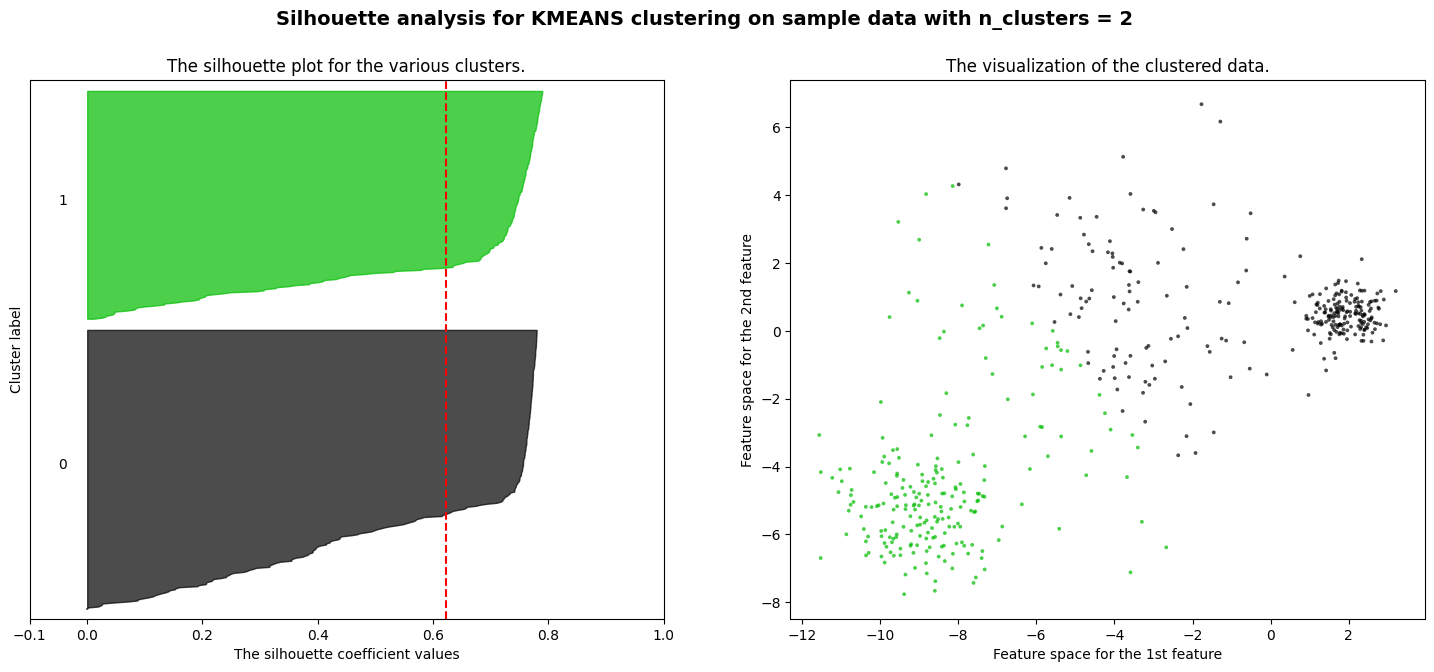

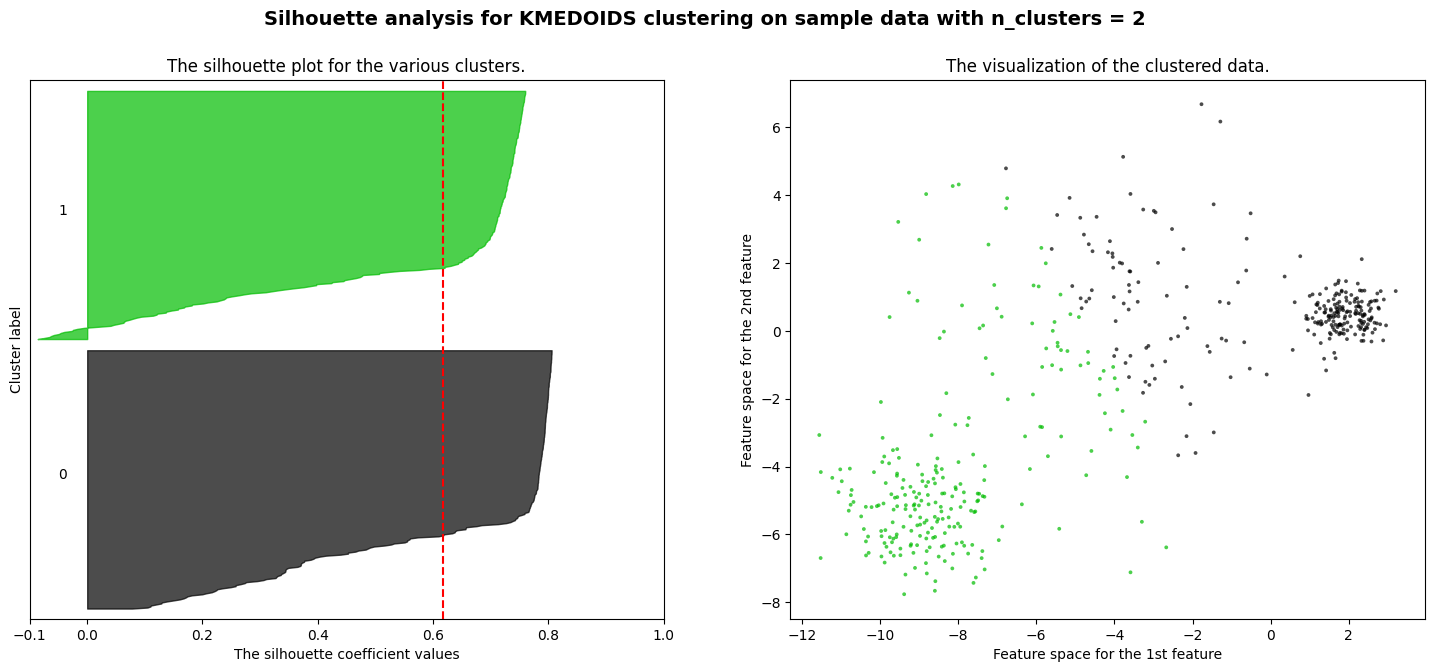

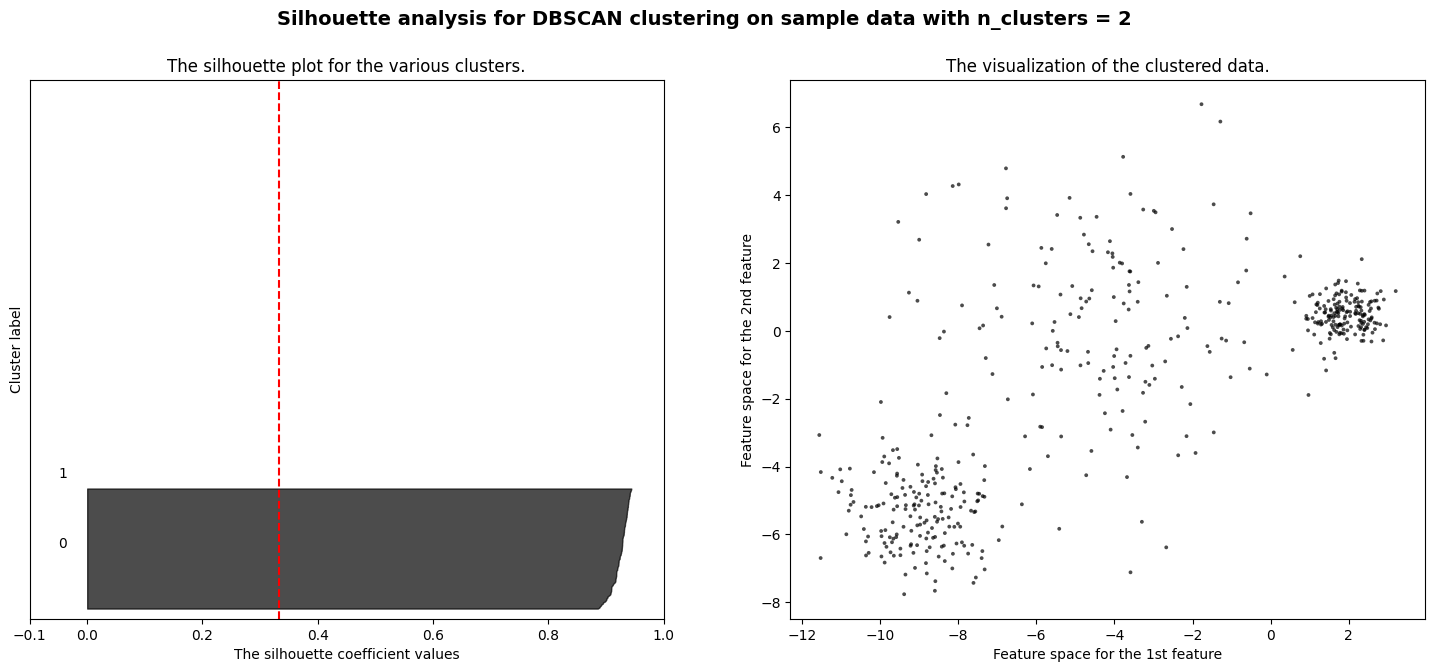

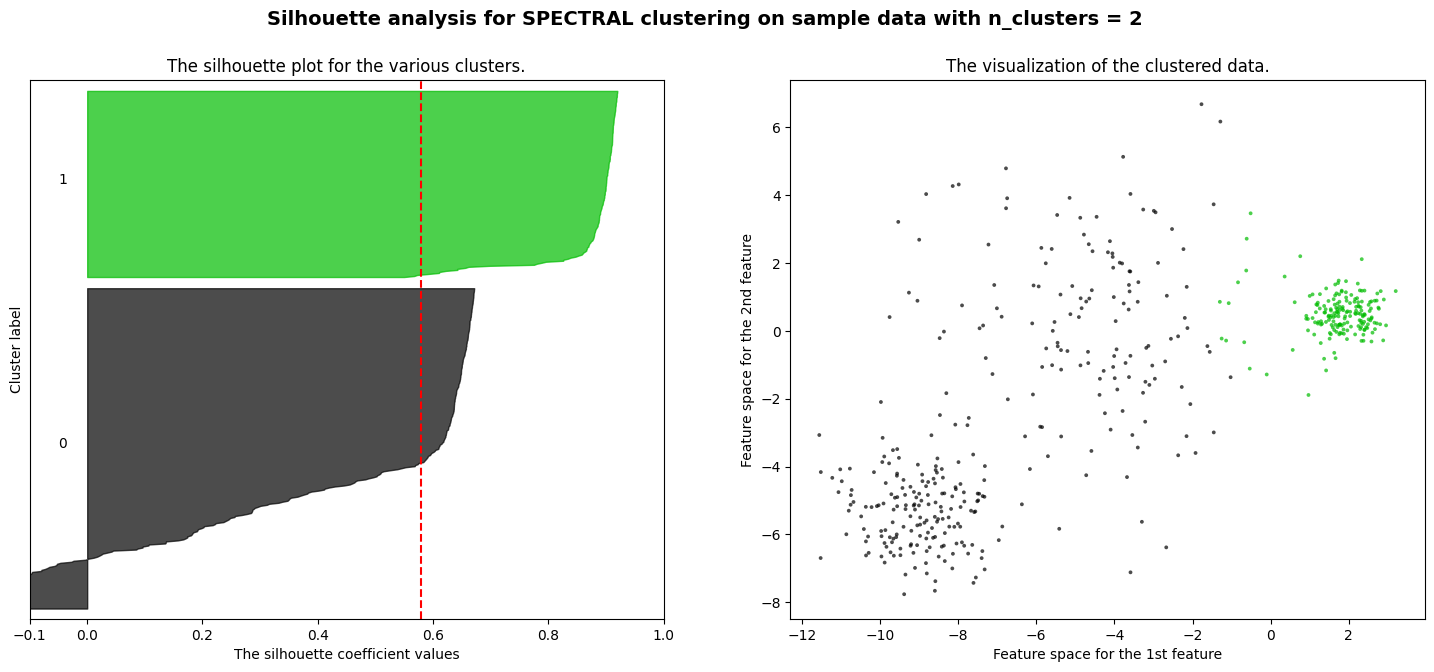

KMEANS
For n_clusters = 3 The average silhouette_score is : 0.6548557086159974
KMEDOIDS
For n_clusters = 3 The average silhouette_score is : 0.6560546653256608
DBSCAN
For n_clusters = 3 The average silhouette_score is : 0.33356894387452546
SPECTRAL
For n_clusters = 3 The average silhouette_score is : 0.6405299092466034


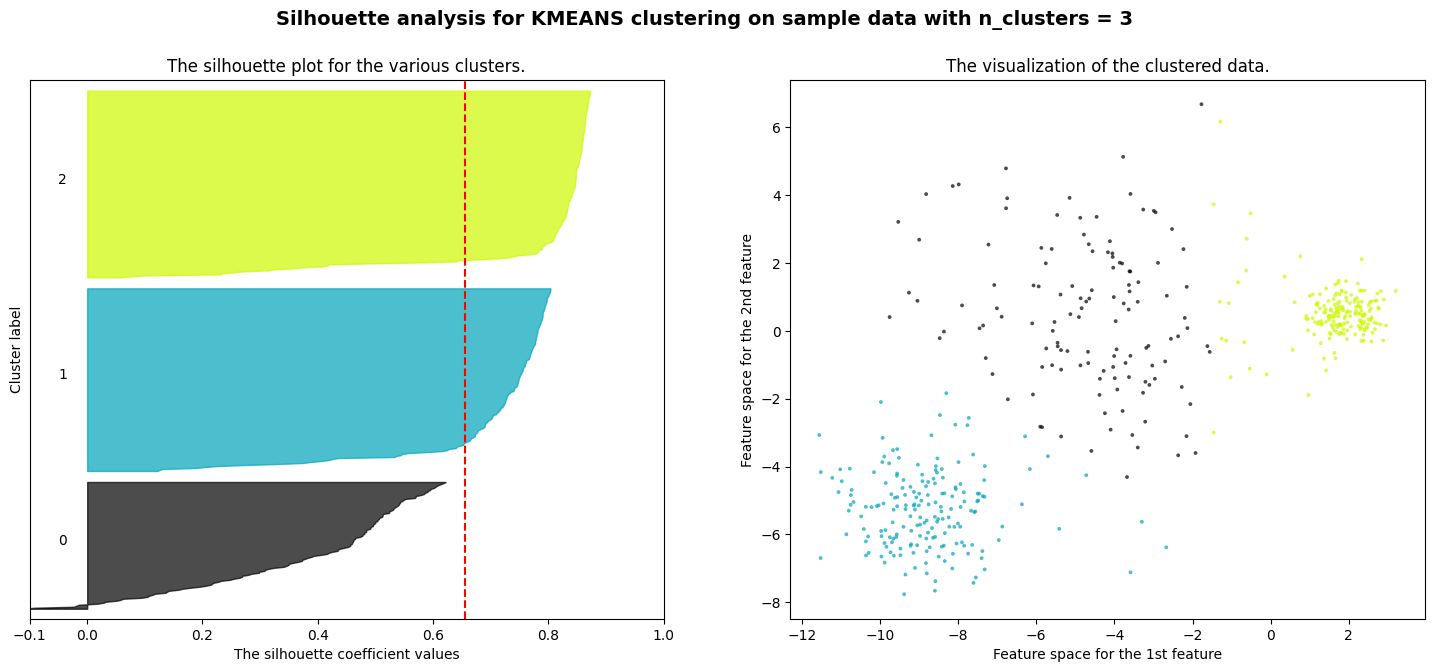

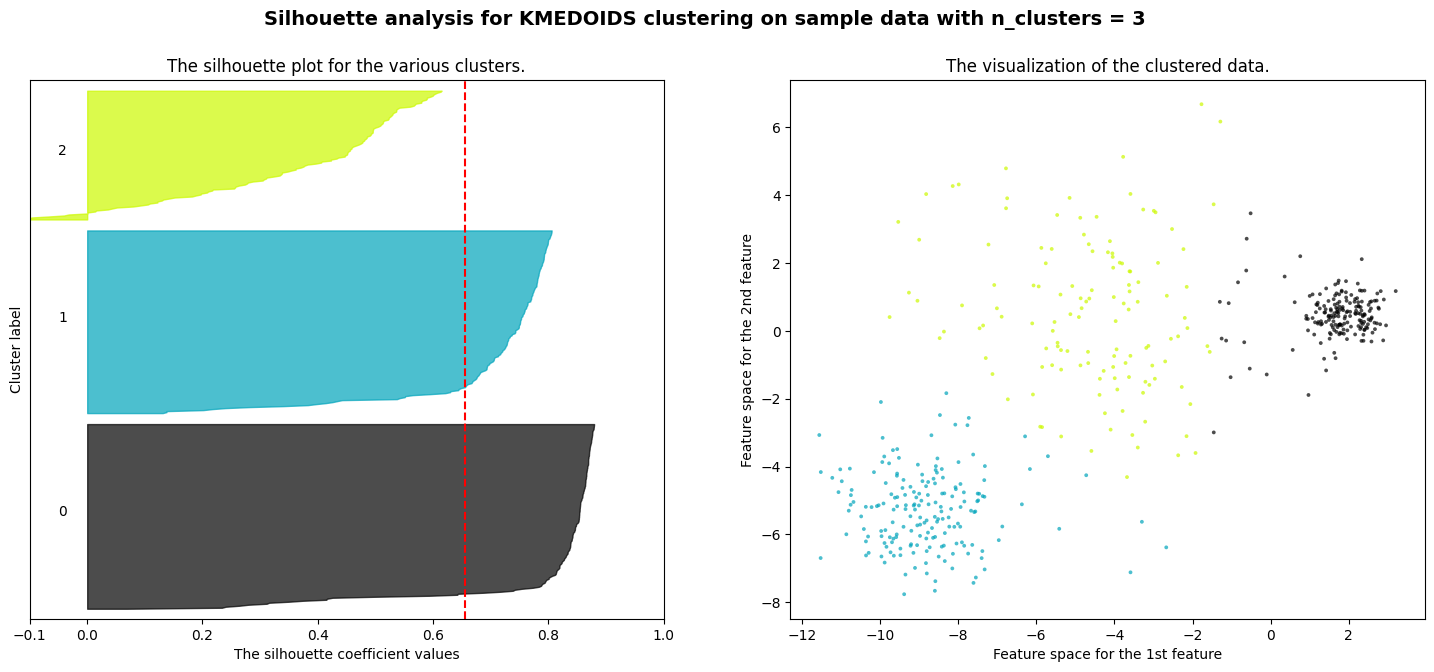

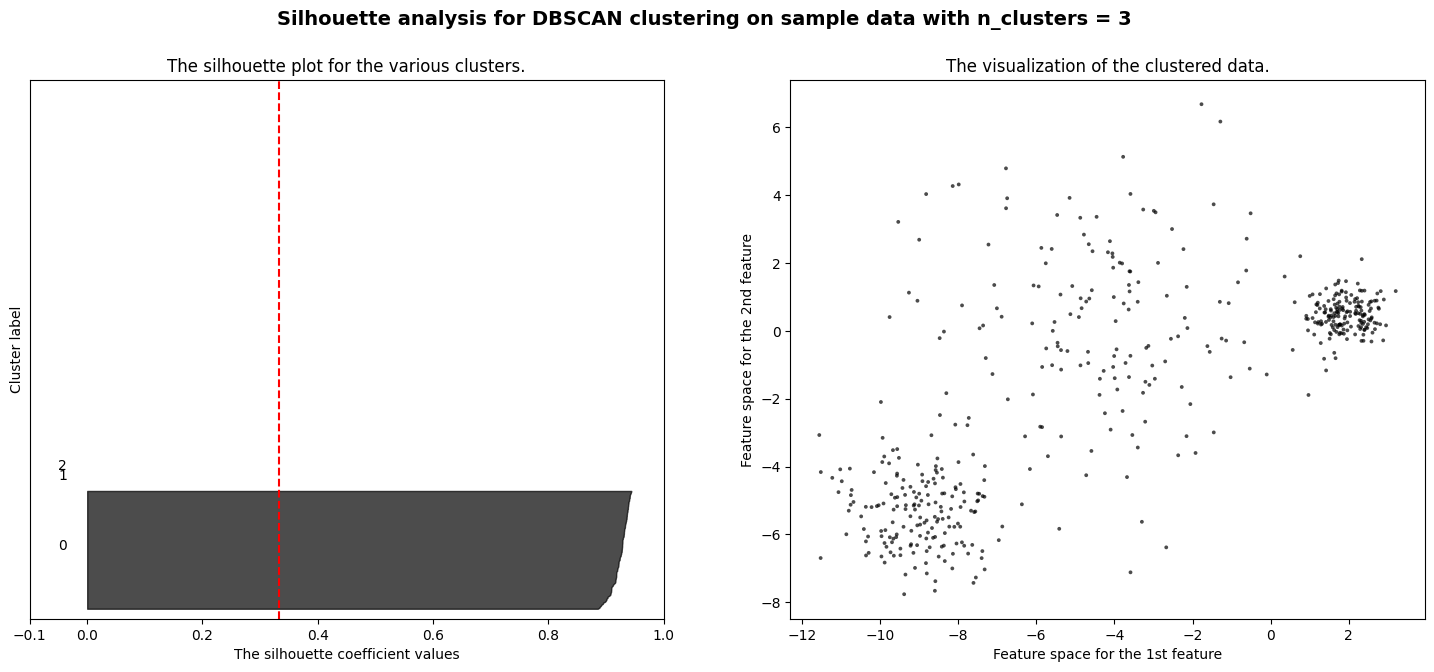

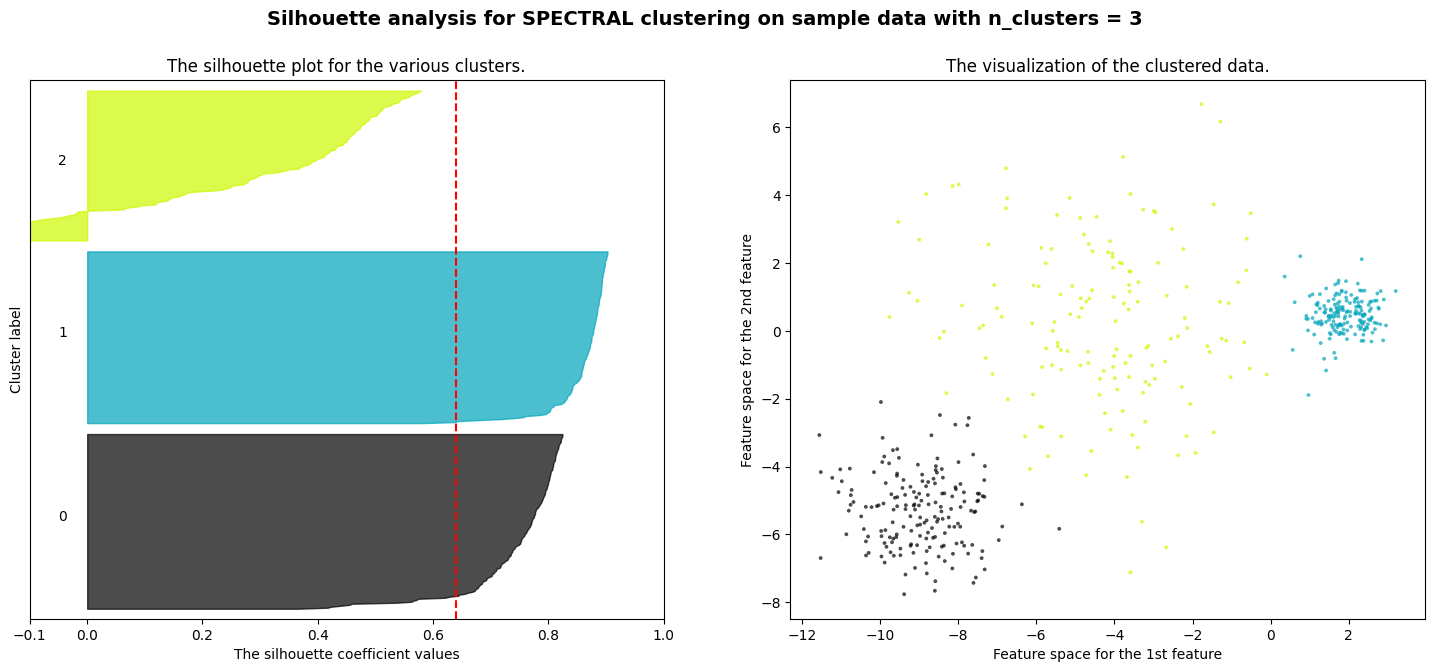

KMEANS
For n_clusters = 4 The average silhouette_score is : 0.6326618414058793
KMEDOIDS
For n_clusters = 4 The average silhouette_score is : 0.440269986019889
DBSCAN
For n_clusters = 4 The average silhouette_score is : 0.33356894387452546
SPECTRAL
For n_clusters = 4 The average silhouette_score is : 0.44924969562681055


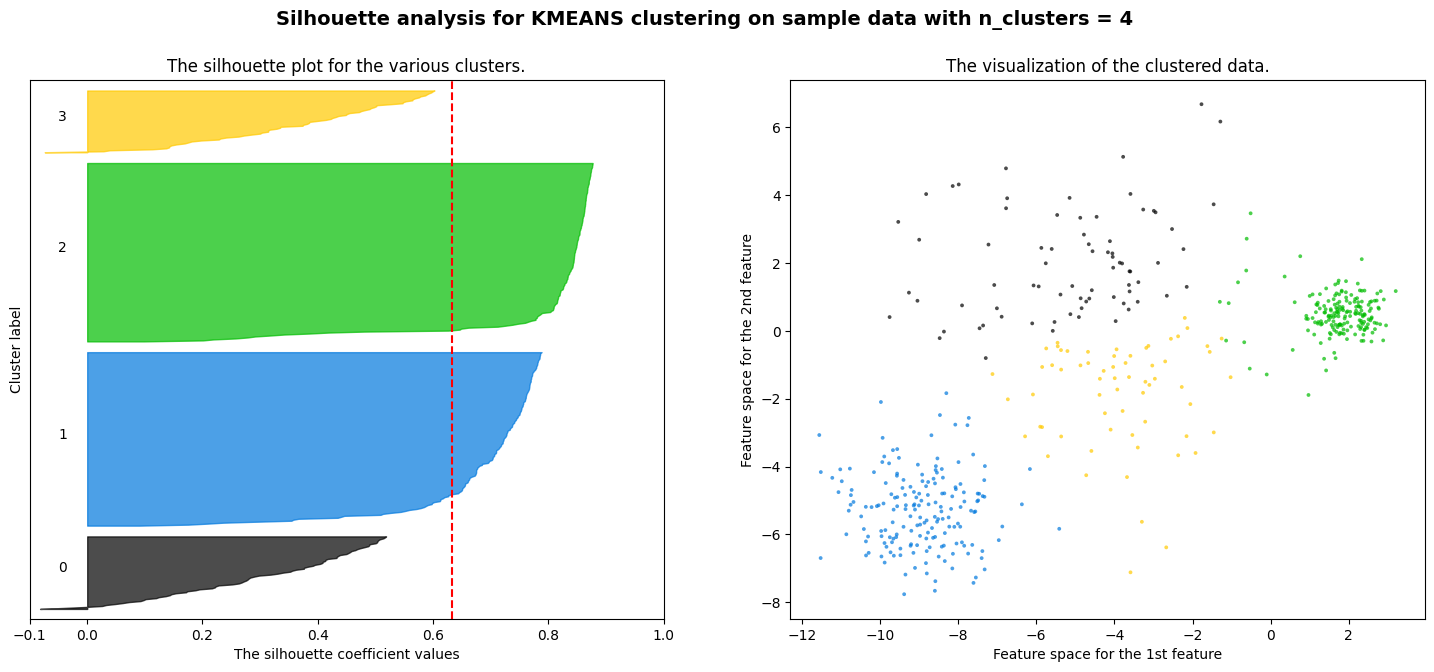

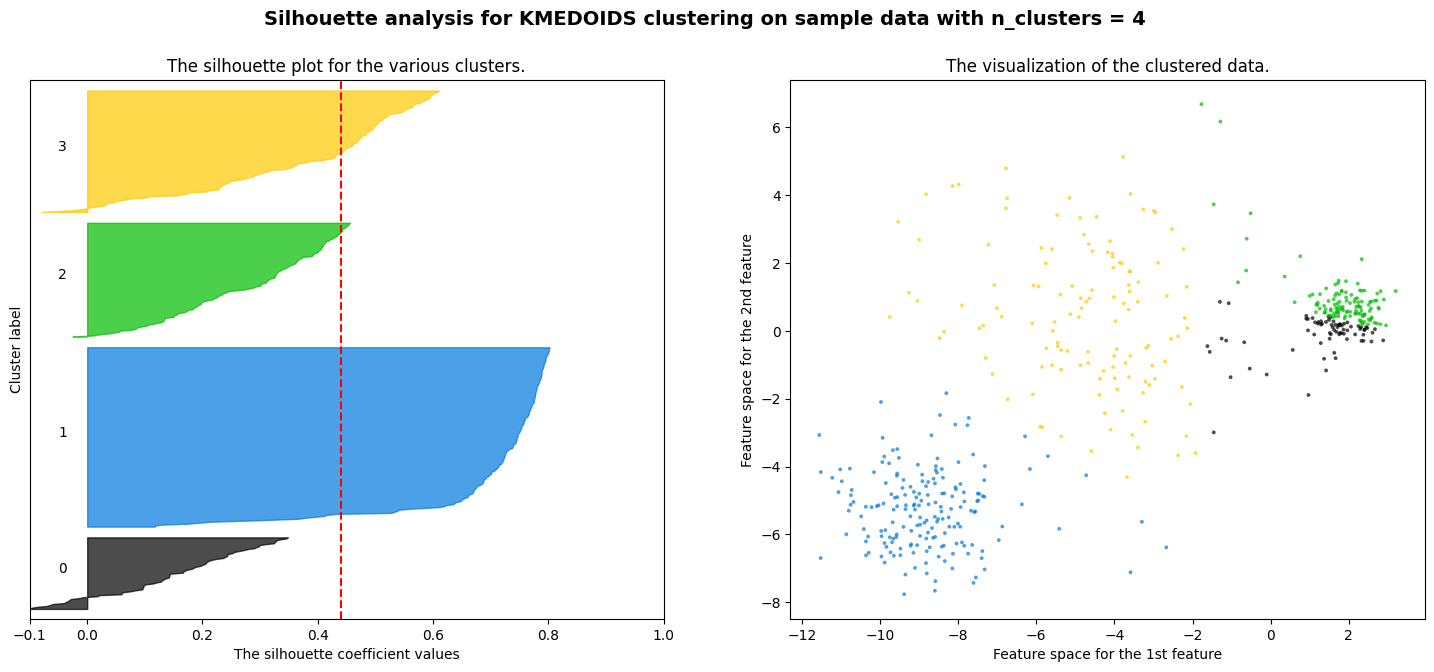

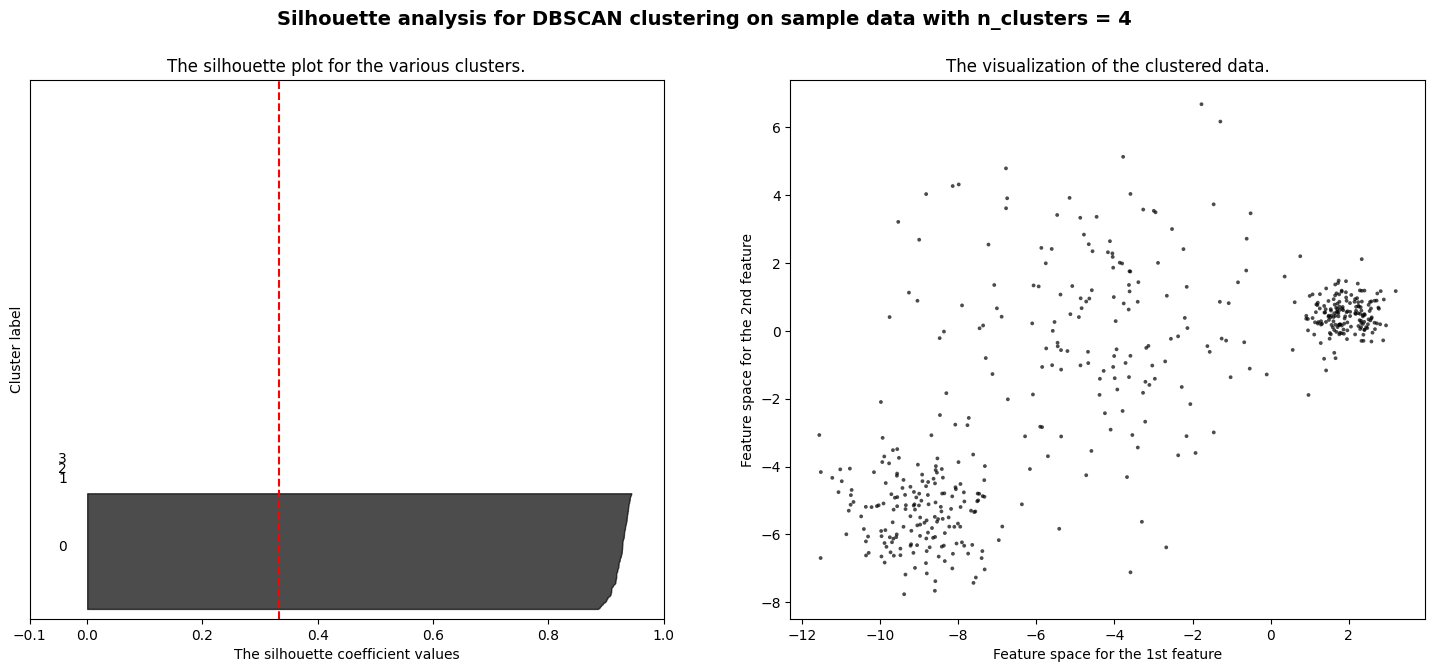

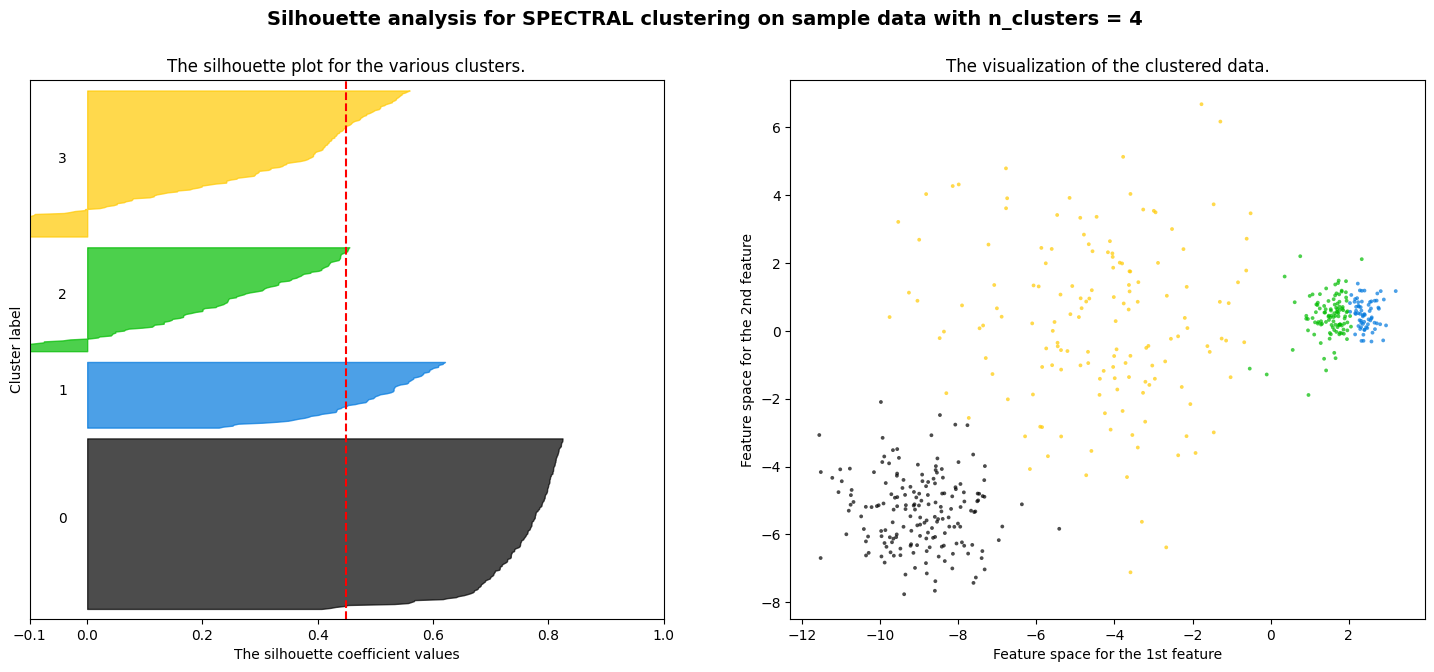

In [64]:
X = varied[0]
y = varied[1]
for k in range_n_clusters:
    print(f"Training {k} clusters ...")
    models = []
    # kmeans
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
    kmeans_labels = kmeans.fit_predict(X)
    models.append((kmeans,kmeans_labels,'KMEANS'))
    # kmedoids
    kmedoids = KMedoids(n_clusters=k, random_state=0)
    kmedoids_labels = kmedoids.fit_predict(X)
    models.append((kmedoids,kmedoids_labels,'KMEDOIDS'))
    # dbscan
    dbscan = DBSCAN(eps=0.2, min_samples=8, algorithm='auto', metric='euclidean')
    dbscan_labels = dbscan.fit_predict(X)
    models.append((dbscan,dbscan_labels, 'DBSCAN'))
    # spectral
    spectral = SpectralClustering(n_clusters=k,affinity='nearest_neighbors',assign_labels='kmeans',random_state=0)
    spectral_labels = spectral.fit_predict(X)
    models.append((spectral,spectral_labels, 'SPECTRAL'))
    k_models[k] = models
print("Training complete!")
plot_clusters(k_models, range_n_clusters)

Blob varied variance:
- I obtain the best silhouette coefficient in spectral algorithm for 3 cluter
- Here the DBSCAN algorithm finds it difficult to estimate clusters, maybe for the data distribution in the middle.
- For 2 and 3 clusters, it was where a better distribution of the clutters was noted to pass the threshold of the silhouette.